<div style="text-align: center;">
    <h1 style="font-size: 20px;">
        Final project for the <strong style="font-size: 26px;">Advanced Statistics </strong> course<br>
        <strong style="font-size: 46px; display: block; margin-top: 20px;">Earthquakes data analysis</strong>
    </h1>
</div>

<hr style="border: 1px solid #000;">

<div style="display: flex; justify-content: center; align-items: center; flex-wrap: wrap; gap: 20px;">
    <img src="unipd_template.png" alt="Unipd template" style="max-width: 300px; height: auto; margin: 0;">
    <img src="pod_template.png" alt="PoD template" style="max-width: 200px; height: auto; margin: 0;">
</div>

<hr style="border: 1px solid #000;">

<div style="display: flex; justify-content: space-between; text-align: left; ">
    <div style="flex: 1;">
        <!-- Questo spazio può essere vuoto se non serve altro qui -->
    </div>
    <div style="flex: 1; font-size: 18px;">
        <p><strong style="font-size: 26px;">University of Padua - Department of Physics and Astronomy</strong></p>
        <p><strong>Degree course:</strong> Physics of Data</p>
        <p><strong>Course:</strong> Advanced Statistics </p>
        <p><strong>Year:</strong> 2023-2024</p>
        <p><strong>Professor in charge:</strong> Alberto Garfagnini</p>
        <table style="margin: 20px auto; border-collapse: collapse; width: 100%; font-size: 15px; text-align: left;">
            <thead>
                <tr>
                    <th colspan="3" style="border: none; padding: 8px; text-align: center; font-weight: bold; font-size: 20px">Students</th>
                </tr>
                <tr>
                    <th style="border: none; padding: 8px;">Name</th>
                    <th style="border: none; padding: 8px;">ID</th>
                    <th style="border: none; padding: 8px;">Email</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td style="border: none; padding: 8px;">Ginevra Beltrame</td>
                    <td style="border: none; padding: 8px;">2130668</td>
                    <td style="border: none; padding: 8px;">ginevra.beltrame@studenti.unipd.it</td>
                </tr>
                <tr>
                    <td style="border: none; padding: 8px;">Ada D'Iorio</td>
                    <td style="border: none; padding: 8px;">2092320</td>
                    <td style="border: none; padding: 8px;">ada.diorio@studenti.unipd.it</td>
                </tr>
                <tr>
                    <td style="border: none; padding: 8px;">Dario Liotta</td>
                    <td style="border: none; padding: 8px;">2124229</td>
                    <td style="border: none; padding: 8px;">dario.liotta.1@studenti.unipd.it</td>
                </tr>
            </tbody>
        </table>
    </div>
</div>



<div style="text-align: left;">
    <strong style="font-size: 26px; display: block; margin-top: 20px;">Assignment</strong>
</div>

Italy lies at the boundary of the African and Eurasian tectonic plates, and both plates move and smash into each other releasing a lot of energy and making Italy a seismically active zone, especially central Italy (mountain range). The last main earthquake was the MW 6.3 quake that struck L’Aquila (Abruzzo) in the early morning of April 6, 2009: 297 people were killed, over 1000 injured, 66000 made homeless, and many thousands of buildings were destroyed or damaged [1].

In order to better study the relationship between the occurrence of earthquakes and the geological structure, present the temporal and spatial characteristics of earthquakes, explore the temporal and spatial rules of earthquake disasters and determine the seismically active regions in Italy. Investigate and analyze the earthquakes data coming from the USGS Earthquake Hazards Program [2] with the magnitude greater than MW 5.0 that occurred in Italy and surrounding countries during the last hundred years: from 1921 to 2021. ***Using the R language, study the temporal and spatial characteristics of earthquake data. Apply a time series analysis method (see for instance [3]) to analyze the trend of earthquake magnitude change. At the spatial level, perform a hierarchical cluster analysis to get the range of earthquake active areas.***

#### Bibliography

[1] R. Walters, at al. The 2009 l’Aquila earthquake (central italy): A source mechanism and implications for seismic hazard, Geophysical Research Letters, 36 (2009) 17.

[2] USGS Earthquake Hazards Web Site: <https://earthquake.usgs.gov/>

[3] CRAN Task View: Time Series Analysis: <https://cran.r-project.org/web/views/TimeSeries.html>

<hr style="border: 1px solid #000;">

### Data acquisition and packages installation

From the USGS Earthquake Hazards website, we extract the data relative to earthquake events with magnitude greater than MW 5.0 in the temporal window spanning from 1921-01-01 00:00:00 to 2022-01-01 00:00:00 and in the rectangular region with latitude in the range [36, 48] and longitude [5,20]. They are exported to a .csv file for the following analyses.

In [55]:
.libPaths(c("/tmp/Rtmp0A0Q96/downloaded_packages", .libPaths()))

## Plot libraries
library(gridExtra)
library(ggplot2)
library(plotly)
library(heatmaply)
library(maps)
library(rnaturalearthdata)
library(gganimate)
library(rnaturalearth)
library(plot3D)
library(ggmap)
library(leaflet)
library(webshot2)
library(raster)
library(reshape2)
library(patchwork)
library(bnlearn)
library(png)
library(grid)
library(Rgraphviz)
library(IRdisplay)
library(viridis)
library(poweRlaw)

## Time series analysis libraries
library(forecast)
library(ggfortify)
library(vars)
library(tidyr)

## Hierarchical clusering libraries
library(magick) 
library(dendextend) 
library(ggdendro)
library(cluster)
library(clValid)
library(jpeg)

library(dplyr)
library(lubridate)
library(leaflet.extras)
library(rstan)
library(bayesplot)

library(rstan)
library(bayesplot)

In [2]:
df <- read.csv('query.csv', header = TRUE, sep = ",")
head(df)

time                     latitude longitude depth mag magType nst gap dmin 
1 2021-03-27T13:47:55.267Z 42.4479  16.0496    7    5.5 mww     NA  30  1.651
2 2021-03-18T00:17:05.186Z 36.9107   5.3143   10    5.0 mww     NA  38  3.092
3 2021-03-18T00:04:06.698Z 36.9206   5.2014    8    6.0 mww     NA  20  3.060
4 2020-12-29T11:19:54.762Z 45.4244  16.2573   10    6.4 mww     NA  13  0.941
5 2020-11-22T03:53:08.474Z 36.6442   6.8625   10    5.1 mww     NA  37  2.205
6 2020-08-07T06:15:37.835Z 36.5497   6.2708   10    5.0 mww     NA  44  2.619
  rms  ⋯ updated                  place                              type      
1 0.88 ⋯ 2021-12-11T13:15:43.423Z 55 km N of Peschici, Italy         earthquake
2 0.55 ⋯ 2021-05-26T22:08:44.040Z 26 km NE of Bejaïa, Algeria        earthquake
3 0.45 ⋯ 2021-09-25T11:46:15.930Z 21 km NNE of Bejaïa, Algeria       earthquake
4 0.75 ⋯ 2023-11-21T19:23:39.177Z 2 km WSW of Petrinja, Croatia      earthquake
5 1.25 ⋯ 2022-03-10T05:48:26.167Z 24 km WSW of Azzaba, Algeria       earthquake
6 0.76 ⋯ 2022-03-10T05:31:32.704Z 3 km NNE of Sidi Mérouane, Algeria earthquake
  horizontalError depthError magError magNst status   locationSource magSource
1 4.6             1.8        0.043    53     reviewed us             us       
2 6.4             1.8        0.073    18     reviewed us             us       
3 6.9             1.8        0.033    86     reviewed us             us       
4 4.4             1.8        0.033    89     reviewed us             us       
5 6.5             1.8        0.048    41     reviewed us             us       
6 6.8             1.9        0.058    29     reviewed us             us

We add some useful data columns to the dataset.

In [3]:
## Column of time with POSIX format
df$time_posix <- as.POSIXct(df$time, format = "%Y-%m-%dT%H:%M:%OS")

## Column of the year
df$year <- as.numeric(format(df$time_posix, '%Y'))

## Column of the month
df$month <- as.numeric(format(df$time_posix, '%m'))

## Column of the number of days from 01/01/1921
df$days_index <- as.numeric(as.Date(df$time) - as.Date("1921-01-01"), units = "days")

convert_coordinates <- function(df) {
  # Earth's radius in meters
  R <- 6371
  
  # Calculate (x, y, z) coordinates assuming the Earth is a perfect sphere
  r <- -df$depth + R
  x <- r * cos(df$latitude * pi / 180) * cos(df$longitude * pi / 180)
  y <- r * cos(df$latitude * pi / 180) * sin(df$longitude * pi / 180)
  z <- r * sin(df$latitude * pi / 180)
  
  # Return a dataframe with x and y coordinates
  df$x <- x
  df$y <- y 
  df$z <- z

  return(df)
}

df <- convert_coordinates(df)

We check for any possible NA value in order to clean our dataset.

In [4]:
columns_to_check <- c("latitude", "longitude", "depth", "mag")
rows_with_na <- df[is.na(df[, columns_to_check]), ]
print(paste('There are', nrow(rows_with_na), 'rows with NA values on the latitude, longitude, depth or mag columns.'))

[1] "There are 0 rows with NA values on the latitude, longitude, depth or mag columns."


Here's the complete dataset.

In [5]:
head(df)

time                     latitude longitude depth mag magType nst gap dmin 
1 2021-03-27T13:47:55.267Z 42.4479  16.0496    7    5.5 mww     NA  30  1.651
2 2021-03-18T00:17:05.186Z 36.9107   5.3143   10    5.0 mww     NA  38  3.092
3 2021-03-18T00:04:06.698Z 36.9206   5.2014    8    6.0 mww     NA  20  3.060
4 2020-12-29T11:19:54.762Z 45.4244  16.2573   10    6.4 mww     NA  13  0.941
5 2020-11-22T03:53:08.474Z 36.6442   6.8625   10    5.1 mww     NA  37  2.205
6 2020-08-07T06:15:37.835Z 36.5497   6.2708   10    5.0 mww     NA  44  2.619
  rms  ⋯ status   locationSource magSource time_posix          year month
1 0.88 ⋯ reviewed us             us        2021-03-27 13:47:55 2021  3   
2 0.55 ⋯ reviewed us             us        2021-03-18 00:17:05 2021  3   
3 0.45 ⋯ reviewed us             us        2021-03-18 00:04:06 2021  3   
4 0.75 ⋯ reviewed us             us        2020-12-29 11:19:54 2020 12   
5 1.25 ⋯ reviewed us             us        2020-11-22 03:53:08 2020 11   
6 0.76 ⋯ reviewed us             us        2020-08-07 06:15:37 2020  8   
  days_index x        y         z       
1 36610      4512.906 1298.2839 4295.188
2 36601      5064.219  471.0682 3820.223
3 36601      5066.072  461.1735 3822.303
4 36522      4285.951 1249.8333 4531.099
5 36485      5067.230  609.8374 3796.525
6 36378      5079.475  558.1592 3788.102

### Graphical visualization - Spatial and temporal visualization

In this section we aim to visualize the spatial distribution of the earthquakes in order to observe any relevant patterns in our data. 

#### 2D maps

In [70]:
plot_height <- 6
plot_width <- 20
options(repr.plot.width = plot_width, repr.plot.height = plot_height)

plot_depth <- ggplot(df, aes(x = longitude, y = latitude, color = depth)) +
  geom_point() +
  scale_color_viridis_c(option = "inferno") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "depth (km)")

# Load the PNG image
bg_image <- readPNG("background.png")

# Get dimensions of the PNG image
img_width <- dim(bg_image)[2]  # Width in pixels
img_height <- dim(bg_image)[1]  # Height in pixels

# Calculate plot limits
x_range <- c(5, 20)
y_range <- c(36, 48)

# Adjust opacity (set alpha channel)
alpha_value <- 0.6  # Adjust as needed (0 = fully transparent, 1 = fully opaque)
bg_image_alpha <- bg_image
bg_image_alpha[,,4] <- bg_image[,,4] * alpha_value  # Modify alpha channel

# Add the PNG background with adjusted opacity (alpha)
plot_depth2 <- plot_depth +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point() +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plot_mag <- ggplot(df, aes(x = longitude, y = latitude, color = mag)) +
  geom_point() +
  scale_color_viridis_c(option = "plasma") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "mag")

plot_mag2 <- plot_mag +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point() +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plot_time <- ggplot(df, aes(x = longitude, y = latitude, color = days_index/365.25 + 1921)) +
  geom_point() +
  scale_color_viridis_c(option = "viridis") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "year")

plot_time2 <- plot_time +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point() +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plots_2D <- plot_depth2 + plot_mag2 + plot_time2
#ggsave("Figures/plots_2D.png", plot = plots_2D, width=plot_width, height=plot_height, units='in')

#plots_2D

<img src="plots_2D.png" style="width: 100%; height: 100%;">
<!-- ![Hierarchical clustering result](Figures/clustering_evolution.gif) -->

The plots helps us to better visualize the distribution of earthquakes as a function of the depth, magnitude and year parameters.

We can actually observe:
* **Depth** (left plot): The earthquake depths range from surface-level events (black) to deep ones reaching up to 500 km (yellow). The distribution shows that most of the seismic activity is concentrated at shallow depths, particularly around Italy's tectonic boundaries, while deeper quakes tend to be less frequent but still present in the central Mediterranean region. This could suggest subduction zones or other tectonic complexities affecting deeper layers.

* **Magnitude** (middle plot): The majority of earthquakes recorded have magnitudes between 5.0 and 6.5, with only a few stronger ones (in yellow/orange). Higher magnitude events seem to be dispersed across different regions, but notably clustered along Italy's Apennine mountain range and southern coast, indicating that these are areas of higher seismic activity.

* **Year** (right plot): The temporal distribution highlights earthquake activity over time, with older events (purple) mainly before 1950 and more recent earthquakes (green/yellow) concentrated towards the latter half of the 20th century and into the 21st. This could reflect the improvement of seismic detection methods or increased tectonic activity in certain regions. There is also a spread of newer events along the same fault lines as the older ones, which implies persistent tectonic stress in these areas.

In [71]:
plot_height <- 6
plot_width <- 13
options(repr.plot.width = plot_width, repr.plot.height = plot_height)

# Load the PNG image
bg_image <- readPNG("background.png")

# Get dimensions of the PNG image
img_width <- dim(bg_image)[2]  # Width in pixels
img_height <- dim(bg_image)[1]  # Height in pixels

# Calculate plot limits
x_range <- c(5, 20)
y_range <- c(36, 48)

# Adjust opacity (set alpha channel)
alpha_value <- 0.6  # Adjust as needed (0 = fully transparent, 1 = fully opaque)
bg_image_alpha <- bg_image
bg_image_alpha[,,4] <- bg_image[,,4] * alpha_value  # Modify alpha channel


plot_depth <- ggplot(df, aes(x = longitude, y = latitude, color = depth, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "inferno") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "depth (km)")

# Add the PNG background with adjusted opacity (alpha)
plot_depth2 <- plot_depth +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plot_time <- ggplot(df, aes(x = longitude, y = latitude, color = days_index/365.25 + 1921, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "viridis") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "year")

plot_time2 <- plot_time +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plots_2D <- plot_depth2 + plot_time2
#ggsave("Figures/plots_2D_2.png", plot = plots_2D, width=plot_width, height=plot_height, units='in')

#plots_2D

<img src="plots_2D_2.png" style="width: 100%; height: 100%;">
<!-- ![Hierarchical clustering result](Figures/clustering_evolution.gif) -->

* **Depth and Magnitude** (left plot): This plot represents earthquake depth (color scale) and magnitude (dot size). Most seismic activity occurs at shallower depths, with larger magnitude earthquakes (6.0 and above) depicted by larger dots. These larger magnitude events seem to cluster along known tectonic boundaries in Italy and the surrounding seas, while deeper earthquakes (shown in yellow and orange) are mostly concentrated in southern Italy and the Tyrrhenian Sea. The variation in depth and magnitude points to complex tectonic interactions, with subduction zones likely responsible for the deeper events, while more shallow, crustal activity dominates much of the region.

* **Year and Magnitude** (right plot): This plot focuses on the temporal distribution of earthquakes (color scale) and magnitude (dot size). There’s a clear pattern of recent seismic activity (shown in yellow/green) primarily concentrated in the central and southern parts of Italy. The older seismic events (in purple) are scattered across similar fault lines, indicating that these regions have experienced persistent tectonic stress over the last century. The larger magnitude events (darker and bigger dots) are more evenly distributed over time, though clusters of newer, larger earthquakes appear in southern Italy, suggesting an ongoing active seismic region.

#### Interactive maps

In [8]:
#options(repr.plot.width = 20, repr.plot.height = 30, warn = -1)
#m <- list(
#  l = 50,
#  r = 50,
#  b = 50,
#  t = 50
#)

#ax1 <- plot_ly(df, 
#               type = "scattermapbox",
#               mode = "markers",
#               lat = ~latitude, 
#               lon = ~longitude, 
#               color = ~year,
#               colors = "viridis",
#               opacity = 0.8,
#               marker = list(size = ~mag*1.5),
#               text = ~paste("Depth: ", depth, "km"),
#               hoverinfo = "text", 
#               width = 600,
#               height = 500) %>%
#   layout(mapbox = list(center = list(lat = 42, lon = 12),
#          zoom = 4,
#          style = "open-street-map"),
#          title = "Interactive map of the Italian earthquakes",
#          margin = m)
    
#embed_notebook(ax1) #pandoc tool to display the interactive plot properly

In [9]:
#options(repr.plot.width = 20, repr.plot.height = 30, warn = -1)

#ax1 <- plot_ly(df, 
#               type = "scattermapbox",
#               mode = "markers",
#               lat = ~latitude, 
#               lon = ~longitude, 
#               color = ~depth,
#               colors = "inferno",
#               opacity = 0.8,
#               marker = list(size = ~mag*1.5),
#               text = ~paste("Year: ", year),
#               hoverinfo = "text", 
#               width = 600,
#               height = 500) %>%
#   layout(mapbox = list(center = list(lat = 42, lon = 12),
#          zoom = 4,
#          style = "open-street-map"),
#          title = "Interactive map of the Italian earthquakes",
#          margin = m)
  
#embed_notebook(ax1)

In [10]:
#options(repr.plot.width = 20, repr.plot.height = 30, warn = -1)

#ax1 <- plot_ly(df, 
#               type = "scattermapbox",
#               mode = "markers",
#               lat = ~latitude, 
#               lon = ~longitude, 
#               color = ~mag,
#               colors = "plasma",
#               opacity = 0.8,
#               marker = list(size = ~mag*1.5),
#               text = ~paste("Year: ", year),
#               hoverinfo = "text", 
#               width = 600,
#               height = 500) %>%
#   layout(mapbox = list(center = list(lat = 42, lon = 12),
#          zoom = 4,
#          style = "open-street-map"),
#          title = "Interactive map of the Italian earthquakes",
#          margin = m)
    
#embed_notebook(ax1)

#### Heatmaps

The aim of this section is to visualize the density of earthquakes in various locations, independent from the timing information. This should give us informations about the most seismic zones in the analyzed region.

In [72]:
# Visualize the density of earthquakes in various locations
plot_height <- 9
plot_width <- 10
options(repr.plot.width = plot_width, repr.plot.height = plot_height)

# Adjust opacity (set alpha channel)
alpha_value <- 0.7  # Adjust as needed (0 = fully transparent, 1 = fully opaque)
bg_image_alpha <- bg_image
bg_image_alpha[,,4] <- bg_image[,,4] * alpha_value  # Modify alpha channel

plot_heatmap <- ggplot(df, aes(x = longitude, y = latitude)) +
  scale_fill_gradient(low = "yellow", high = "red") +
  scale_color_gradient(low = "yellow", high = "red") +
  labs(title = "Earthquake Density Contour Plot", x = "Longitude", y = "Latitude") +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  stat_density_2d(aes(fill = after_stat(level)), geom = "polygon", alpha=0.1) +
  stat_density_2d(aes(color = after_stat(level)), geom = "contour", lwd = 1.5) +
  theme(plot.background = element_rect(fill = "transparent", color = NA)) +
  geom_point(aes(size = mag), alpha = 0.5) +
  theme_minimal()

#ggsave("Figures/plot_heatmap.png", plot = plot_heatmap, width=plot_width, height=plot_height, units='in')

#plot_heatmap

<img src="plot_heatmap.png" style="width: 50%; height: 100%;">
<!-- ![Hierarchical clustering result](Figures/clustering_evolution.gif) -->

This contour plot provides a clear visual representation of the density of seismic events over Italy, combined with earthquake magnitudes (as indicated by the size of the dots). The colored contour lines represent different density levels, with warmer colors (red, orange) indicating areas with higher concentrations of seismic activity, while cooler colors (yellow) show regions of lower density.

**Observations**

The red and orange contours highlight several key zones with the highest density of earthquakes.

We can actually subdivide Italy into different zones: 

1. *Central Italy* (Apennine Mountains): This area, particularly the central Apennine range, shows a significant clustering of seismic events, suggesting high seismic activity over the years. This region is prone to frequent moderate to large earthquakes due to the ongoing tectonic activity along the fault lines that run through the mountain range.
  
2. *Southern Italy* (Calabria and Sicily): Southern Italy, especially the region near Calabria and the western part of Sicily, shows another concentration of high-density seismic activity. This region is located near complex tectonic interactions, including subduction zones, which likely contribute to its seismicity.

3. *Northeastern Italy* (Friuli-Venezia Giulia): The northeastern part of Italy shows another cluster of high-density seismic events. This area has experienced significant earthquakes in the past, such as the Friuli earthquake of 1976.

* Magnitude Distribution: The dots represent earthquake magnitudes, with larger dots indicating higher magnitude events (6.0 and above). While smaller magnitude earthquakes (5.0) are more widespread across all regions, larger magnitude events are concentrated in the high-density zones. This correlation suggests that the areas with the highest earthquake frequency are also at risk of experiencing larger, more damaging events.

* Tectonic Context: The distribution of earthquakes and density contours aligns with the known tectonic boundaries. Italy is located at the convergent boundary between the African and Eurasian plates, which is responsible for the country’s significant seismic activity. The areas with the highest densities correspond to fault lines and tectonic plate boundaries, emphasizing the seismic risks in these regions.


### Time series analysis

In this section we want to perform a time series analysis in order to be able to reconstruct a trend related to our data. The parameters that will be inferred are related to the magnitude and the location of earthquakes.

#### Overview

Before performing the time series analysis, we plot some useful graphs to visualize important characteristics of the dataset. These plots can help us identify trends, seasonality, and any potential outliers or anomalies.

Let's start by the number of earthquakes with respect to time.

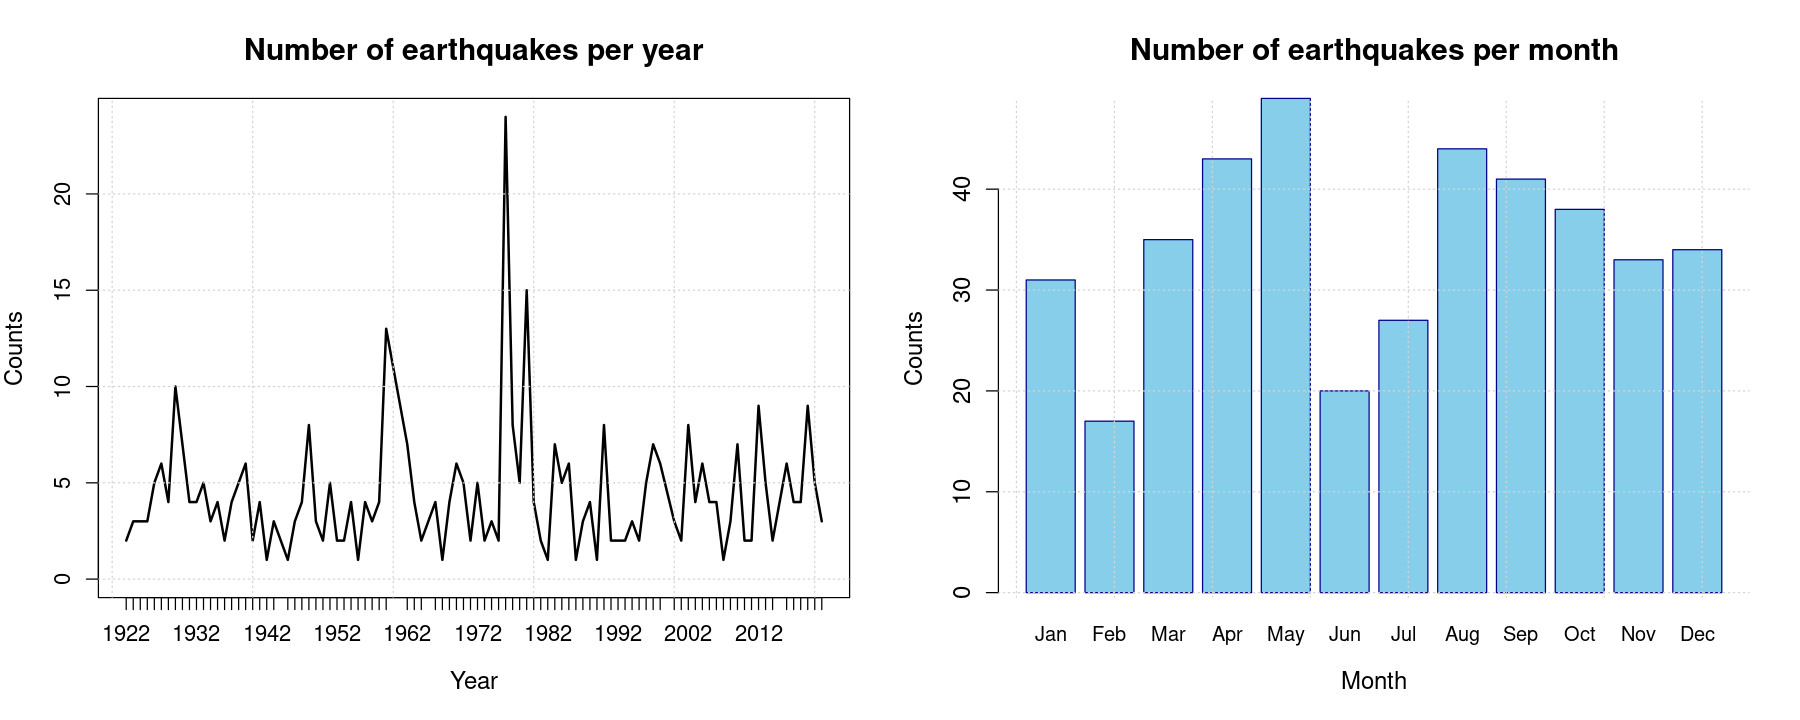

In [12]:
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1, 2))

plot(table(df$year),
     xlab = 'Year', ylab = 'Counts', main = 'Number of earthquakes per year',
     type = 'l', lwd = 2,
     cex.main = 1.5, cex.lab = 1.2, cex.axis = 1.1
    )
grid()

barplot(table(df$month), names.arg = month.abb,
        xlab = 'Month', ylab = 'Counts', main = 'Number of earthquakes per month',
        col = 'skyblue', border = 'darkblue',
        cex.main = 1.5, cex.lab = 1.2, cex.axis = 1.2
       )
grid()

Now we can subdivide the earthquakes by magnitude, highlighting the **Gutenberg-Richter power law distribution** of the seismic events in time.

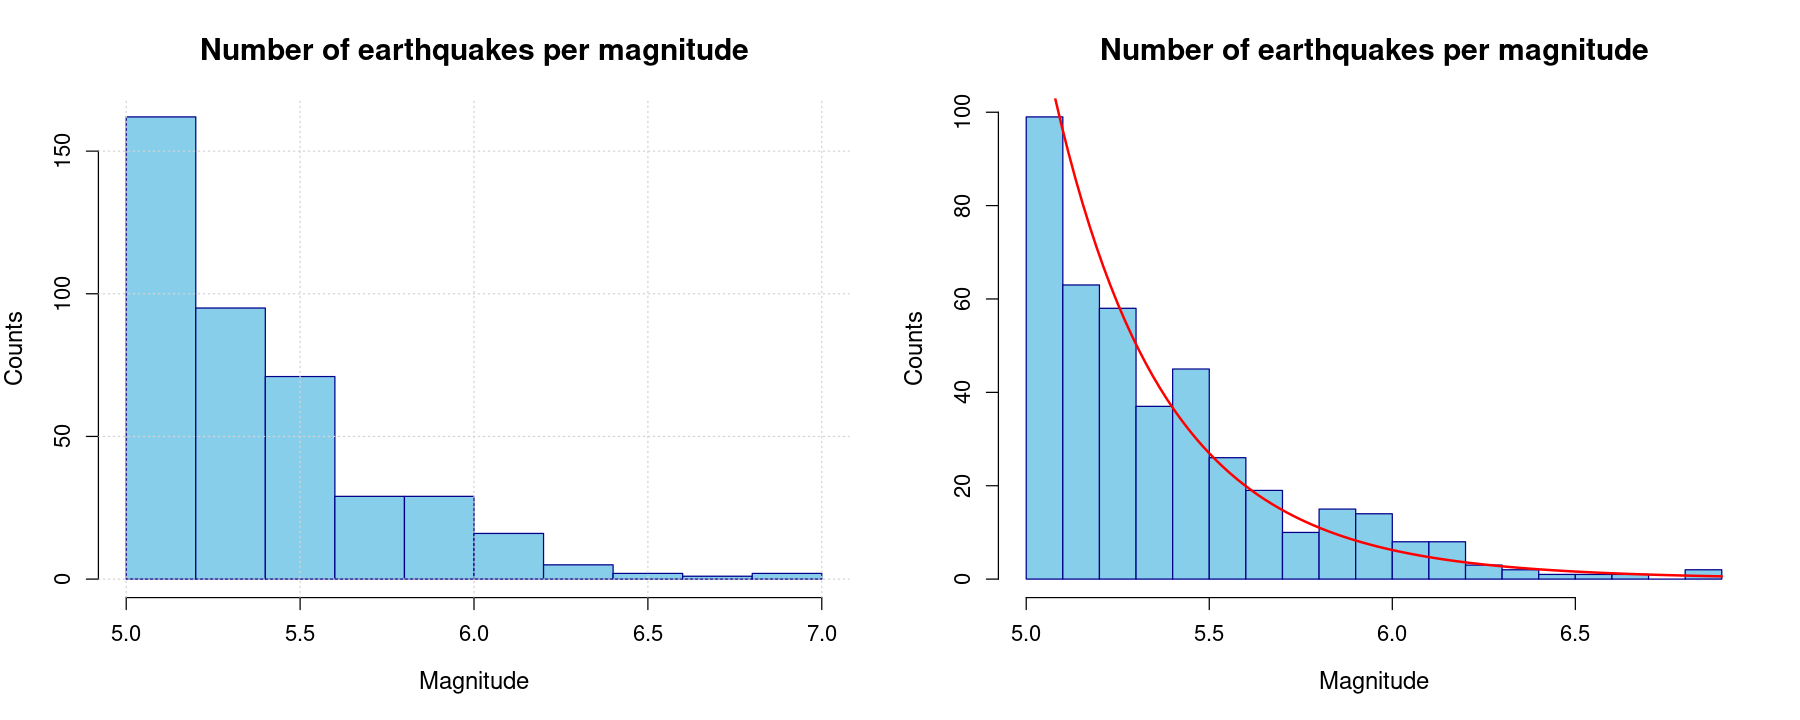

In [13]:
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1, 2))

hist(df$mag, breaks = 13, col = 'skyblue', border = 'darkblue', xlab = 'Magnitude', ylab = 'Counts', main = 'Number of earthquakes per magnitude', cex.main = 1.5, cex.lab = 1.2, cex.axis = 1.1)
grid()

# Assuming df$mag contains your earthquake magnitudes
data <- df$mag

# Create an empirical power-law object for continuous data
pl_model <- conpl$new(data)

# Estimate xmin and alpha using maximum likelihood estimation (MLE)
est <- estimate_xmin(pl_model)
pl_model$setXmin(est)

# Now we can retrieve the estimated parameters (e.g., alpha)
alpha <- pl_model$pars

# Plot the histogram
hist(df$mag, breaks = 25, col = 'skyblue', border = 'darkblue', xlab = 'Magnitude', 
     ylab = 'Counts', main = 'Number of earthquakes per magnitude', 
     cex.main = 1.5, cex.lab = 1.2, cex.axis = 1.1)

# Overlay the power law fit
x_vals <- seq(min(data), max(data), length.out = 100)
y_vals <- 30*(x_vals / est$xmin)^(-alpha)
lines(x_vals, y_vals * max(hist(data, plot = FALSE)$density), col = "red", lwd = 2)


It's useful also to plot the evolution of the magnitude over time. We will consider both the average and the maximum magnitude values for each time period to better understand the behavior and intensity of the events.

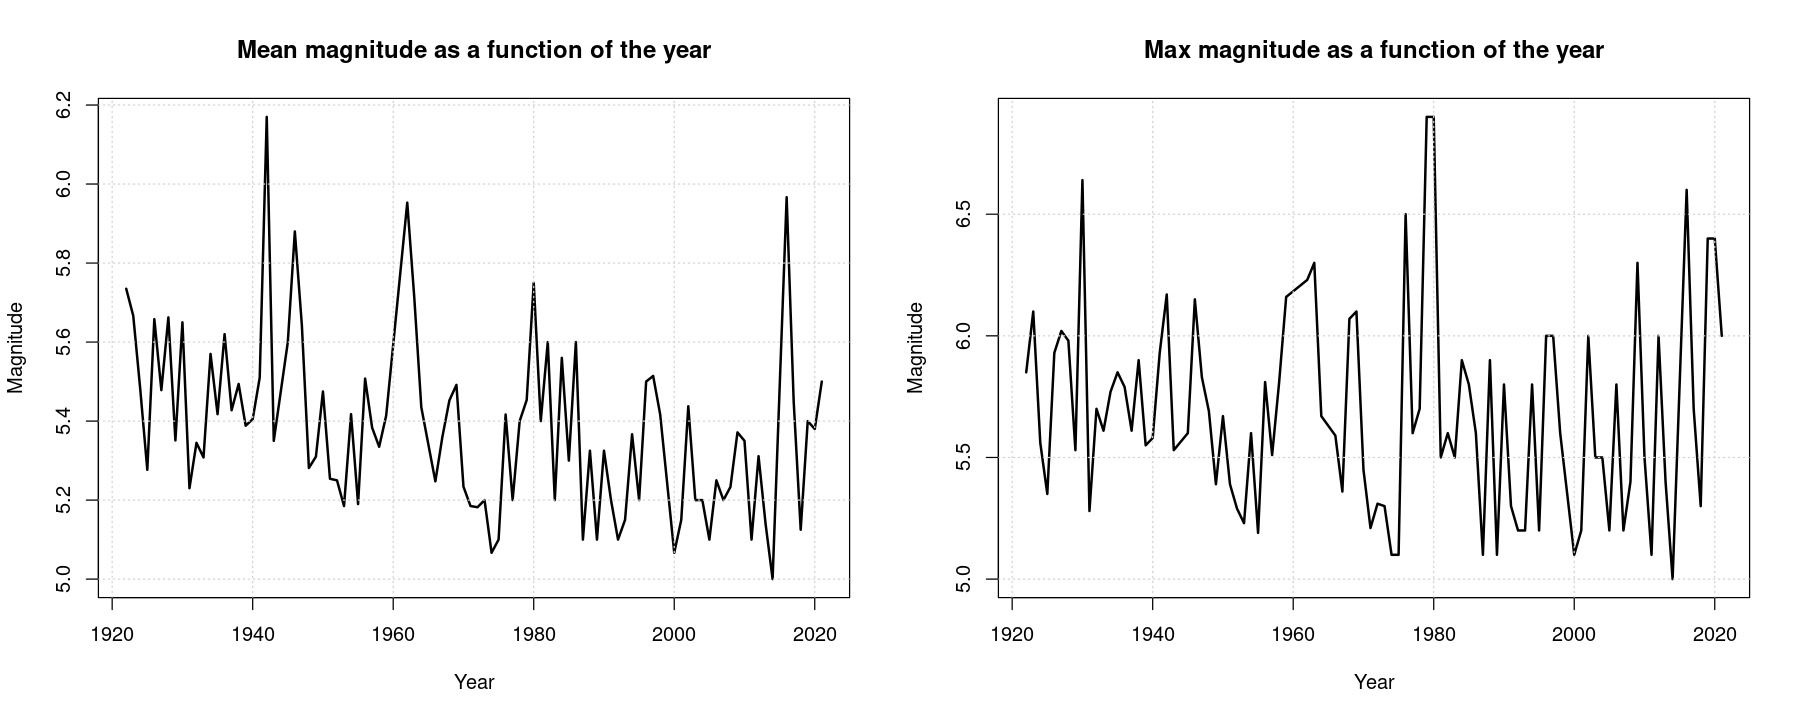

In [14]:
options(repr.plot.width = 15, repr.plot.height = 6)
par(mfrow = c(1, 2))

mean_mag_by_year <- aggregate(mag ~ year, data = df, FUN = mean, na.rm = TRUE)

plot(mean_mag_by_year, type = "l", xlab = "Year", ylab = "Magnitude", main = "Mean magnitude as a function of the year", lwd = 2)
grid()

max_mag_by_year <- aggregate(mag ~ year, data = df, FUN = max, na.rm = TRUE)

plot(max_mag_by_year, type = "l", xlab = "Year", ylab = "Magnitude", main = "Max magnitude as a function of the year", lwd = 2)
grid()

We now want to investigate time related information more in detail. We are interested into the waiting time between one earthquake and the following one.

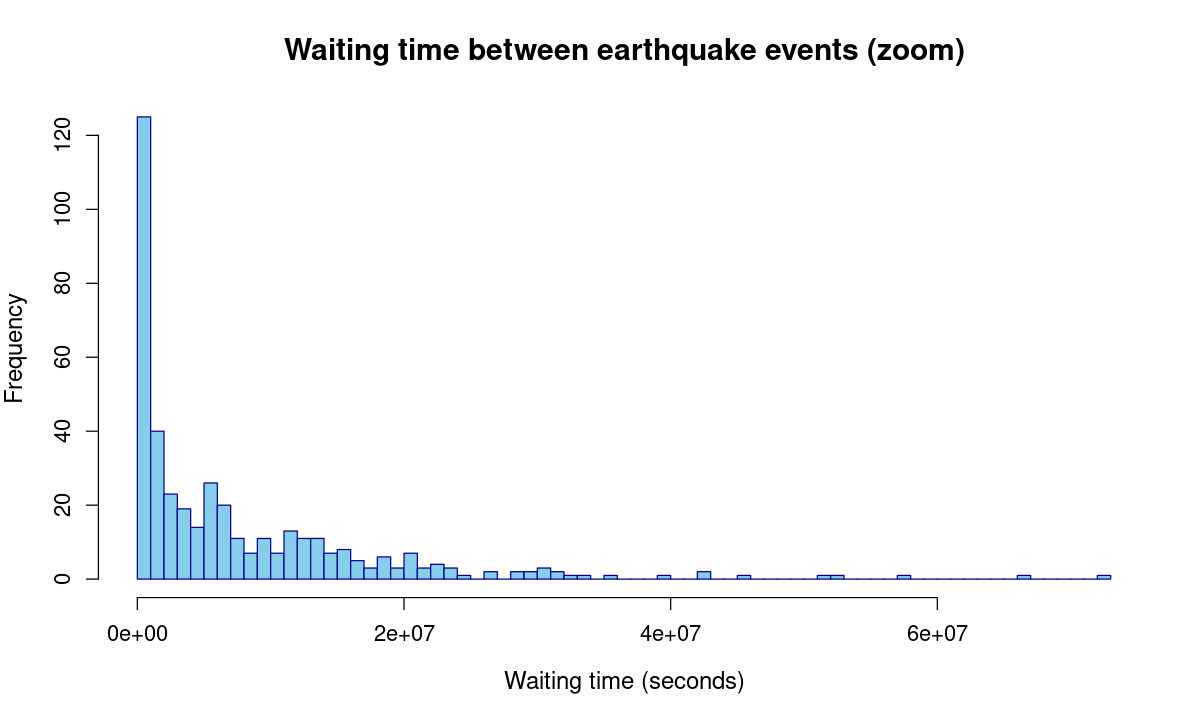

In [15]:
options(repr.plot.width = 10, repr.plot.height = 6)

df <- df[order(df$time_posix), ]
waiting_time <- as.numeric(diff(df$time_posix))

# Plot the histogram
hist(waiting_time, breaks = 60, col = 'skyblue', border = 'darkblue', main = "Waiting time between earthquake events (zoom)",
     xlab = "Waiting time (seconds)", ylab = "Frequency",
     cex.main = 1.5, cex.lab = 1.2, cex.axis = 1.1)

It seems to follow a power law distribution, with the maximum values around $\sim10^7$. We can zoom in on the first part of the plot, where most of the counts are.
The observed trend indicates that larger magnitude earthquakes are less frequent, while smaller magnitude ones occur more often. This behavior aligns with well-known seismic activity patterns, where the frequency of events decreases exponentially as magnitude increases. 


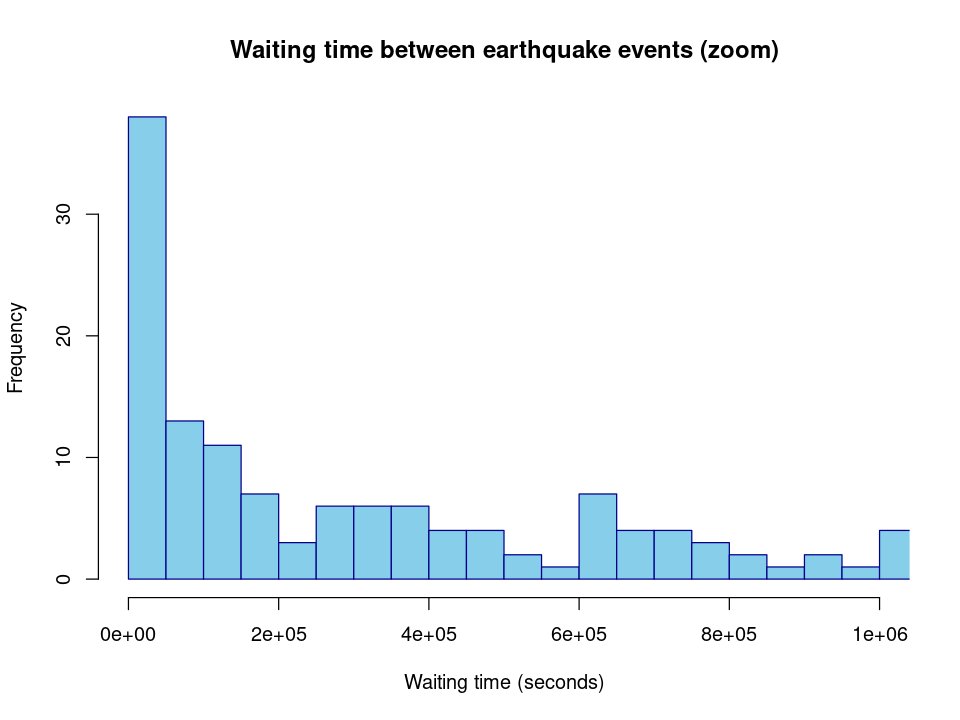

In [16]:
options(repr.plot.width = 8, repr.plot.height = 6)

hist(waiting_time, breaks = 2000, col = "skyblue", border = "darkblue",
     main = "Waiting time between earthquake events (zoom)",
     xlab = "Waiting time (seconds)", ylab = "Frequency",
     xlim = c(0, 1e6)
     )

Since the pattern is the same, it confirms once again the power law distribution.

#### Magnitude forecasting analysis

Many time series include trend, cycles and seasonality.
When choosing a forecasting method, we will first need to identify the time series patterns in the data, and then choose a method that is able to capture the patterns properly.
We are going first to analyze the entire dataset in our package and then restrict ourselves to a smaller region.

In this section we aim to visualize the distribution of the earthquakes in order to observe particular patterns in our data. We need to identify a recurrent pattern before being able of making a prediction. In particular, we have to understand if our data have or not have a recurrent pattern. We can identify some kind of seasonality in the plot of the magnitude per year. 


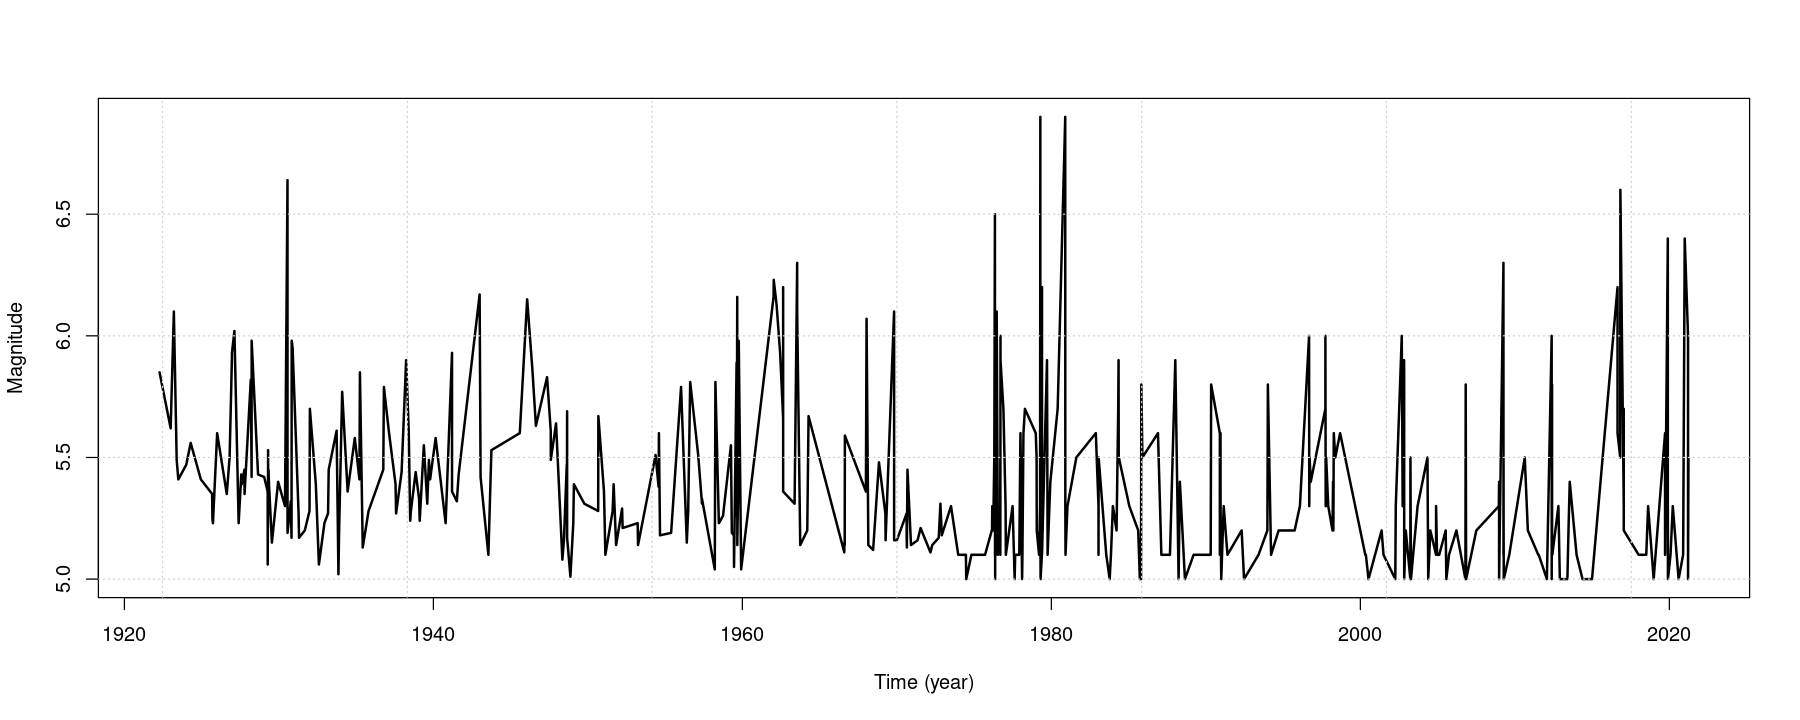

In [17]:
options(repr.plot.width = 15, repr.plot.height = 6)

plot(df$time_posix, df$mag, type = "l", xlab = "Time (year)", ylab = "Magnitude", lwd = 2)
grid()

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
1  5.496667 6.020000 5.830000 5.445000 5.370000 5.410000 5.290000 5.390000
2  5.515000 5.540000 5.576000 5.220000 5.462500 5.245000 5.548000 5.213333
3  5.600000 5.485000 5.645000       NA 5.590000 5.160000 5.210000 5.476000
4  5.575000 5.305000 5.175000 5.440000 5.298000 5.168000 5.380000 5.485714
5  6.153333 5.140000 5.665000 5.366667 5.310000 5.525000 6.200000 5.458571
6  5.275000 5.125000 5.262000 5.504444 5.381538 5.300000 5.203333 5.136000
7  5.400000 5.100000 5.100000 5.550000 5.650000       NA 5.100000 5.233333
8  5.800000 5.300000 5.233333 5.240000 5.375000 5.000000       NA       NA
9        NA 5.100000 5.233333 5.290000 5.200000       NA 5.116667 5.100000
10 5.316667       NA       NA       NA 5.300000 5.150000 5.175000 5.650000
11 5.100000       NA 5.450000       NA       NA       NA       NA 5.000000
   Sep      Oct      Nov      Dec     
1  5.276667 5.433333       NA 5.654000
2  5.433333 5.485714 5.436000 5.316667
3        NA 5.356667 5.010000 5.905000
4  5.466667 5.560000       NA 5.040000
5  5.140000 5.786667 5.480000 5.260000
6  5.438182 5.170000 5.440000 5.323333
7  5.050000 5.266667 5.585714 5.300000
8  5.522222 5.400000 5.350000 5.280000
9  5.425000 5.566667 5.240000 5.200000
10 5.350000 5.860000 5.344444 5.033333
11       NA       NA 5.100000 6.400000

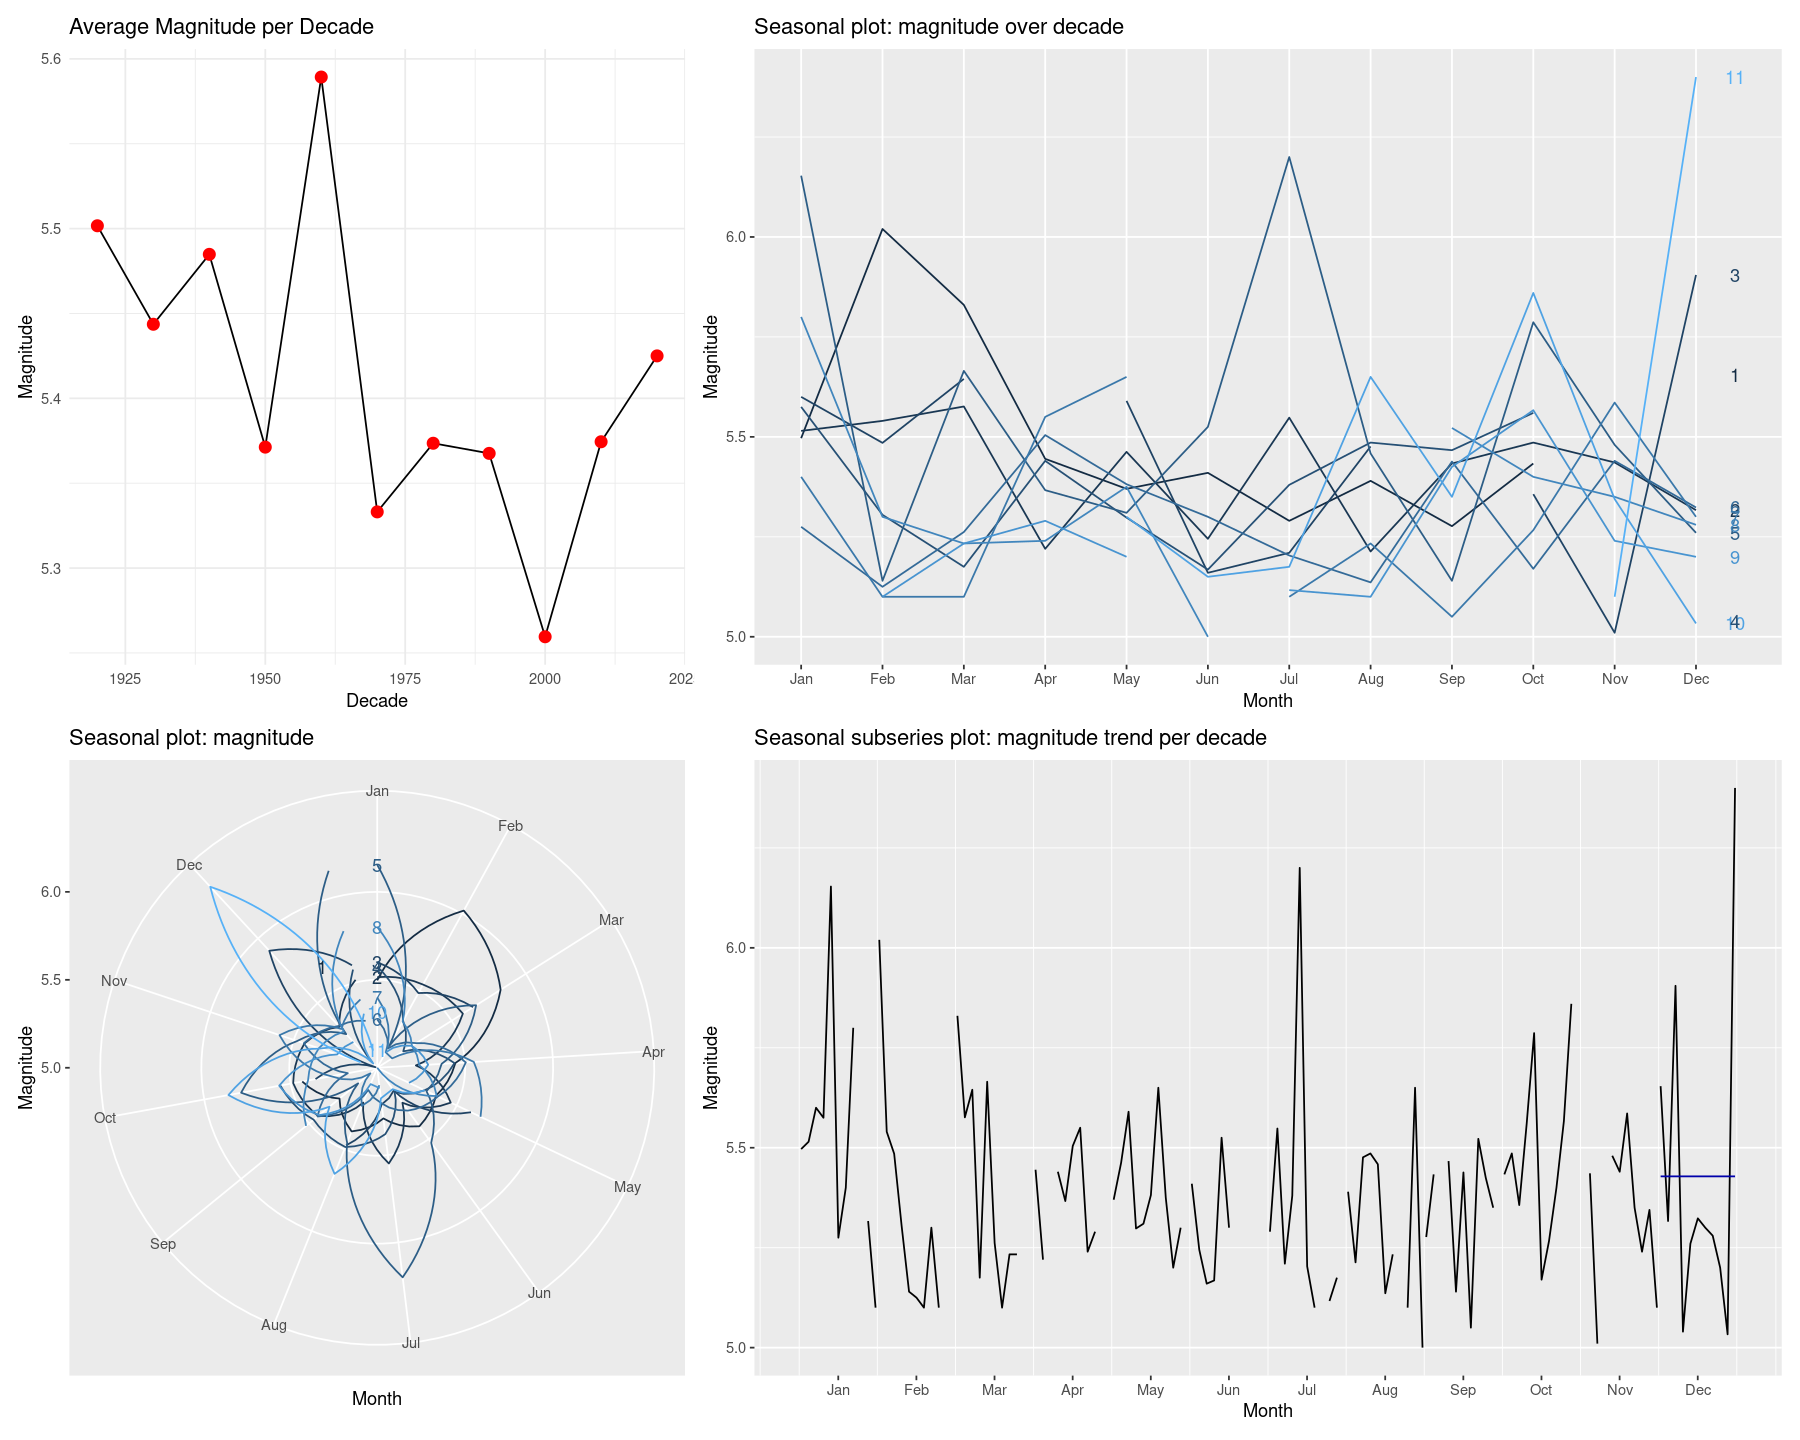

In [18]:
options(repr.plot.width = 15, repr.plot.height = 12, warn = -1)

# Now aggregating over the decade
df$decade <- floor(df$year / 10) * 10

# Aggregate the magnitude by decade
mean_mag_by_decade <- aggregate(mag ~ decade, data = df, FUN = mean, na.rm = FALSE)

# Ensure that the decades are in the correct order
mean_mag_by_decade <- mean_mag_by_decade[order(mean_mag_by_decade$decade), ]

avg_mag_dec <- ggplot(mean_mag_by_decade, aes(x = decade, y = mag)) +
  geom_line(color = "black") +
  geom_point(size = 3, color = "red") +
  ggtitle("Average Magnitude per Decade") +
  xlab("Decade") +
  ylab("Magnitude") +
  theme_minimal()

# Aggregate the magnitude by decade
mean_mag_by_month <- aggregate(mag ~ decade + month, data = df, FUN = mean, na.rm = FALSE)
mean_mag_by_month <- pivot_wider(mean_mag_by_month, 
                       names_from = month, 
                       values_from = mag, 
                       id_cols = decade)
mean_mag_by_month <- t(mean_mag_by_month[order(mean_mag_by_month[, 1]), ])

colnames(mean_mag_by_month) <- mean_mag_by_month[1, ]
mean_mag_by_month <- mean_mag_by_month[-1, ]
#mean_mag_by_month
magn <- ts(as.vector(as.matrix(mean_mag_by_month)), frequency = 12, start = c(1, 1))
magn

mag_dec_sea <- ggseasonplot(magn, year.labels=TRUE, continuous = TRUE) +
  ylab("Magnitude") +
  ggtitle("Seasonal plot: magnitude over decade")

mag_sea <- ggseasonplot(magn,  year.labels=TRUE, polar = TRUE, continuous = TRUE) +
  ylab("Magnitude") +
  ggtitle("Seasonal plot: magnitude")

mag_sea_sub <- ggsubseriesplot(magn) +
  ylab("Magnitude") +
  ggtitle("Seasonal subseries plot: magnitude trend per decade")

entire_plot <- avg_mag_dec + mag_dec_sea + mag_sea + mag_sea_sub

entire_plot

All of the above plots are related to the evolution of the mean magnitude estimated over each decade in the dataset.

* **Upper left**: here is represented the evolution of the mean magnitude estimated over a decade. We can actually observe a peak in 1960 probably related to an increased seismologic activity in that period;
* **Upper right**: this is a seasonal plot, it shows the data across different periods of a seasonal cycle (e.g., months, quarters) to visualize how values vary over time within each season. This can be useful in order to observe recurrent patterns or periods of increased seismologic activity;
* **Lower left**: seasonal plot, now shown using polar coordinates;
* **Lower right**: in this graph the time series is broken down by season, with each season having its own plot. It helps to understand the pattern without making a distinction by year but only by month.

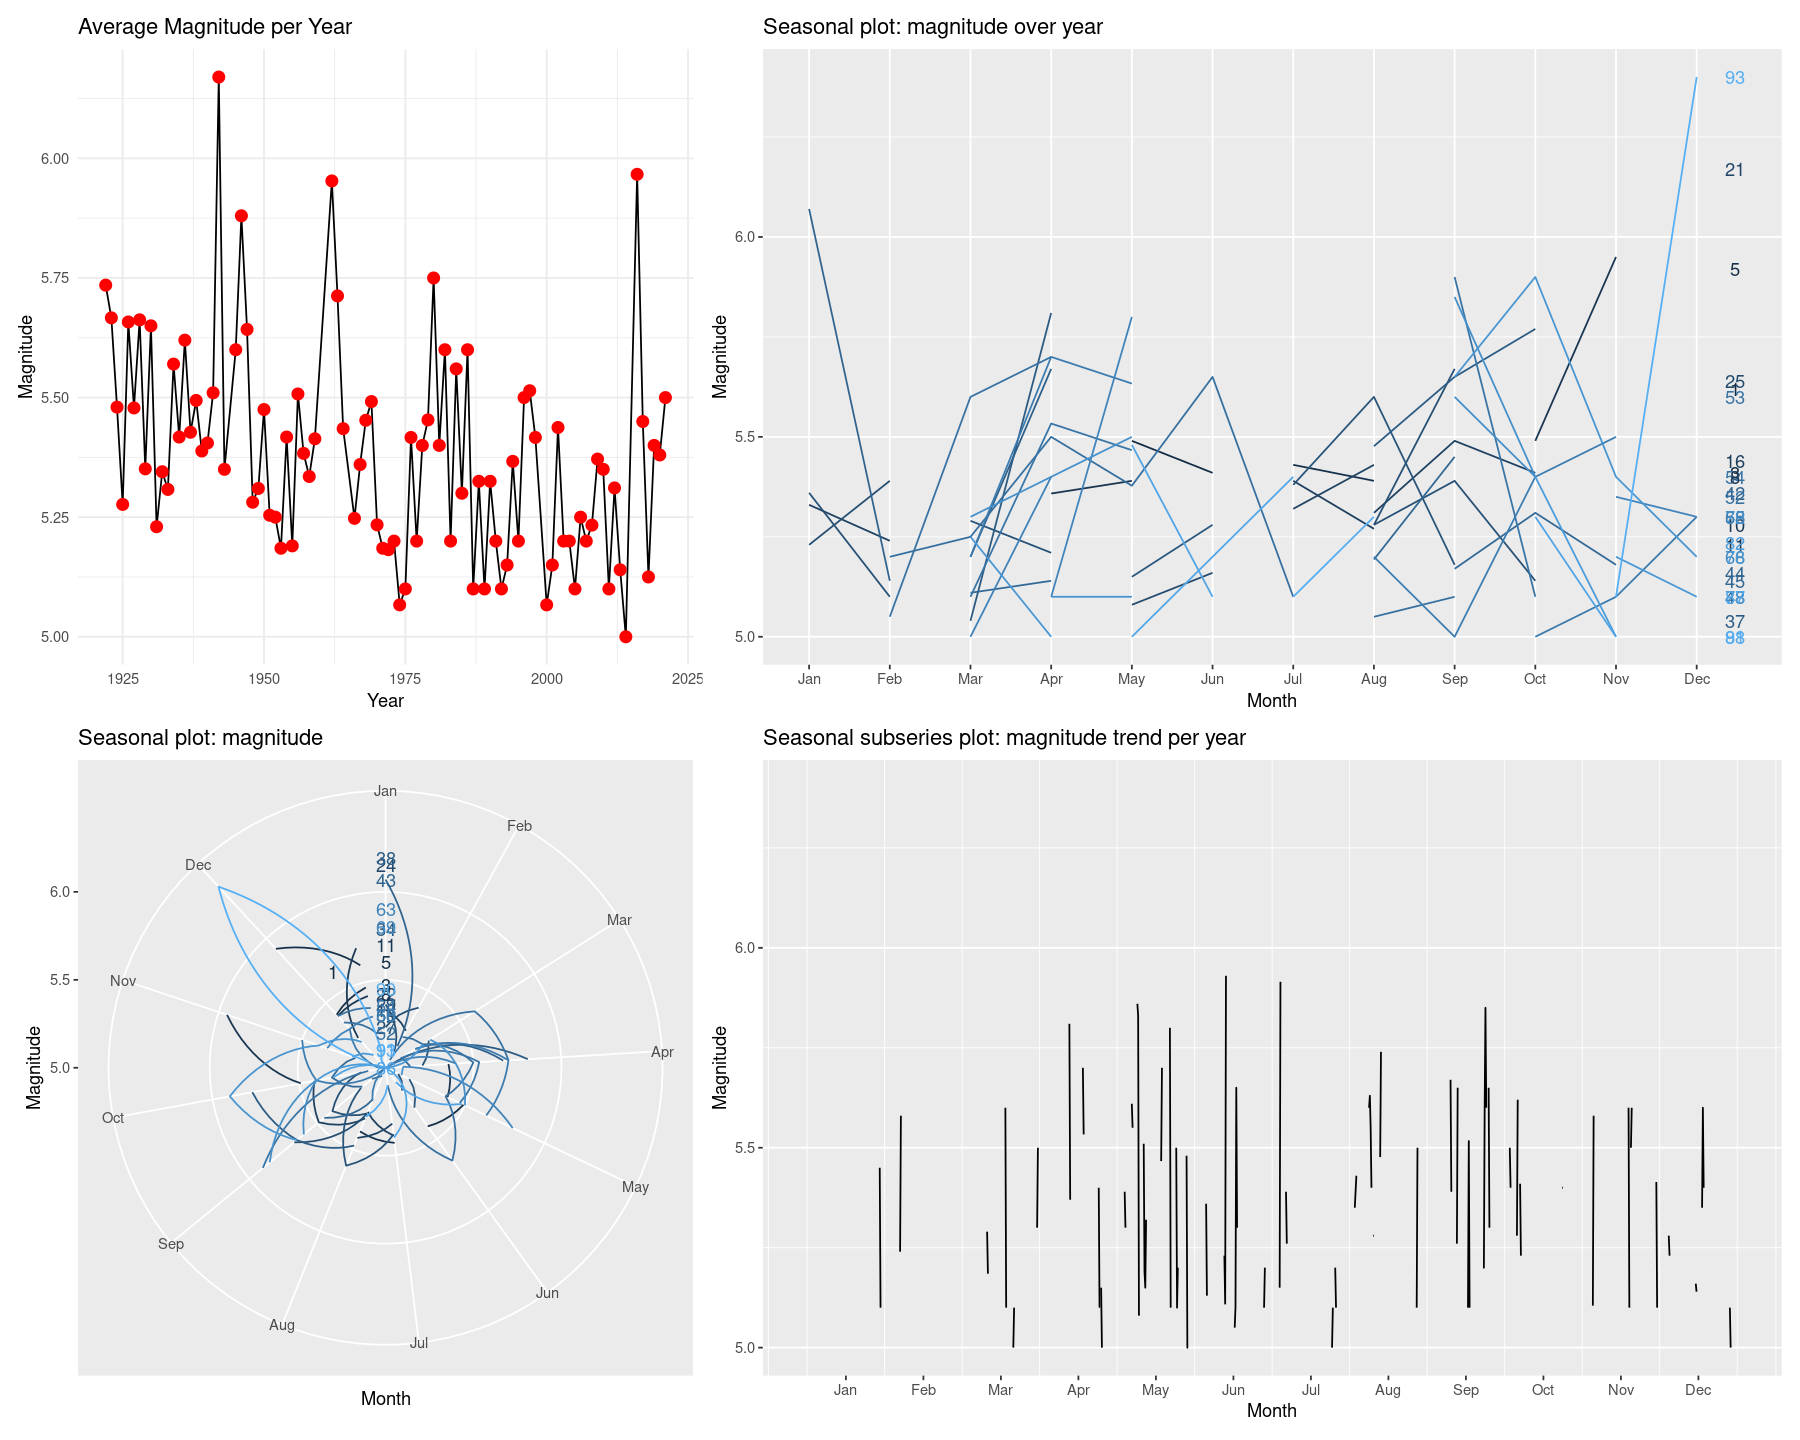

In [19]:
options(repr.plot.width = 15, repr.plot.height = 12, warn = -1)

mean_mag_by_year <- aggregate(mag ~ year, data = df, FUN = mean, na.rm = FALSE)

# Ensure that the decades are in the correct order
mean_mag_by_year <- mean_mag_by_year[order(mean_mag_by_year$year), ]

avg_mag_year <- ggplot(mean_mag_by_year, aes(x = year, y = mag)) +
  geom_line(color = "black") +
  geom_point(size = 3, color = "red") +
  ggtitle("Average Magnitude per Year") +
  xlab("Year") +
  ylab("Magnitude") +
  theme_minimal()

# Aggregate the magnitude by year
mean_mag_by_month <- aggregate(mag ~ year + month, data = df, FUN = mean, na.rm = FALSE)
mean_mag_by_month <- pivot_wider(mean_mag_by_month, 
                       names_from = month, 
                       values_from = mag, 
                       id_cols = year)
mean_mag_by_month <- t(mean_mag_by_month[order(mean_mag_by_month[, 1]), ])

colnames(mean_mag_by_month) <- mean_mag_by_month[1, ]
mean_mag_by_month <- mean_mag_by_month[-1, ]
#mean_mag_by_month
magn1 <- ts(as.vector(as.matrix(mean_mag_by_month)), frequency = 12, start = c(1, 1))
#magn1

mag_dec_sea <- ggseasonplot(magn1, year.labels=TRUE, continuous = TRUE) +
  ylab("Magnitude") +
  ggtitle("Seasonal plot: magnitude over year")

mag_sea <- ggseasonplot(magn1,  year.labels=TRUE, polar = TRUE, continuous = TRUE) +
  ylab("Magnitude") +
  ggtitle("Seasonal plot: magnitude")

mag_sea_sub <- ggsubseriesplot(magn1) +
  ylab("Magnitude") +
  ggtitle("Seasonal subseries plot: magnitude trend per year")

entire_plot <- avg_mag_year + mag_dec_sea + mag_sea + mag_sea_sub

entire_plot

The same graph of above is repeated but in this case we are considering the average magnitude per year. The presence of a higher number of NA values is reflected in a greater lack of data compared to the previous case.

An important concept in time series modeling is [`ARIMA`](https://jtr13.github.io/cc19/time-series-modeling-with-arima-in-r.html), or Auto-Regressive Integrated Moving Average. `ARIMA` is the combination of two models, the auto-regressive and the moving average models. An auto regressive $\textbf{AR(p)}$ component refers to the use of past values in the regression equation for the series Y. The auto-regressive parameter $\textbf{p}$ specifies the number of lags, or past values, to be used in the model. For example, $\textbf{AR(2)}$ is represented as:

$ Y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + e_t $

where $\phi_1$ and $\phi_2$ are parameters for the model.

The moving average nature of the model is represented by the $\textbf{q}$ value, which is the number of lagged values of the error term. A moving average MA(q) component represents the error of the model as a combination of previous error terms et. The order q determines the number of terms to include in the model:

$ Y_t = c + \theta_1 e_{t-1} + \theta_2 e_{t-2} + ... + \theta_q e_{t-q} + e_t $ 

Together, with the differencing variable $\textbf{d}$, which is used to remove the trend and convert a non-stationary time series to a stationary one, these three parameters define the `ARIMA` model. Thus, `ARIMA` is specified by three order parameters: $\textbf{(p, d, q)}$.


In `ARIMA` we can actually find two methods: 
* $\textbf{ACF}$ stands for Auto-Correlation Function. ACF gives us values of any auto-correlation with its lagged values. In essence, it tells us how the present value in the series is related in terms with its past values. ACF will help us determine the number, or order, of moving-average (MA) coefficients in our ARIMA model;

* $\textbf{PACF}$ stands for Partial Auto-Correlation Function. Instead of finding correlations of present with lags like ACF, it finds correlation of the residuals with the next lag value. If there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. PACF helps us identify the number of auto-regression (AR) coefficients in our ARIMA model.

The same parameters can also be defined for the seasonal part.


So, let's first take a look at the $\textbf{ACF}$ and $\textbf{PACF}$ functions.

Series: magn 
ARIMA(0,1,1) 
Box Cox transformation: lambda= 0 

Coefficients:
          ma1
      -0.9561
s.e.   0.0276

sigma^2 = 0.002064:  log likelihood = 186.48
AIC=-368.96   AICc=-368.87   BIC=-363.21

Training set error measures:
                      ME      RMSE       MAE        MPE    MAPE      MASE
Training set -0.03071939 0.2486073 0.1834684 -0.7603207 3.37358 0.7557808
                    ACF1
Training set -0.04081463

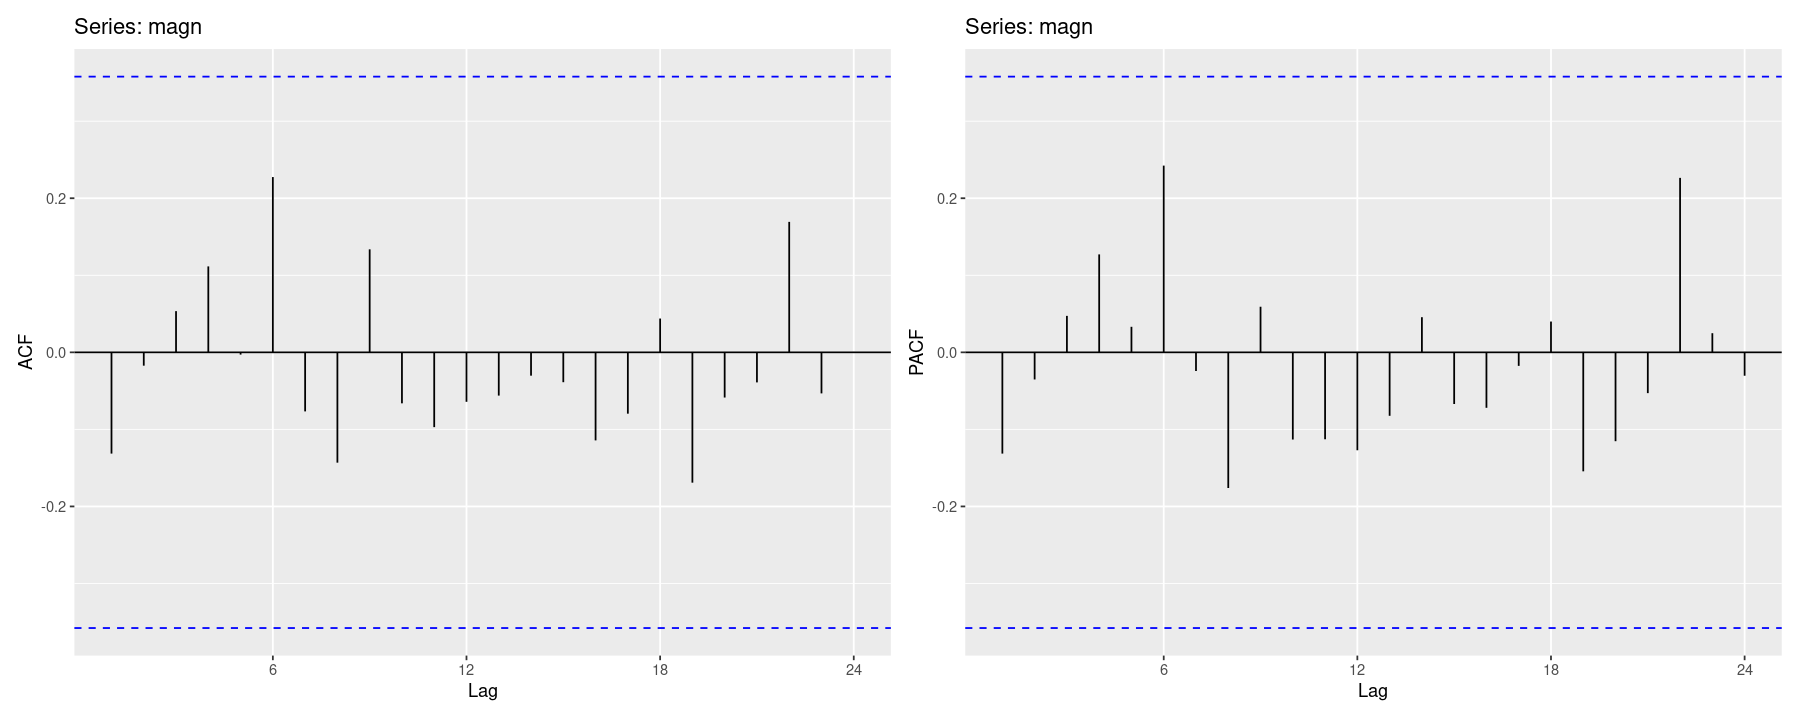

In [20]:
options(repr.plot.width = 15, repr.plot.height = 6)

gg1 <- ggAcf(magn)
gg2 <- ggPacf(magn)

gg1 + gg2

fit_auto <- auto.arima(magn, seasonal=TRUE, lambda=0)
summary(fit_auto)

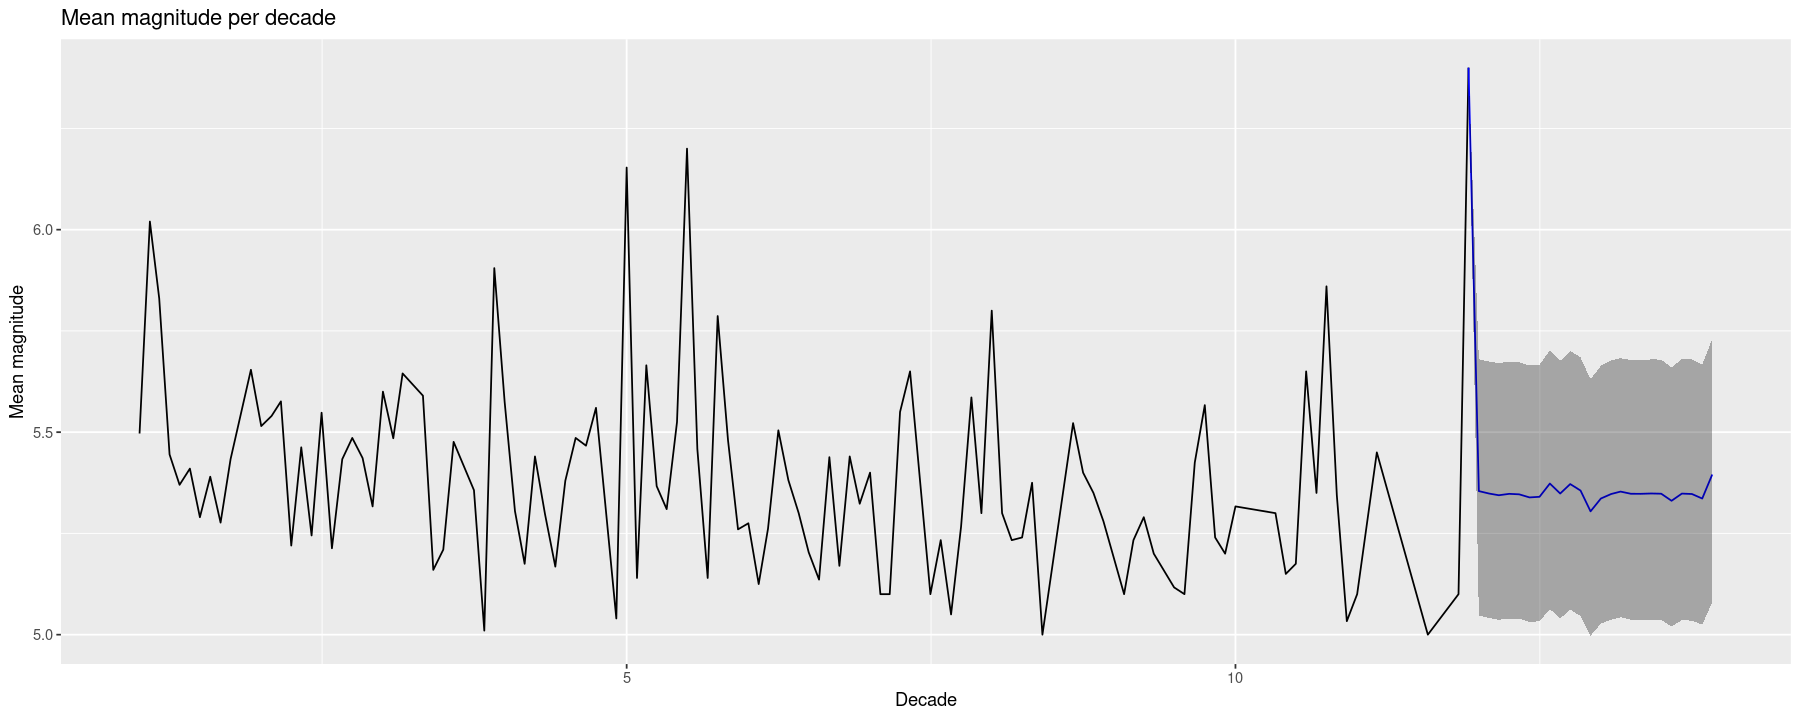


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(2,0,0)[12]
Q* = 14.171, df = 21, p-value = 0.8621

Model df: 3.   Total lags used: 24



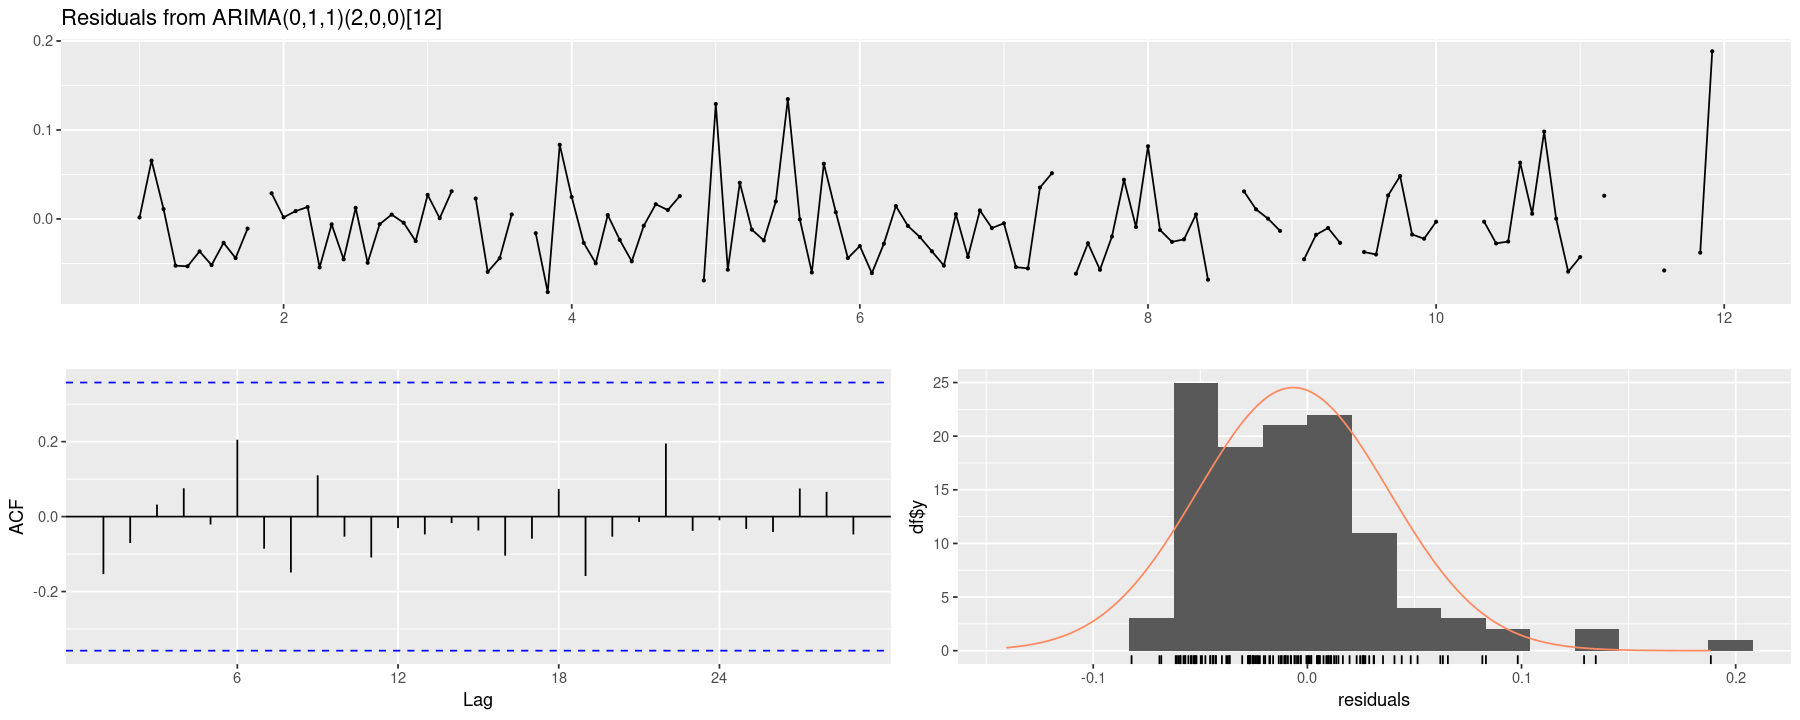

In [21]:
magn %>%
  Arima(order=c(0,1,1), seasonal=c(2,0,0), lambda=0) %>%
  forecast() %>%
  autoplot() +
    ylab("Mean magnitude") + xlab("Decade") + ggtitle("Mean magnitude per decade")

model <- Arima(magn, order=c(0,1,1), seasonal=c(2,0,0), lambda=0)
checkresiduals(model)

The residuals in the above graphs represent the difference between the observed data and the values predicted by the ARIMA model.

Specifically, they are calculated as:

 $ Residual_t = Observed_t - Predicted_t $

* **Residuals over time**: this plot shows how the residuals vary over time. Ideally, the residuals should be randomly scattered around zero, with no visible pattern. 

* **ACF graph**: the Autocorrelation Function (ACF) graph shows how the residuals are correlated with themselves at different lags. Ideally, the autocorrelations should fall within the blue dashed confidence intervals, which would suggest that the residuals are not autocorrelated.
  
* **Histogram of residuals**: this histogram illustrates the distribution of residuals and overlays it with a red curve representing the ideal normal distribution. For a well-fitting ARIMA model, the residuals should follow this bell-shaped curve, meaning they are approximately normally distributed. 

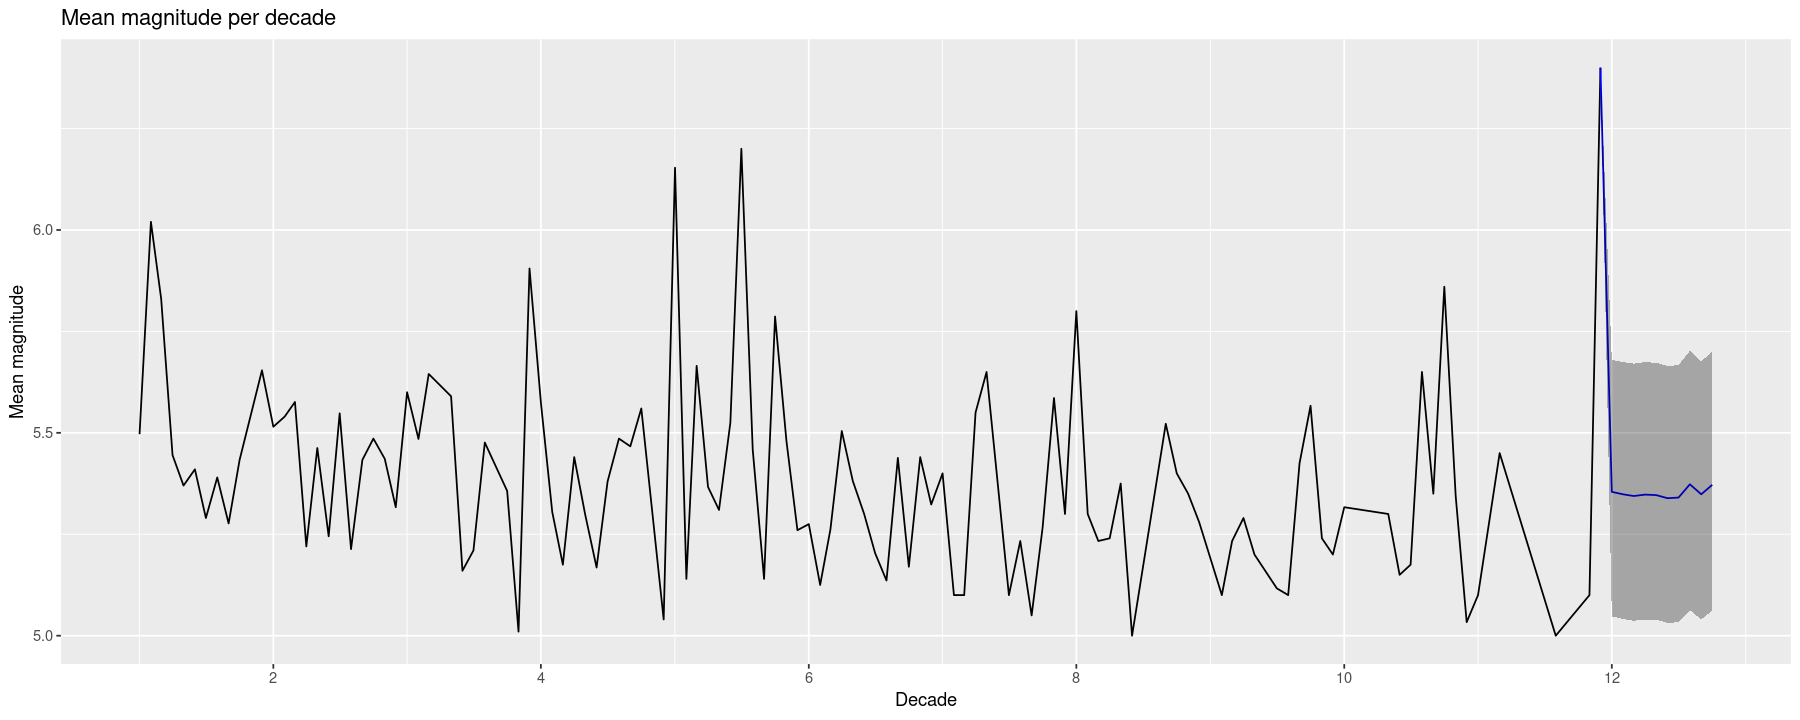

In [22]:
options(repr.plot.width = 15, repr.plot.height = 6)

my_forecast = forecast(model, h = 10)
autoplot(my_forecast) + ylab("Mean magnitude") + xlab("Decade") + ggtitle("Mean magnitude per decade")

Given the fact that it is not actually possible to observe some kind of seasonality in our data, the prediction is centered around the zero mean with small fluctuations.

As well as looking at the time plot of the data, the ACF plot is also useful for identifying non-stationary time series. For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly. 

##### Dalmatian region

Now we are going to restrict the magnitude analysis to the Dalmatian region, in particular analysing the mean magnitude by year.

In [23]:
df_dal <- df[df$longitude >= 16 &
                  df$latitude >= 40 & df$latitude <= 43, ]

Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
1        NA 6.020000       NA 5.850000       NA       NA       NA 5.390000
2        NA 5.770000 5.850000       NA 5.580000       NA 5.240000 5.185000
3        NA 5.580000       NA       NA       NA       NA       NA 5.496667
4        NA       NA 5.140000 5.810000       NA 5.050000       NA 5.507500
5        NA       NA 6.130000 5.215000       NA       NA       NA 5.247500
6        NA       NA       NA 5.533333 5.650000       NA       NA 5.270000
7  5.600000 5.100000 5.050000 5.400000 5.500000       NA       NA       NA
8        NA       NA       NA 5.100000       NA       NA       NA       NA
9        NA       NA       NA       NA       NA       NA 5.200000 5.100000
10 5.100000       NA       NA       NA 5.000000       NA 5.100000       NA
11 5.100000       NA 5.500000       NA       NA       NA       NA       NA
   Sep      Oct      Nov      Dec     
1        NA 5.500000       NA 5.920000
2        NA       NA 5.950000 5.230000
3        NA       NA       NA 5.640000
4  5.493333 5.770000       NA       NA
5        NA       NA 5.480000       NA
6  5.135000       NA       NA 5.100000
7  5.000000       NA 5.550000 5.300000
8  5.500000       NA       NA 5.200000
9        NA 5.000000       NA       NA
10 5.350000       NA 5.433333 5.000000
11       NA       NA       NA       NA

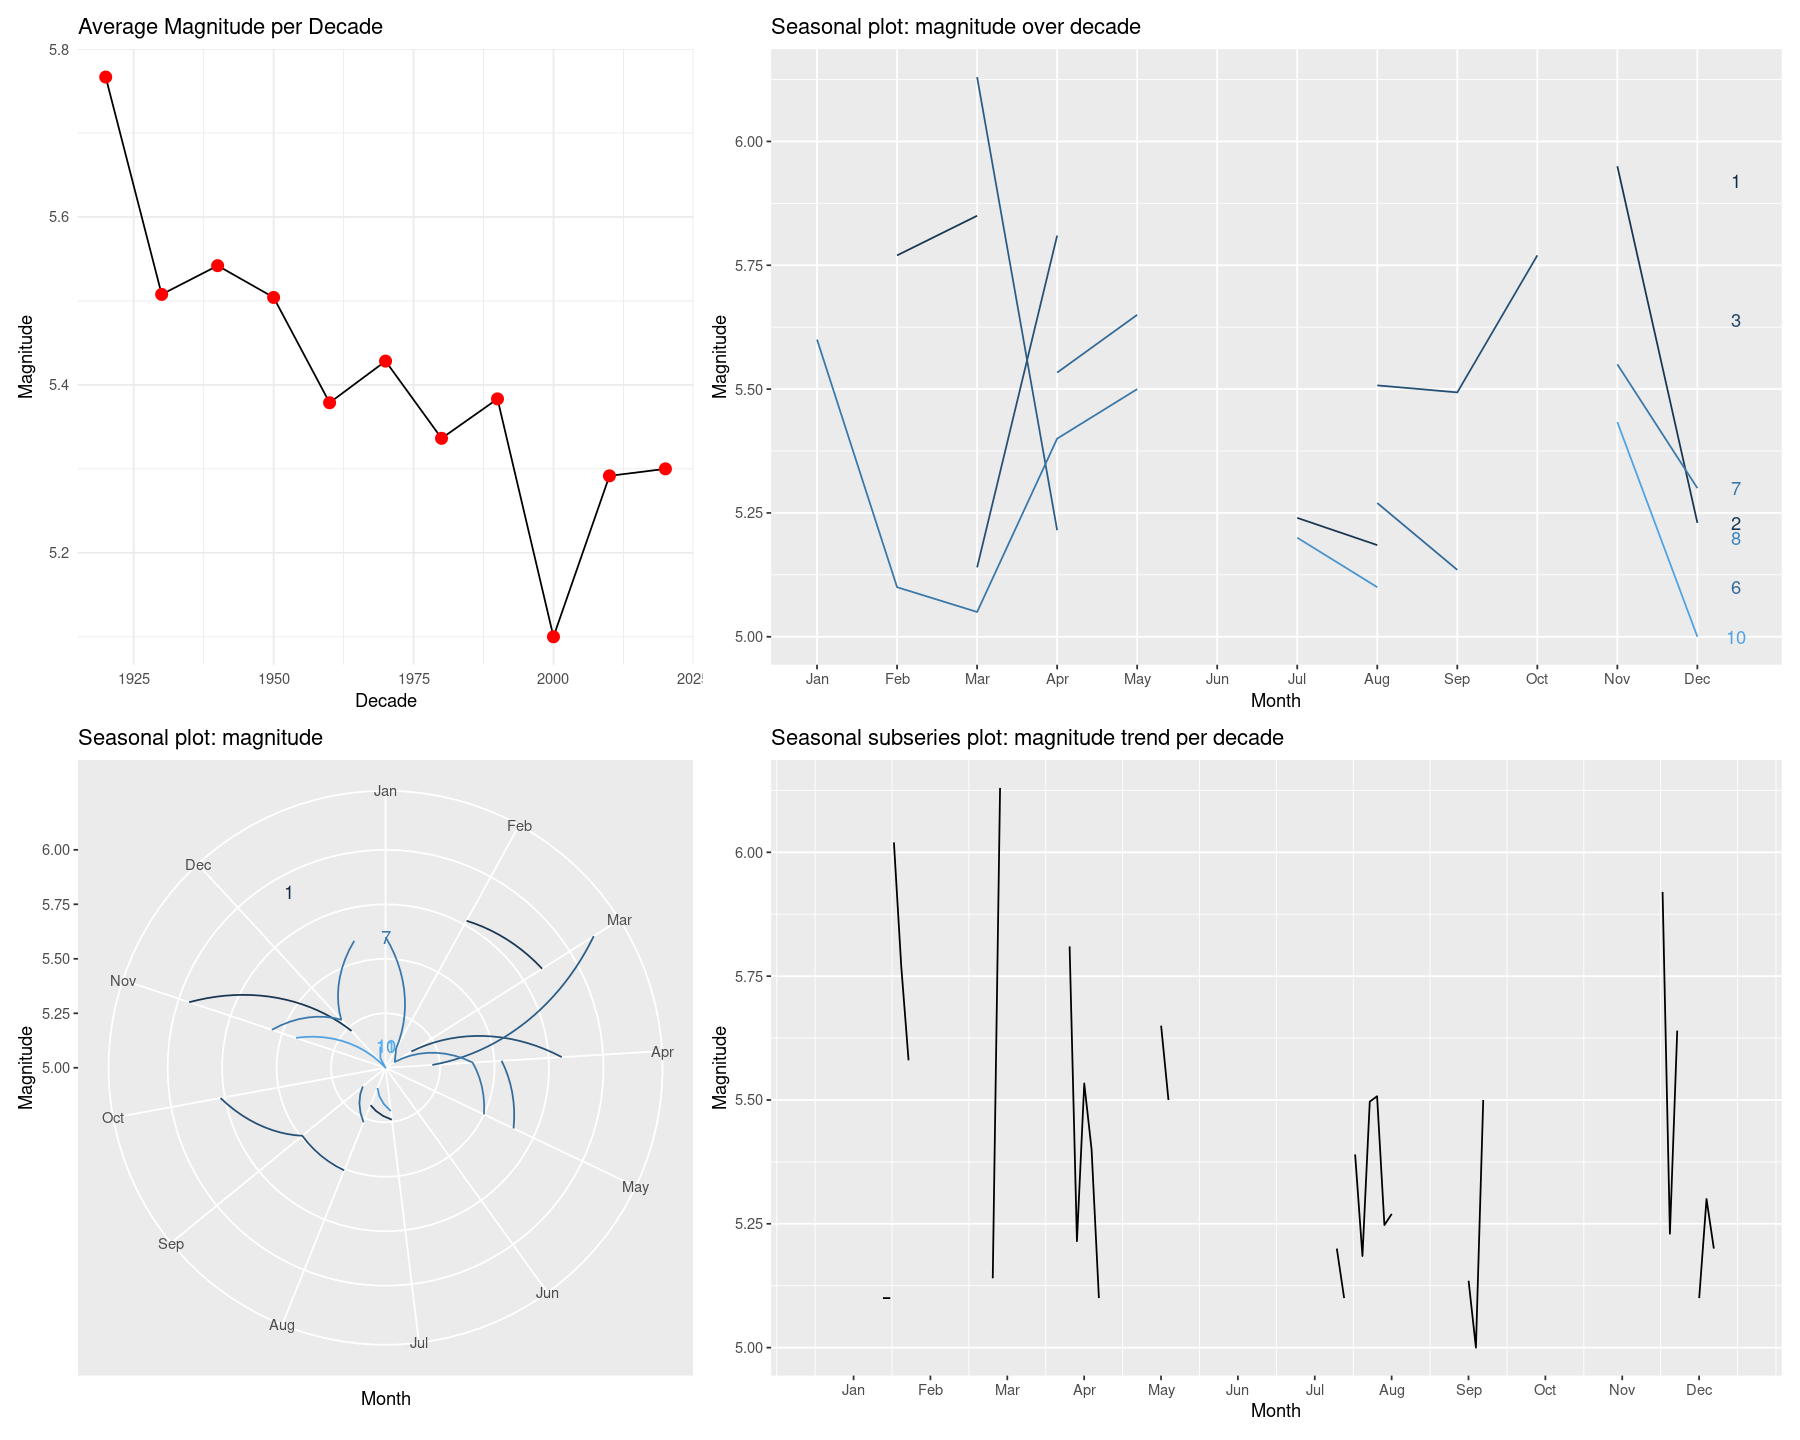

In [24]:
options(repr.plot.width = 15, repr.plot.height = 12, warn = -1)

# Now aggregating over the decade
df_dal$decade <- floor(df_dal$year / 10) * 10

# Aggregate the magnitude by decade
mean_mag_by_decade <- aggregate(mag ~ decade, data = df_dal, FUN = mean, na.rm = FALSE)

# Ensure that the decades are in the correct order
mean_mag_by_decade <- mean_mag_by_decade[order(mean_mag_by_decade$decade), ]

avg_mag_dec <- ggplot(mean_mag_by_decade, aes(x = decade, y = mag)) +
  geom_line(color = "black") +
  geom_point(size = 3, color = "red") +
  ggtitle("Average Magnitude per Decade") +
  xlab("Decade") +
  ylab("Magnitude") +
  theme_minimal()

# Aggregate the magnitude by decade
mean_mag_by_month <- aggregate(mag ~ decade + month, data = df_dal, FUN = mean, na.rm = FALSE)
mean_mag_by_month <- pivot_wider(mean_mag_by_month, 
                       names_from = month, 
                       values_from = mag, 
                       id_cols = decade)
mean_mag_by_month <- t(mean_mag_by_month[order(mean_mag_by_month[, 1]), ])

colnames(mean_mag_by_month) <- mean_mag_by_month[1, ]
mean_mag_by_month <- mean_mag_by_month[-1, ]
#mean_mag_by_month
magn_dal <- ts(as.vector(as.matrix(mean_mag_by_month)), frequency = 12, start = c(1, 1))
magn_dal

mag_dec_sea <- ggseasonplot(magn_dal, year.labels=TRUE, continuous = TRUE) +
  ylab("Magnitude") +
  ggtitle("Seasonal plot: magnitude over decade")

mag_sea <- ggseasonplot(magn_dal, year.labels=TRUE, polar = TRUE, continuous = TRUE) +
  ylab("Magnitude") +
  ggtitle("Seasonal plot: magnitude")

mag_sea_sub <- ggsubseriesplot(magn_dal) +
  ylab("Magnitude") +
  ggtitle("Seasonal subseries plot: magnitude trend per decade")

entire_plot <- avg_mag_dec + mag_dec_sea + mag_sea + mag_sea_sub

entire_plot

Series: magn_dal 
ARIMA(0,1,1) 
Box Cox transformation: lambda= 0 

Coefficients:
          ma1
      -0.8952
s.e.   0.0437

sigma^2 = 0.002371:  log likelihood = 80.14
AIC=-156.28   AICc=-156.18   BIC=-150.69

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.06382078 0.2595749 0.2168421 -1.303203 4.109679 0.7755351
                   ACF1
Training set -0.2581372

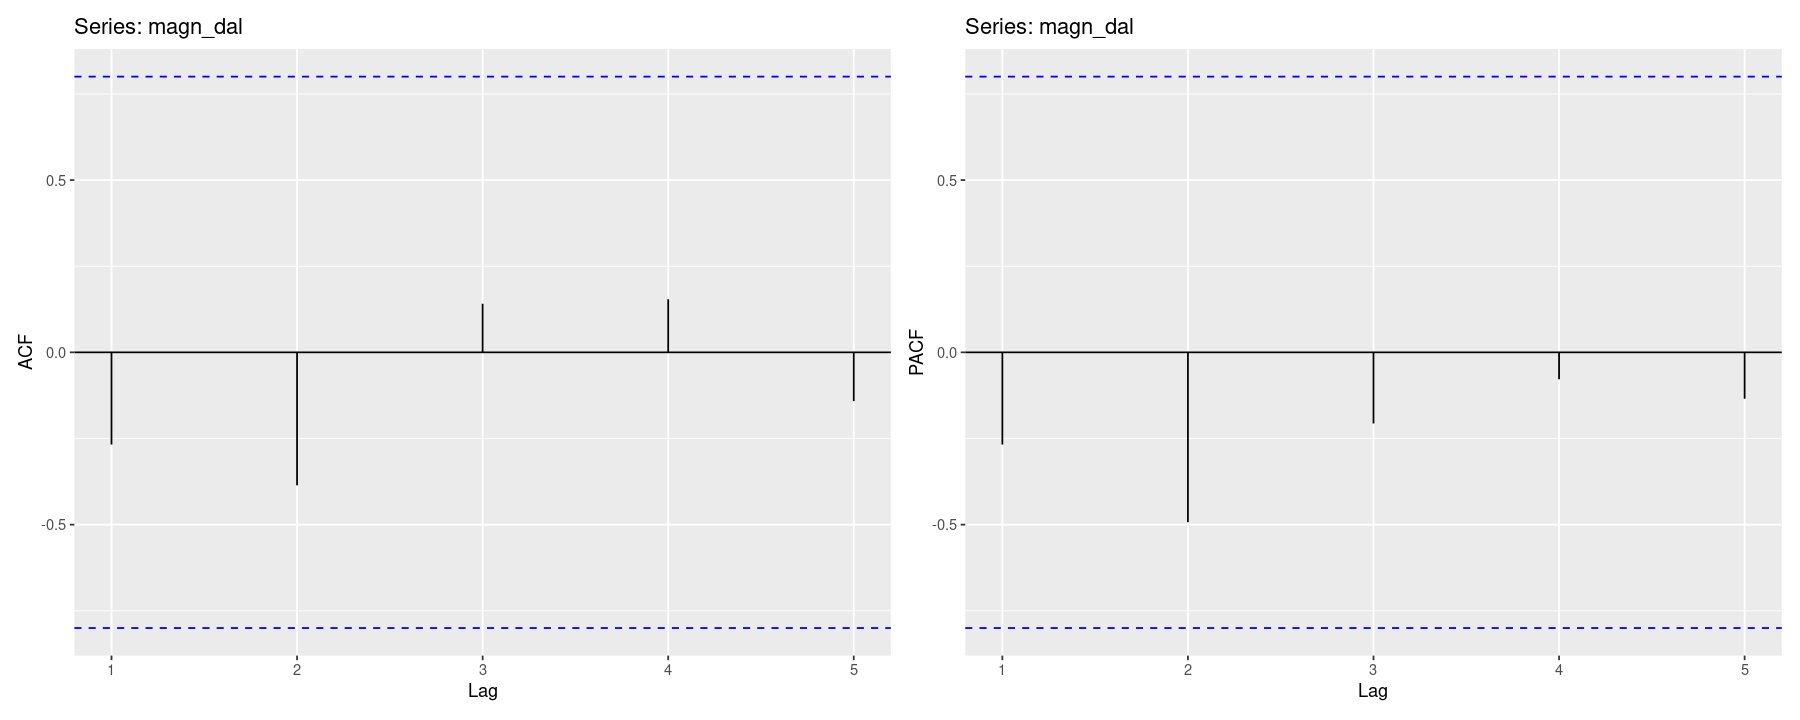

In [25]:
options(repr.plot.width = 15, repr.plot.height = 6)

gg1 <- ggAcf(magn_dal)
gg2 <- ggPacf(magn_dal)

gg1 + gg2

fit_auto <- auto.arima(magn_dal, seasonal=TRUE, lambda=0)
summary(fit_auto)

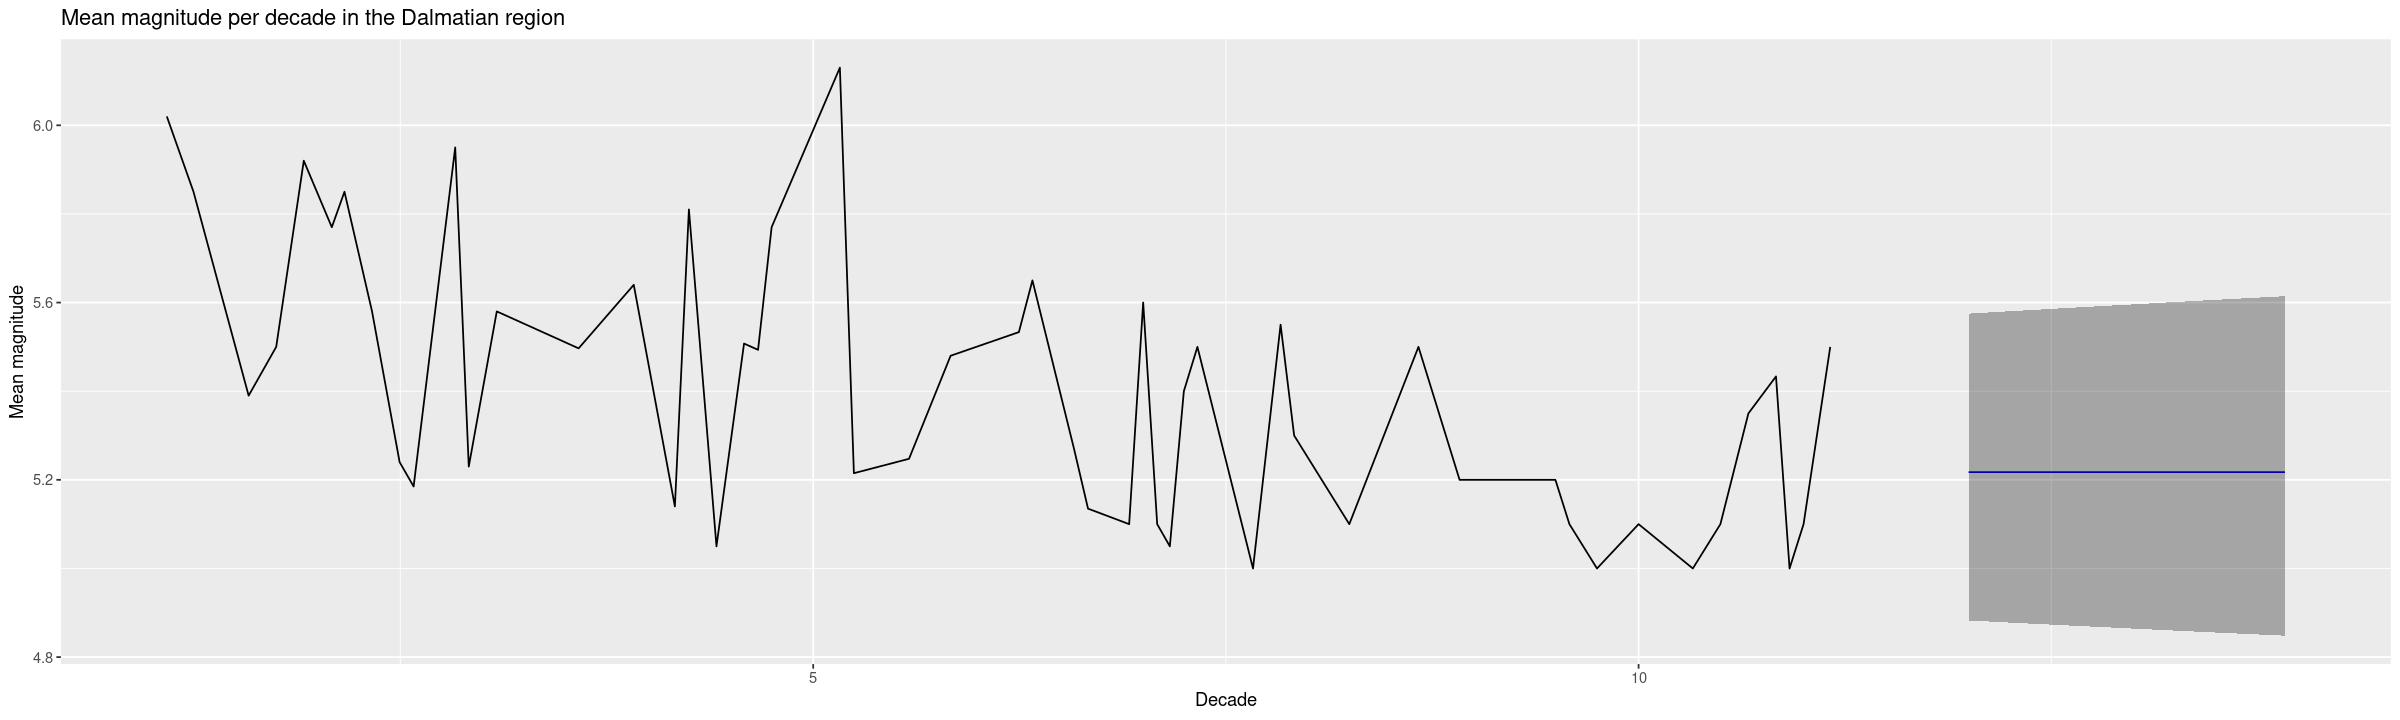


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 94.805, df = 23, p-value = 1.095e-10

Model df: 1.   Total lags used: 24



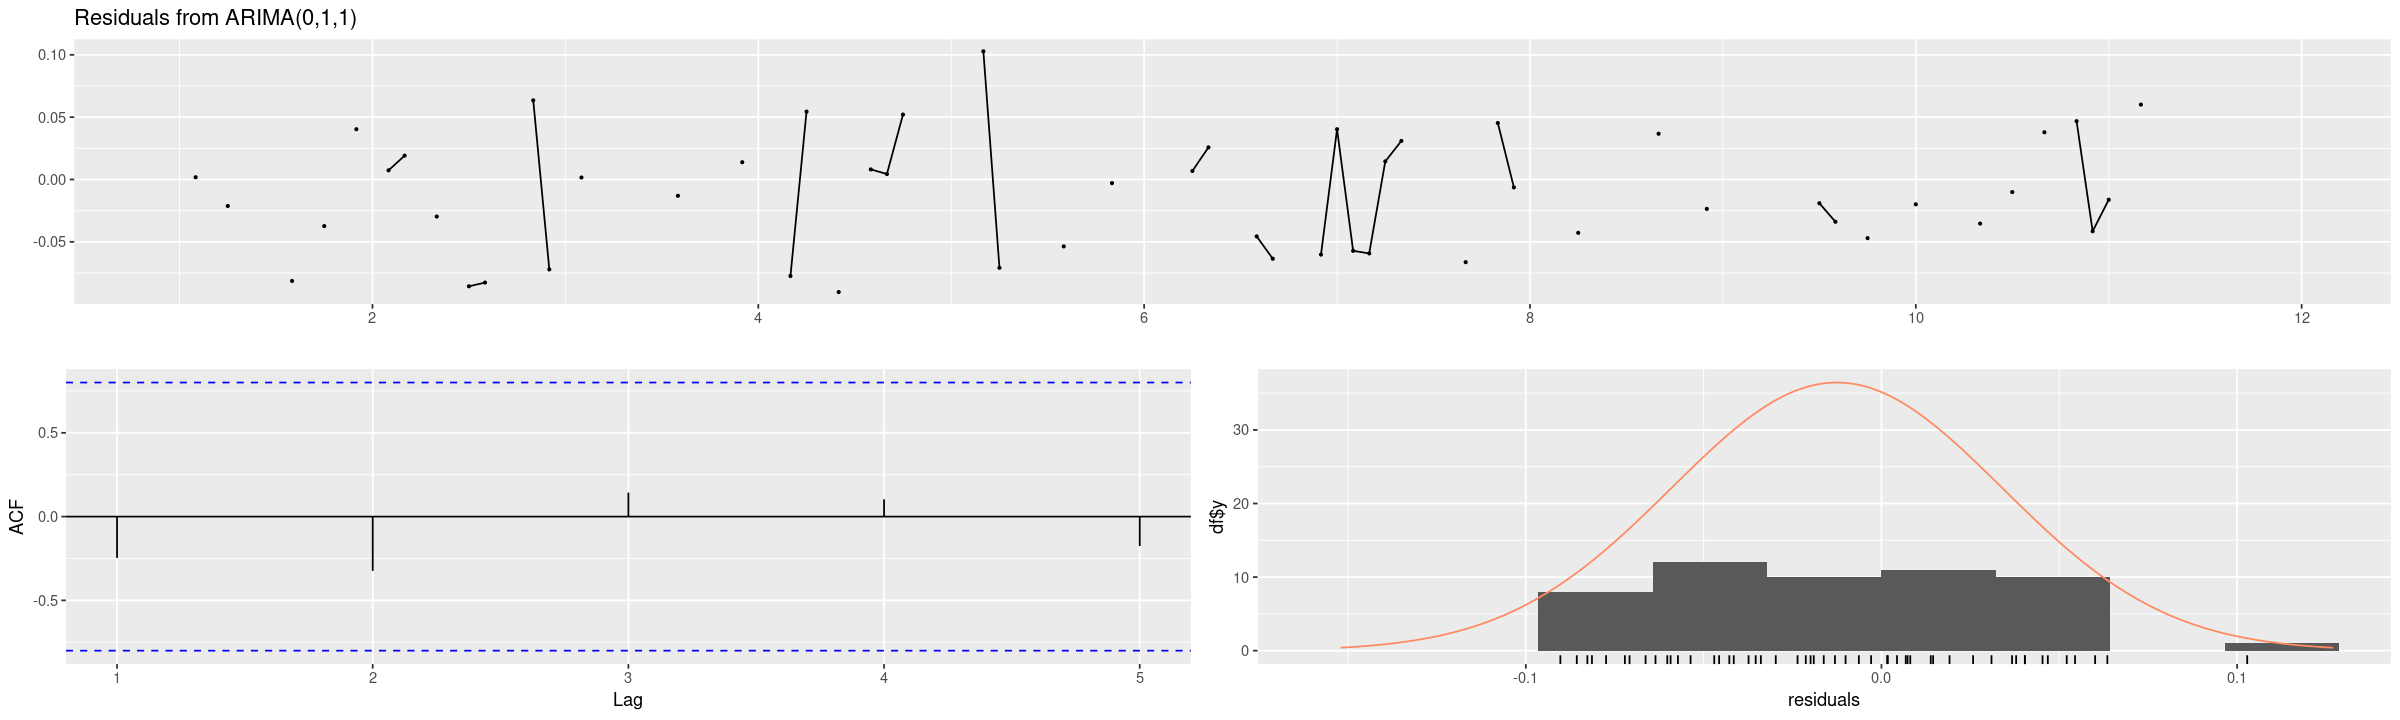

In [26]:
options(repr.plot.width = 20, repr.plot.height = 6)

magn_dal %>%
  Arima(order=c(0,1,1), seasonal=c(0,0,0), lambda=0) %>%
  forecast() %>%
  autoplot() +
    ylab("Mean magnitude") + xlab("Decade") + ggtitle("Mean magnitude per decade in the Dalmatian region")

model <- Arima(magn_dal, order=c(0,1,1), seasonal=c(0,0,0), lambda=0)
checkresiduals(model)

#### Regional forecasting analysis

In order to better exploit the power of the ARIMA forecasting method, we decided to restrict our analysis to specific regions. This choice was made because we observed that the whole dataset encompasses events happening in very different, possibly unrelated  geological environments. A predictive model that takes into account these differences is therefore needed.

##### Whole dataset

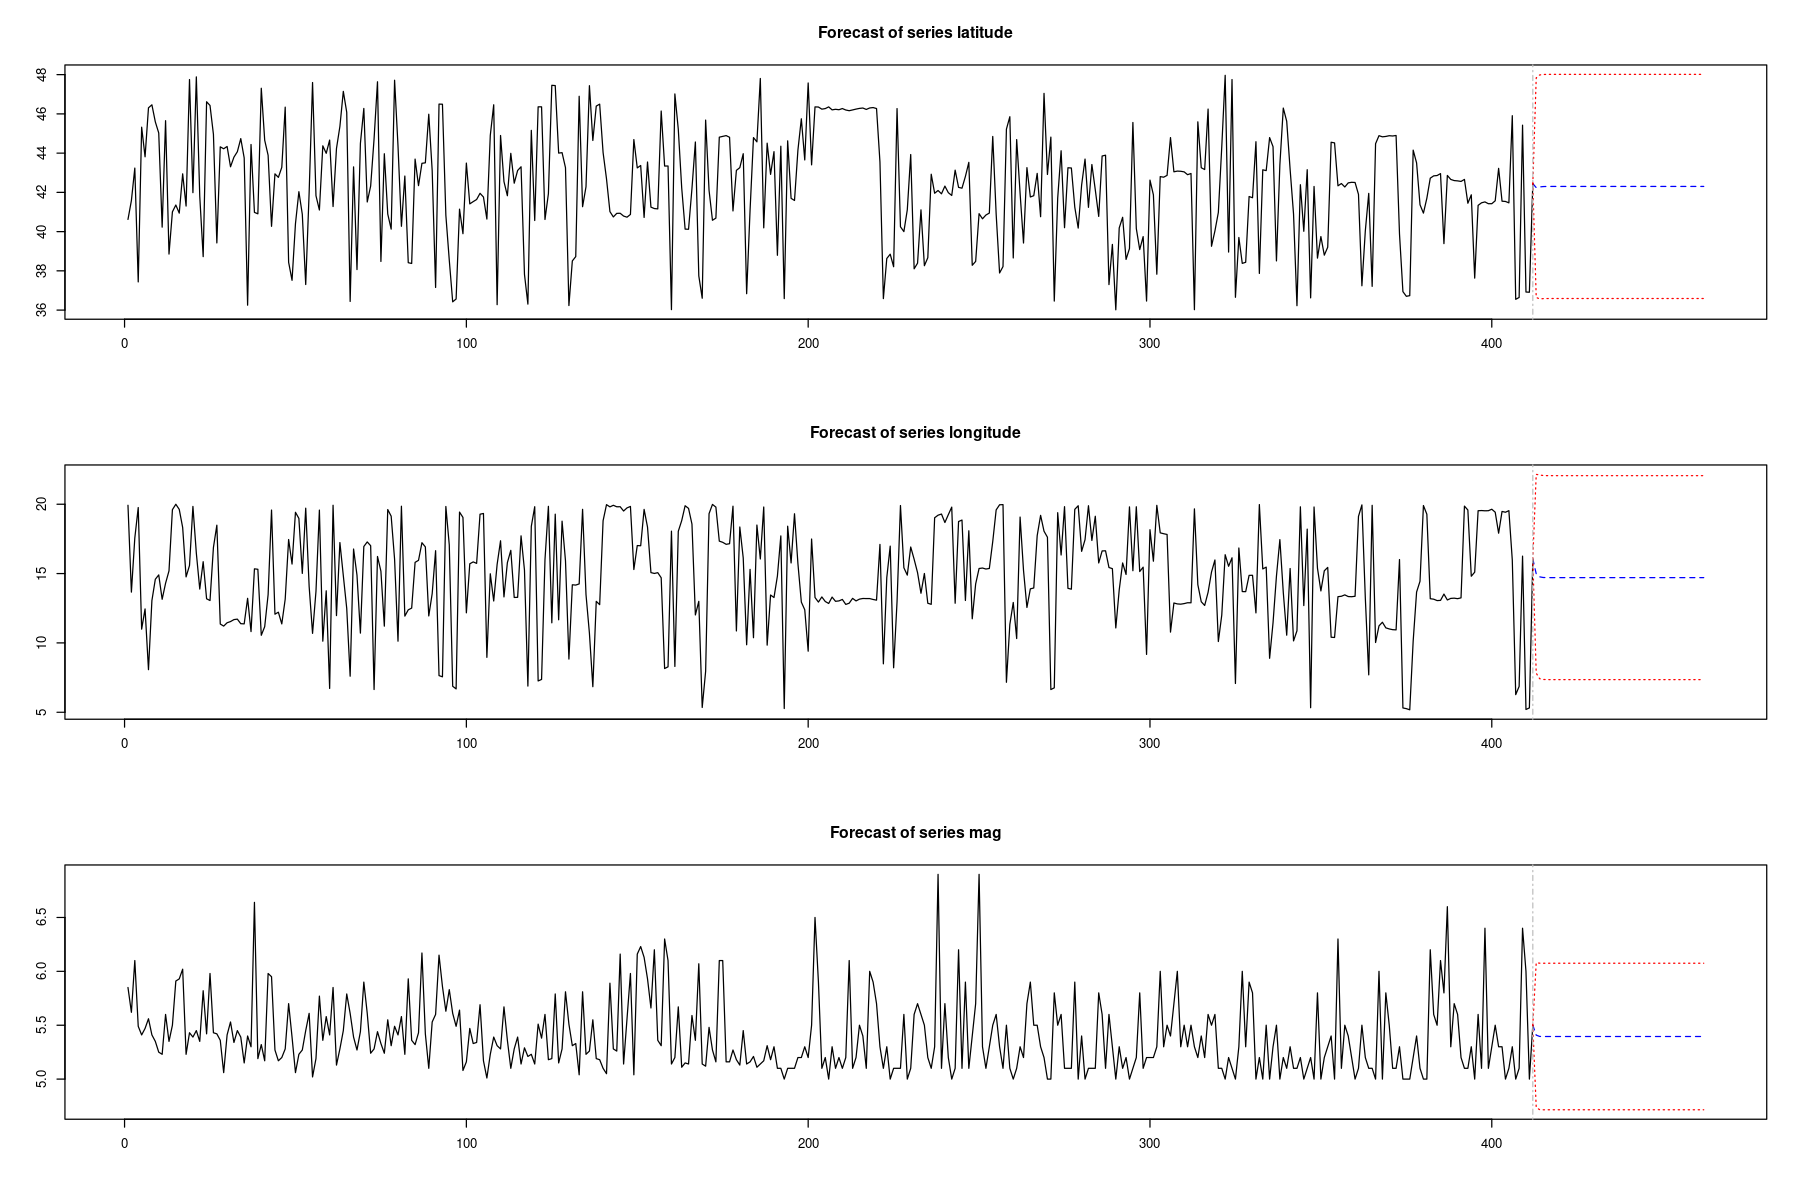

In [27]:
options(repr.plot.width = 15, repr.plot.height = 10)

time_series <- ts(df[, c("latitude", "longitude", "mag")])

# Determina il numero ottimale di lag per il modello
lag_select <- VARselect(time_series, lag.max = 23, type = "const")

# Costruisci il modello VAR con il numero di lag selezionato
var_model <- VAR(time_series, p = lag_select$selection[1], type = "const")

# Previsione per i prossimi n periodi
forecast_values <- predict(var_model, n.ahead = 50)

# Visualizza i risultati
#print(forecast_values)
plot(forecast_values)

In [28]:
predicted_values <- forecast_values$fcst

predicted_latitude <- predicted_values$latitude[, "fcst"]
predicted_longitude <- predicted_values$longitude[, "fcst"]
predicted_mag <- predicted_values$mag[, "fcst"]
#predicted_depth <- predicted_values$depth[, "fcst"]
predicted_depth <- rep(0, 10)

# Creare un dataframe con i valori predetti
depth_forecasting <- data.frame(
  latitude = predicted_latitude,
  longitude = predicted_longitude,
  depth = predicted_depth,
  mag = predicted_mag
)

# Visualizzare il dataframe creato
#print(depth_forecasting)

   latitude longitude depth      mag
1  42.24124  14.98498     0 5.408104
2  42.27643  14.76404     0 5.395942
3  42.29548  14.71827     0 5.395055
4  42.30095  14.70865     0 5.395195
5  42.30224  14.70658     0 5.395281
6  42.30252  14.70612     0 5.395307
7  42.30257  14.70602     0 5.395314
8  42.30259  14.70600     0 5.395316
9  42.30259  14.70599     0 5.395316
10 42.30259  14.70599     0 5.395316
11 42.30259  14.70599     0 5.395316
12 42.30259  14.70599     0 5.395316
13 42.30259  14.70599     0 5.395316
14 42.30259  14.70599     0 5.395316
15 42.30259  14.70599     0 5.395316
16 42.30259  14.70599     0 5.395316
17 42.30259  14.70599     0 5.395316
18 42.30259  14.70599     0 5.395316
19 42.30259  14.70599     0 5.395316
20 42.30259  14.70599     0 5.395316
21 42.30259  14.70599     0 5.395316
22 42.30259  14.70599     0 5.395316
23 42.30259  14.70599     0 5.395316
24 42.30259  14.70599     0 5.395316
25 42.30259  14.70599     0 5.395316
26 42.30259  14.70599     0 5.395316
2

In [73]:
plot_height <- 6
plot_width <- 13
options(repr.plot.width = plot_width, repr.plot.height = plot_height)

# Load the PNG image
bg_image <- readPNG("background.png")

# Get dimensions of the PNG image
img_width <- dim(bg_image)[2]  # Width in pixels
img_height <- dim(bg_image)[1]  # Height in pixels

# Calculate plot limits
x_range <- c(5, 20)
y_range <- c(36, 48)

# Adjust opacity (set alpha channel)
alpha_value <- 0.6  # Adjust as needed (0 = fully transparent, 1 = fully opaque)
bg_image_alpha <- bg_image
bg_image_alpha[,,4] <- bg_image[,,4] * alpha_value  # Modify alpha channel


plot_depth <- ggplot(df, aes(x = longitude, y = latitude, color = depth, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "plasma") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "depth (km)")

# Add the PNG background with adjusted opacity (alpha)
plot_depth2 <- plot_depth +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plot_time <- ggplot(df, aes(x = longitude, y = latitude, color = days_index/365.25 + 1921, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "viridis") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "year")

plot_time2 <- plot_time +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plots_2D <- plot_depth2 + plot_time2

# Modify the existing plots by adding points from the depth_forecasting dataframe
plot_depth_forecast <- plot_depth2 +
  geom_point(data = depth_forecasting, aes(x = longitude, y = latitude, size = mag),
             shape = 17, color = "black", alpha = 1)  # Star markers with black color

plot_time_forecast <- plot_time2 +
  geom_point(data = depth_forecasting, aes(x = longitude, y = latitude, size = mag),
             shape = 17, color = "black", alpha = 1)  # Star markers with black color

# Combine the updated plots
plots_2D_forecast <- plot_depth_forecast + plot_time_forecast

# Save the updated plots
#ggsave("Figures/plots_2D_forecast_1.png", plot = plots_2D_forecast, width = plot_width, height = plot_height, units = 'in')
#plots_2D_forecast

<img src="plots_2D_forecast_1.png" style="width: 100%; height: 100%;">
<!-- ![Hierarchical clustering result](Figures/clustering_evolution.gif) -->

##### Central Italy region

In [67]:
df2 <- df[df$longitude >= 12 & df$longitude <= 14 &
                  df$latitude >= 42 & df$latitude <= 43, ]
#print(df2)
time_series <- ts(df2[, c("latitude", "longitude", "mag")])

# Determina il numero ottimale di lag per il modello
lag_select <- VARselect(time_series, lag.max = 23, type = "const")

# Costruisci il modello VAR con il numero di lag selezionato
var_model <- VAR(time_series, p = lag_select$selection[1], type = "const")

# Previsione per i prossimi n periodi
forecast_values <- predict(var_model, n.ahead = 10)

# Visualizza i risultati
#print(forecast_values)

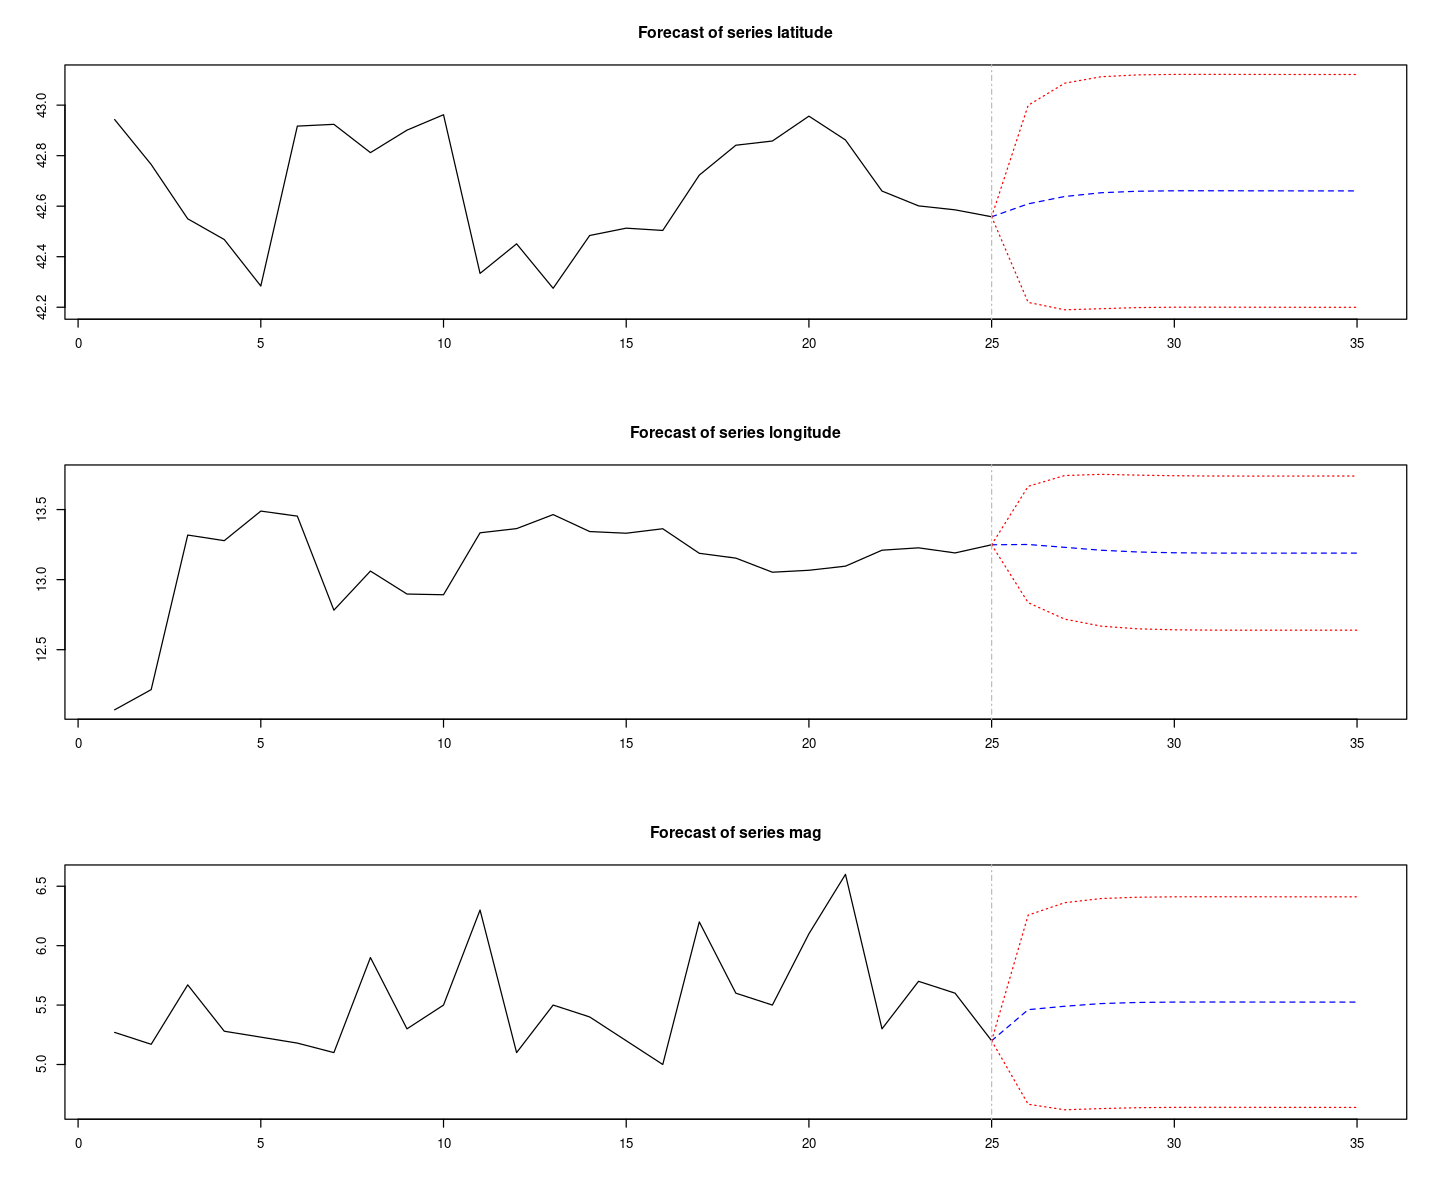

In [31]:
options(repr.plot.width = 12, repr.plot.height = 10)
plot(forecast_values)

In [68]:
predicted_values <- forecast_values$fcst

predicted_latitude <- predicted_values$latitude[, "fcst"]
predicted_longitude <- predicted_values$longitude[, "fcst"]
predicted_mag <- predicted_values$mag[, "fcst"]
#predicted_depth <- predicted_values$depth[, "fcst"]
predicted_depth <- rep(0, 10)

# Creare un dataframe con i valori predetti
depth_forecasting <- data.frame(
  latitude = predicted_latitude,
  longitude = predicted_longitude,
  depth = predicted_depth,
  mag = predicted_mag
)

# Visualizzare il dataframe creato
print(depth_forecasting)

   latitude longitude depth      mag
1  42.60923  13.25062     0 5.461377
2  42.63837  13.23035     0 5.490108
3  42.65330  13.20953     0 5.512776
4  42.65923  13.19718     0 5.522096
5  42.66093  13.19150     0 5.525113
6  42.66109  13.18946     0 5.525619
7  42.66086  13.18899     0 5.525408
8  42.66065  13.18903     0 5.525134
9  42.66053  13.18916     0 5.524957
10 42.66047  13.18925     0 5.524871


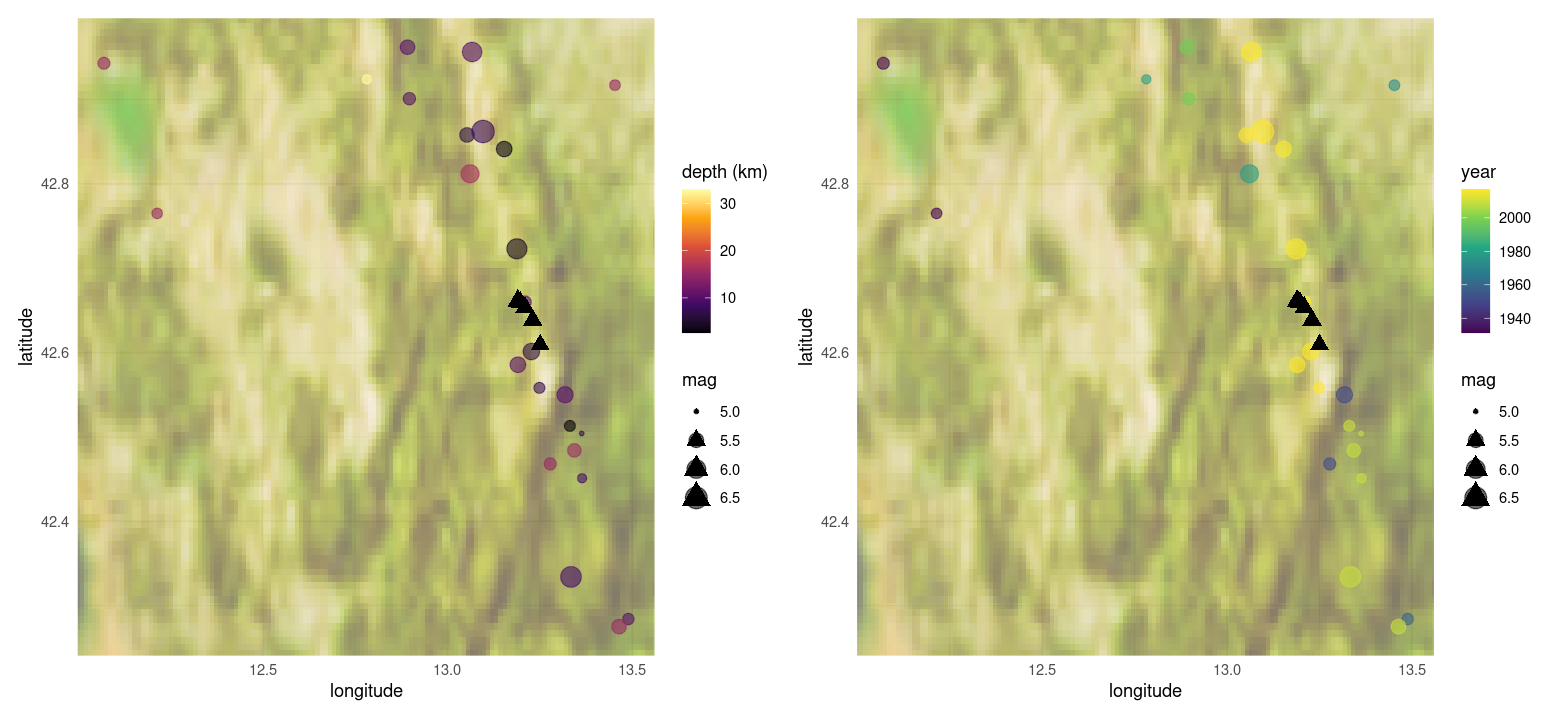

In [69]:
plot_height <- 6
plot_width <- 13
options(repr.plot.width = plot_width, repr.plot.height = plot_height)

# Load the PNG image
bg_image <- readPNG("background.png")

# Get dimensions of the PNG image
img_width <- dim(bg_image)[2]  # Width in pixels
img_height <- dim(bg_image)[1]  # Height in pixels

# Calculate plot limits
x_range <- c(5, 20)
y_range <- c(36, 48)

# Adjust opacity (set alpha channel)
alpha_value <- 0.6  # Adjust as needed (0 = fully transparent, 1 = fully opaque)
bg_image_alpha <- bg_image
bg_image_alpha[,,4] <- bg_image[,,4] * alpha_value  # Modify alpha channel


plot_depth <- ggplot(df2, aes(x = longitude, y = latitude, color = depth, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "inferno") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "depth (km)")

# Add the PNG background with adjusted opacity (alpha)
plot_depth2 <- plot_depth +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plot_time <- ggplot(df2, aes(x = longitude, y = latitude, color = days_index/365.25 + 1921, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "viridis") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "year")

plot_time2 <- plot_time +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

# Modify the existing plots by adding points from the depth_forecasting dataframe
plot_depth_forecast <- plot_depth2 +
  geom_point(data = depth_forecasting, aes(x = longitude, y = latitude, size = mag),
             shape = 17, color = "black", alpha = 1)  # Star markers with black color

plot_time_forecast <- plot_time2 +
  geom_point(data = depth_forecasting, aes(x = longitude, y = latitude, size = mag),
             shape = 17, color = "black", alpha = 1)  # Star markers with black color

# Combine the updated plots
plots_2D_forecast <- plot_depth_forecast + plot_time_forecast

# Save the updated plots
#ggsave("Figures/plots_2D_forecast.png", plot = plots_2D_forecast, width = plot_width, height = plot_height, units = 'in')
plots_2D_forecast

##### Dalmatian region

In [35]:
time_series_dal <- ts(df_dal[, c("latitude", "longitude", "mag")])

# Determina il numero ottimale di lag per il modello
lag_select <- VARselect(time_series_dal, lag.max = 15, type = "const")

# Costruisci il modello VAR con il numero di lag selezionato
var_model <- VAR(time_series_dal, p = lag_select$selection[1], type = "const")

# Previsione per i prossimi n periodi
forecast_values <- predict(var_model, n.ahead = 10)
predicted_values <- forecast_values$fcst

# Visualizza i risultati
#print(forecast_values)

$latitude
          fcst    lower    upper       CI
 [1,] 42.11187 40.56097 43.66277 1.550900
 [2,] 41.57812 39.97832 43.17793 1.599805
 [3,] 41.48064 39.87982 43.08146 1.600823
 [4,] 41.47308 39.87222 43.07394 1.600858
 [5,] 41.47525 39.87439 43.07611 1.600860
 [6,] 41.47608 39.87522 43.07694 1.600861
 [7,] 41.47621 39.87535 43.07707 1.600861
 [8,] 41.47621 39.87535 43.07707 1.600861
 [9,] 41.47621 39.87535 43.07707 1.600861
[10,] 41.47621 39.87535 43.07707 1.600861

$longitude
          fcst    lower    upper       CI
 [1,] 18.94528 17.22127 20.66928 1.724009
 [2,] 19.26544 17.52340 21.00748 1.742041
 [3,] 19.25443 17.51137 20.99749 1.743061
 [4,] 19.23699 17.49388 20.98011 1.743118
 [5,] 19.23309 17.48997 20.97621 1.743119
 [6,] 19.23273 17.48961 20.97585 1.743119
 [7,] 19.23279 17.48967 20.97591 1.743119
 [8,] 19.23282 17.48970 20.97594 1.743119
 [9,] 19.23283 17.48971 20.97595 1.743119
[10,] 19.23283 17.48971 20.97595 1.743119

$mag
          fcst    lower    upper        CI
 [1,]

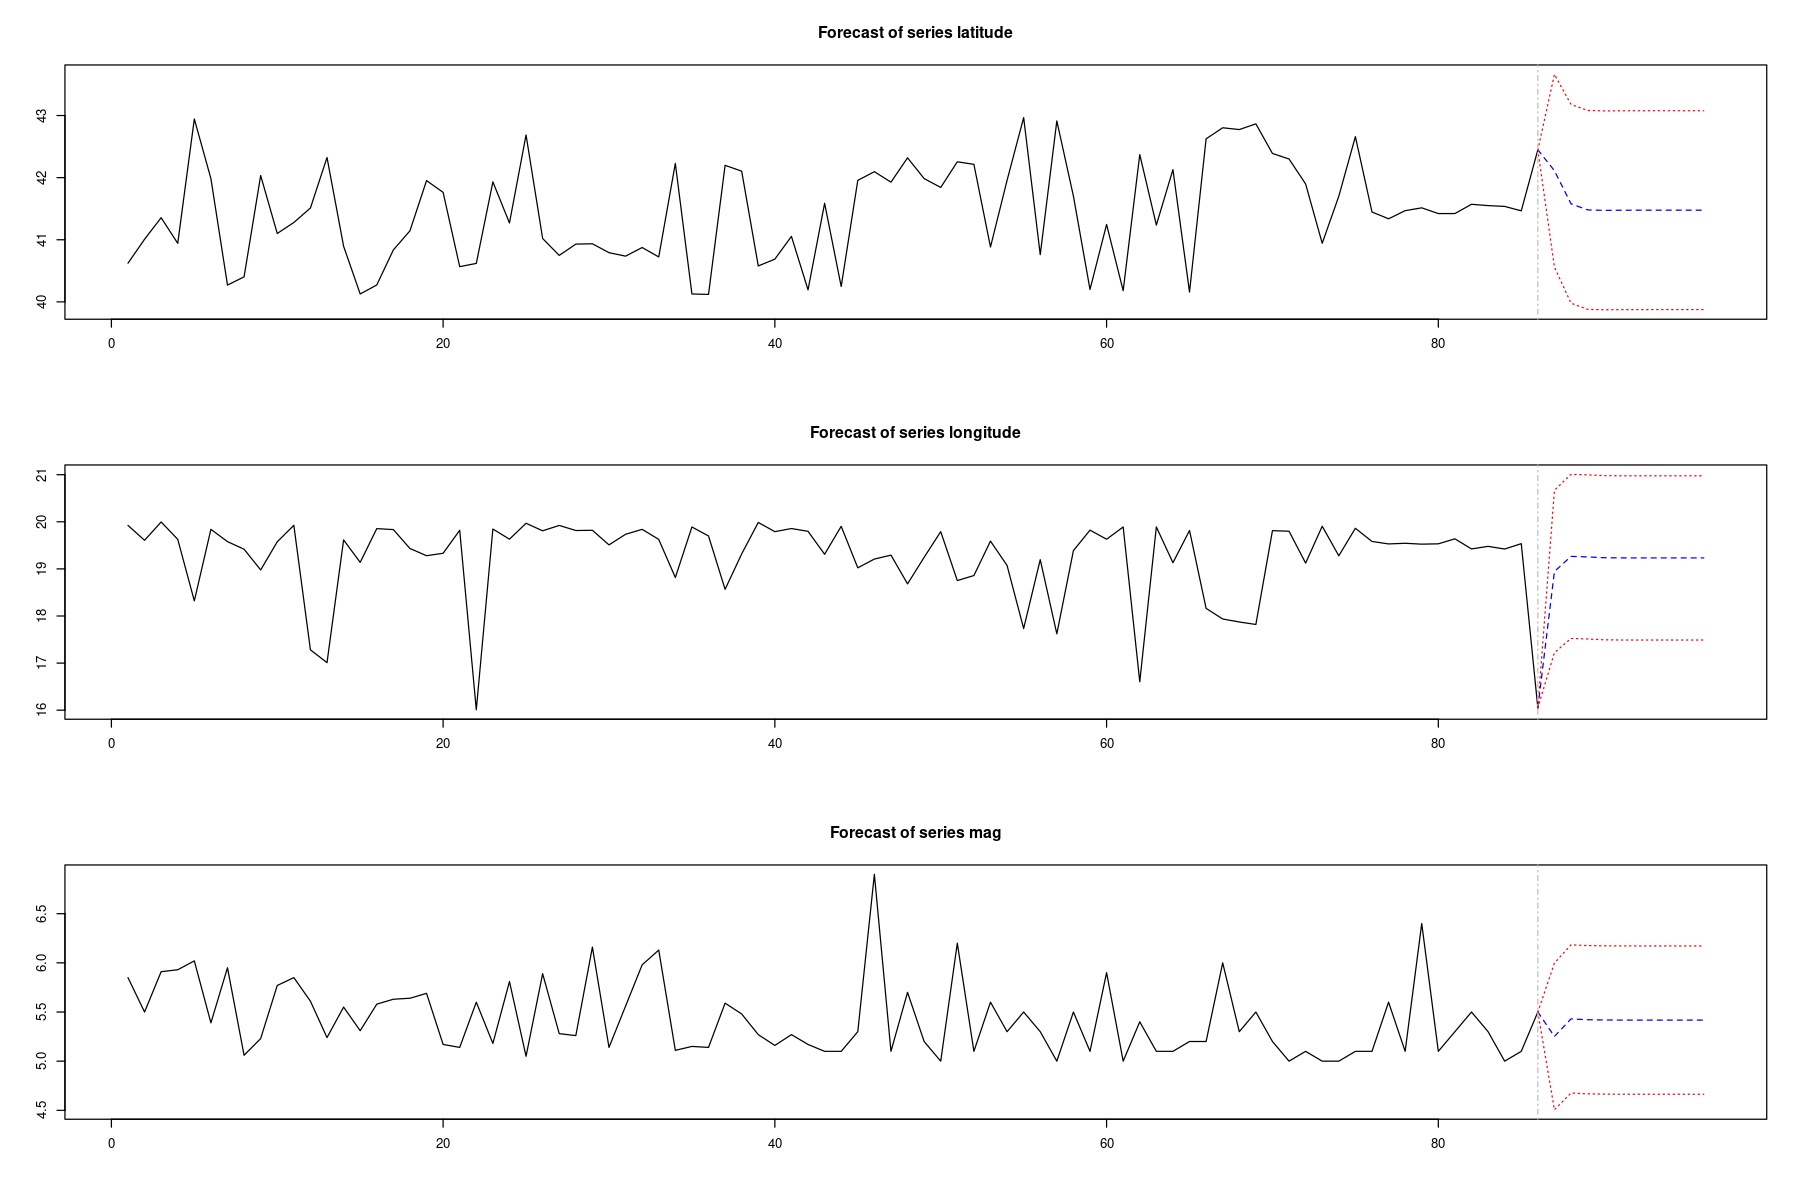

In [36]:
options(repr.plot.width = 15, repr.plot.height = 10)
plot(forecast_values)

In [37]:
predicted_latitude <- predicted_values$latitude[, "fcst"]
predicted_longitude <- predicted_values$longitude[, "fcst"]
predicted_mag <- predicted_values$mag[, "fcst"]
#predicted_depth <- predicted_values$depth[, "fcst"]
predicted_depth <- rep(0, 10)

# Creare un dataframe con i valori predetti
depth_forecasting <- data.frame(
  latitude = predicted_latitude,
  longitude = predicted_longitude,
  depth = predicted_depth,
  mag = predicted_mag
)

# Visualizzare il dataframe creato
print(depth_forecasting)

   latitude longitude depth      mag
1  42.11187  18.94528     0 5.251460
2  41.57812  19.26544     0 5.430033
3  41.48064  19.25443     0 5.421328
4  41.47308  19.23699     0 5.418961
5  41.47525  19.23309     0 5.417951
6  41.47608  19.23273     0 5.417858
7  41.47621  19.23279     0 5.417865
8  41.47621  19.23282     0 5.417872
9  41.47621  19.23283     0 5.417873
10 41.47621  19.23283     0 5.417873


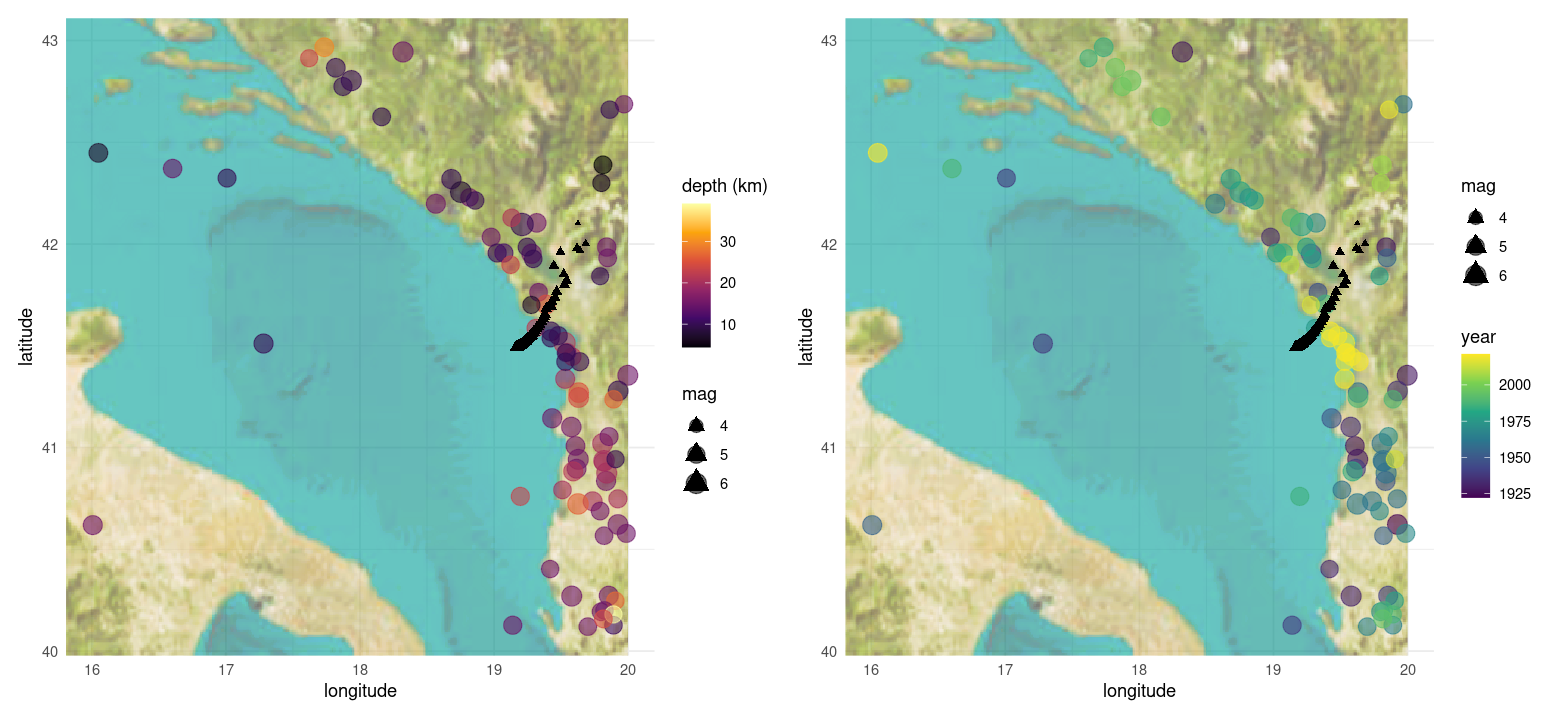

In [65]:
plot_height <- 6
plot_width <- 13
options(repr.plot.width = plot_width, repr.plot.height = plot_height)

# Load the PNG image
bg_image <- readPNG("background.png")

# Get dimensions of the PNG image
img_width <- dim(bg_image)[2]  # Width in pixels
img_height <- dim(bg_image)[1]  # Height in pixels

# Calculate plot limits
x_range <- c(5, 20)
y_range <- c(36, 48)

# Adjust opacity (set alpha channel)
alpha_value <- 0.6  # Adjust as needed (0 = fully transparent, 1 = fully opaque)
bg_image_alpha <- bg_image
bg_image_alpha[,,4] <- bg_image[,,4] * alpha_value  # Modify alpha channel


plot_depth <- ggplot(df_dal, aes(x = longitude, y = latitude, color = depth, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "inferno") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "depth (km)")

# Add the PNG background with adjusted opacity (alpha)
plot_depth2 <- plot_depth +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plot_time <- ggplot(df_dal, aes(x = longitude, y = latitude, color = days_index/365.25 + 1921, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "viridis") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "year")

plot_time2 <- plot_time +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

## Modify the existing plots by adding points from the depth_forecasting dataframe
plot_depth_forecast <- plot_depth2 +
  geom_point(data = depth_forecasting, aes(x = longitude, y = latitude, size = mag),
             shape = 17, color = "black", alpha = 1)  # Star markers with black color

plot_time_forecast <- plot_time2 +
  geom_point(data = depth_forecasting, aes(x = longitude, y = latitude, size = mag),
             shape = 17, color = "black", alpha = 1)  # Star markers with black color

# Combine the updated plots
plots_2D_forecast <- plot_depth_forecast + plot_time_forecast

# Save the updated plots
#ggsave("Figures/plots_2D_forecast.png", plot = plots_2D_forecast, width = plot_width, height = plot_height, units = 'in')
plots_2D_forecast

### Hierarchical Cluster Analysis on Space/Time Data

Hierarchical clustering is used to uncover the underlying structure within the data. To begin, we first extract the *X*, *Y*, *Z* and *time* variables from the dataframe. This subset of data will serve as the foundation for our clustering analysis.

In [40]:
# Extracting only the x, y, z infos from the dataframe
data_matrix <- as.matrix(df[, c("x", "y", 'z')])

**Dendrograms** can be constructed to better visualize the internal connections on the data and the structure.

A dendrogram is a tree-like diagram that illustrates the arrangement of clusters produced by hierarchical clustering. It is used to display how individual data points or groups are related to each other based on similarity or distance metrics.

In simple terms, dendrograms are visual representations of data clustering. They are commonly used in hierarchical clustering, where data is grouped at different levels of granularity. The tree-like structure starts from individual data points at the bottom (leaves) and progressively merges them into larger clusters while moving upwards, until all the points are part of a single group.

Dendrograms help in understanding the underlying structure of data and identifying natural groupings or clusters. For seismic events (such as earthquakes), dendrograms can reveal patterns or similarities between seismic activities based on attributes like magnitude, location, or depth. 

By visualizing how these seismic events cluster over time, we can gain insights into recurring patterns or regions of high seismic activity. For example, dendrograms can help identify seismic events that are closely related due to occurring in the same geographical area or having similar magnitudes, making them a valuable tool for analyzing long-term seismic trends over the past century.

#### Interpreting Dendrograms

- **Branches**: The lines in the dendrogram represent clusters of data points. The length of the branches reflects the distance or dissimilarity between clusters. Shorter branches indicate more similar clusters.
- **Height**: The height at which two clusters are merged shows how similar they are. Clusters that merge at lower heights are more similar than those that merge at higher heights.

In this analysis, we use dendrograms to investigate relationships between seismic events from the last 100 years, allowing us to explore patterns and similarities that could provide deeper insights into seismic activity over time.




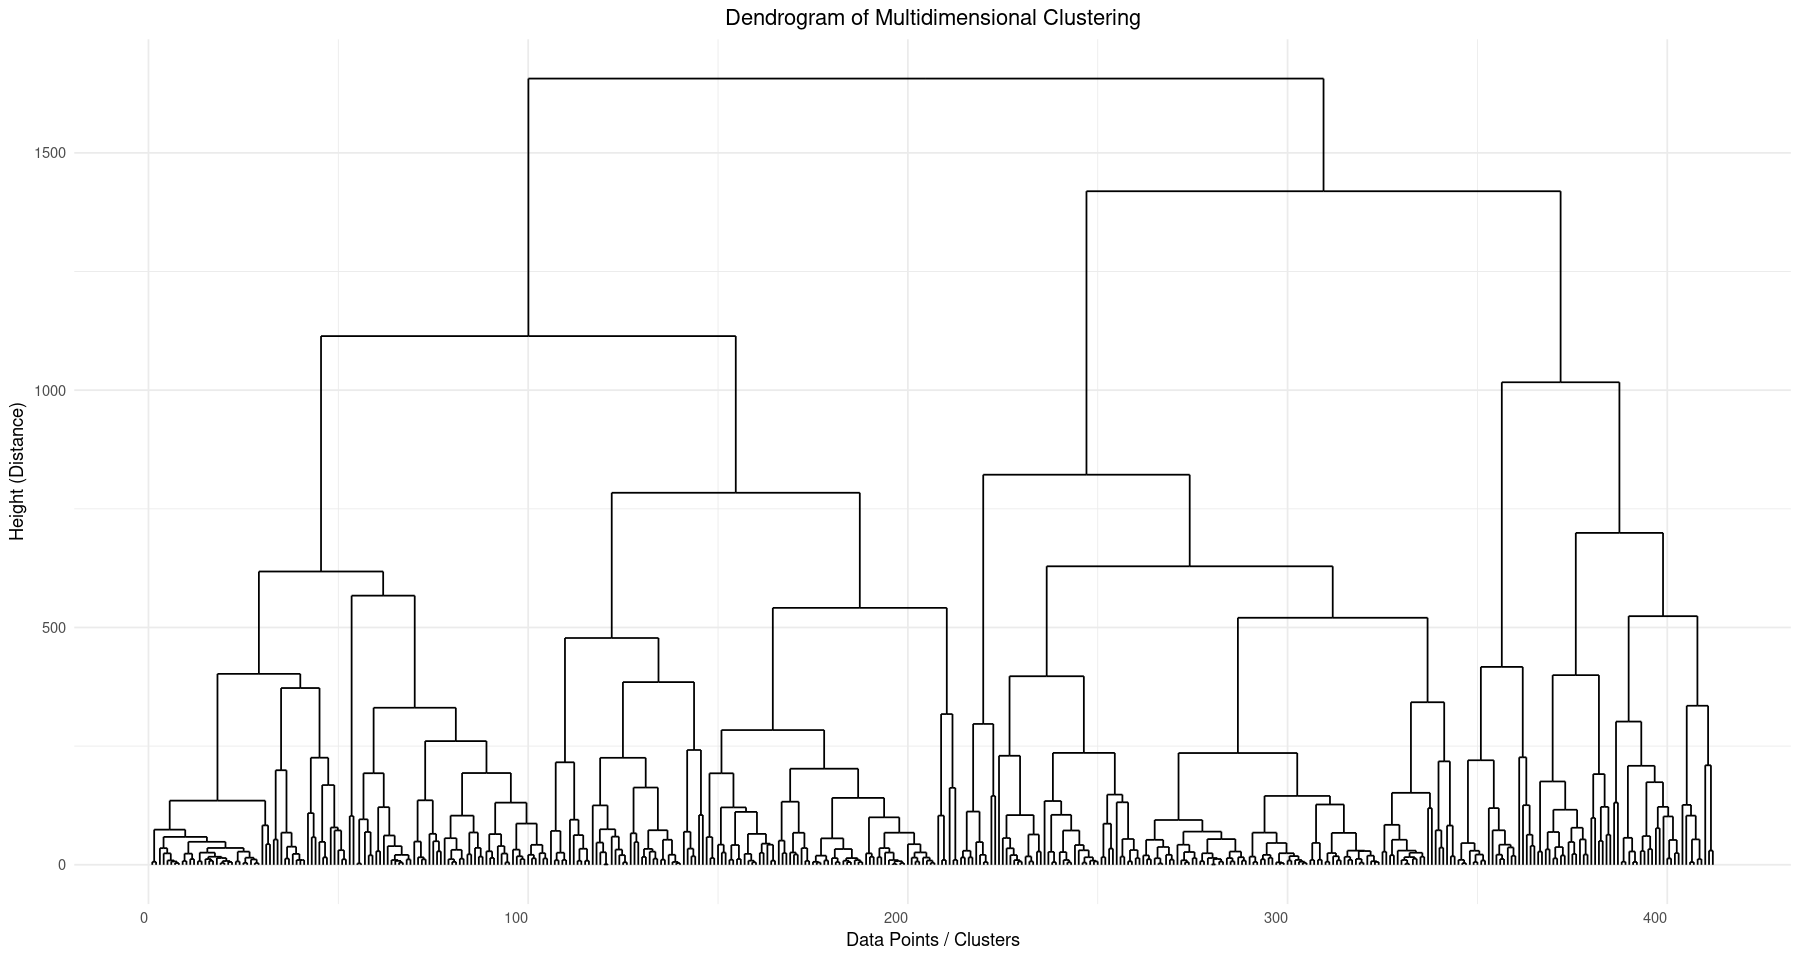

In [41]:
dend <- as.dendrogram(hclust(dist(data_matrix)))
dend_data <- dendro_data(dend)

# Defining shape ad height for the plot 
plot_height <- 8
plot_width <- 15
options(repr.plot.width = plot_width, repr.plot.height = plot_height)

# Plotting the dendrogram
dend_plot <- ggplot() +
  geom_segment(data = dend_data$segments, aes(x = x, y = y, xend = xend, yend = yend)) +
  ggtitle("Dendrogram of Multidimensional Clustering") +
  labs(x = "Data Points / Clusters", y = "Height (Distance)") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle = 0, hjust = 1))

dend_plot

Before proceiding with the hierachical clustering, it should be interesting to find which is the best number of clusters employed using the so called **Silhouette Analysis**:
it measures how similar each data point is to its own cluster compared to other clusters. An higher average silhouette width indicates a better clustering.

Another method that can be introduced is the **Elbow Method**: it involves plotting the total within-cluster sum of squares **(WCSS)** against the number of clusters and looking for an "elbow" point where the rate of decrease sharply changes. This point is often considered the optimal number of clusters.

The $WCSS$ is defined as:

$ WCSS = \sum_{k=1}^K \sum_{x \in C_k} || x - \mu_k ||^2 $

where *$K$* is the number of clusters, *$C_k$* is the cluster related to index *$k$* and $\mu_k$ is the centroid of cluster *$C_k$*. The $WCSS$ is actually describing the relation of the points in the cluster with respect to the centroid of the cluster.

How is it possible to observe from both methods, the optimal number of clusters for this problem is approximately **3 - 4**.

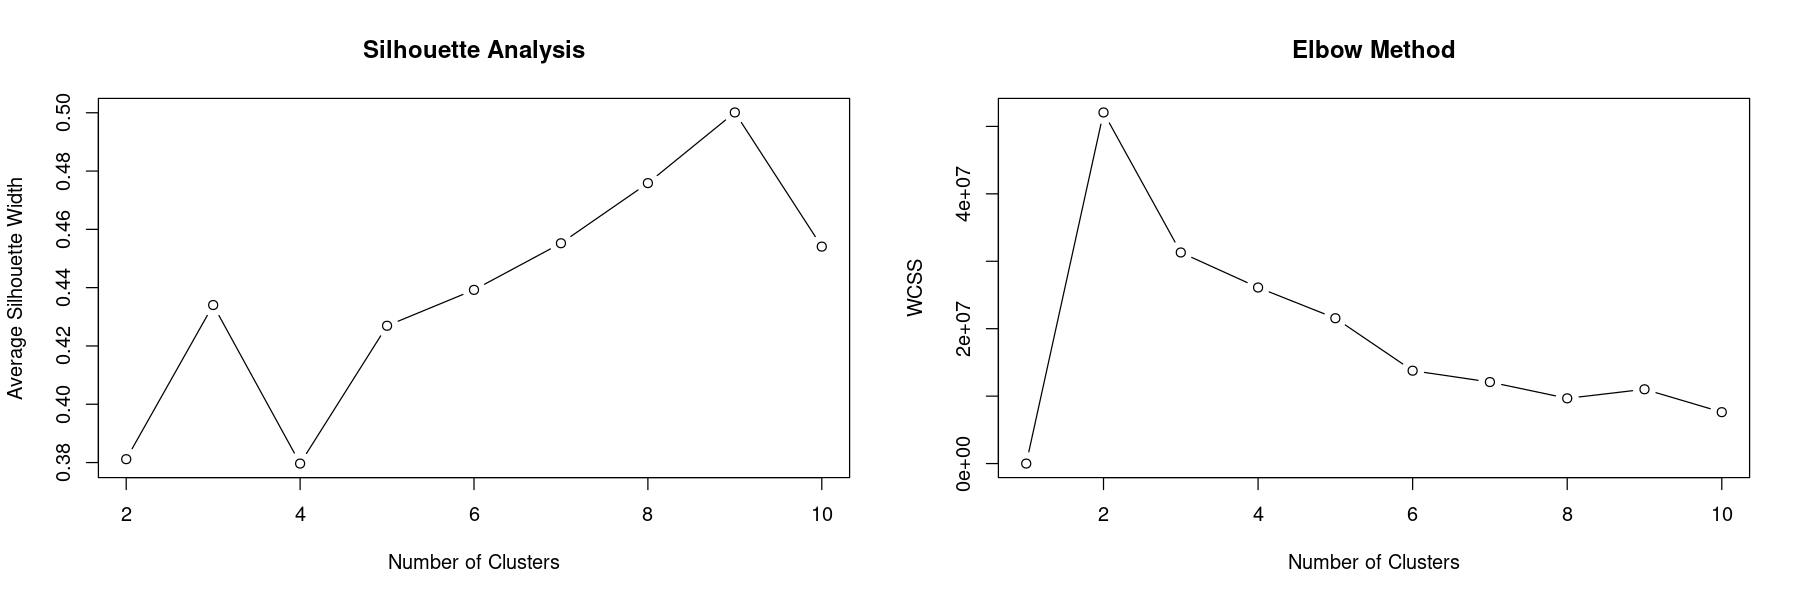

In [42]:
# Initialiting vectors to store the silhouette and wcss values 
silhouette_scores <- numeric(10)
wcss <- numeric(10)  


for (k in 2:10) {
    kmeans_result_ss <- kmeans(data_matrix, centers = k)
    kmeans_result_wcss <- kmeans(data_matrix, centers = k)
    
    clusters <- kmeans_result_ss$cluster
    silhouette_scores[k] <- mean(silhouette(clusters, dist(data_matrix))[, 3])

    wcss[k] <- kmeans_result_wcss$tot.withinss
}

# Plot silhouette scores
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow = c(1, 2))

plot(2:10, silhouette_scores[2:10], type = "b", xlab = "Number of Clusters", ylab = "Average Silhouette Width", main = "Silhouette Analysis")
plot(1:10, wcss, type = "b", xlab = "Number of Clusters", ylab = "WCSS", main = "Elbow Method")

par(mfrow = c(1, 1))

Here, the `kmeans` package can be used in order to perform a hierarchical clustering of the data points.

In order to clusterize the elements taking into account also the timing information, we can subdivide the dataset into different timing frames and clusterize the data in this way.

In [74]:
options(repr.plot.width=10, repr.plot.height=9)
num_clusters <- 4

# Subdividing now into timing intervals, for example 3650 days 
df$year_numeric <- as.numeric(format(df$time_posix, "%Y"))

min_days <- min(df$year_numeric)
max_days <- max(df$year_numeric)

n_frames <- floor((max_days - min_days) / 6)

# Spatial information for the plot 
global_x_range <- range(df$longitude, na.rm = TRUE)
global_y_range <- range(df$latitude, na.rm = TRUE)

time_intervals <- seq(min_days, max_days, by = n_frames)

plot_files <- list()
plot_width <- 9
plot_height <- 10

for (i in 1:(length(time_intervals) - 1)) {
    # Subset data for the current time interval
    subset_data <- subset(df, year >= time_intervals[i] & year < time_intervals[i + 1])
    dist_matrix <- dist(subset_data[, c("x", "y", 'z')])
    
    # Perform K-means clustering
    kmeans_result <- kmeans(subset_data[, c("x", "y", 'z')], centers = num_clusters)
    centroids <- as.data.frame(kmeans_result$centers)
    R <- 6371.0
    centroids_coord <- data.frame(lon = atan2(centroids$y, centroids$x) * (180 / pi), lat = atan2(centroids$z, sqrt(centroids$x^2 + centroids$y^2)) * (180 / pi), depth = R - sqrt(centroids$x^2 + centroids$y^2 + centroids$z^2))
    centroids_coord$cluster <- as.factor(1:num_clusters)  # Add a cluster identifier for plotting
    
    # Create plot
    plot_file <- paste0("Figures/plot_", i, ".png")
    plot_files <- c(plot_files, plot_file)
    
    p <- ggplot(subset_data, aes(x = longitude, y = latitude, size=mag)) +
        annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
        geom_point(aes(color = as.factor(kmeans_result$cluster)), alpha = 0.9) + 
        geom_point(data = centroids_coord, aes(x = centroids_coord[, "lon"], y = centroids_coord[, "lat"], color = cluster), 
                   size = 5, shape = 8, stroke = 2) +
        scale_color_manual(values = c("1" = "blue3", "2" = "black", "3" = "maroon", "4" = "purple3", "5" = "gold2"), name = "Cluster") +
        labs(title = paste("K-means Clustering from", time_intervals[i], "to", time_intervals[i + 1]),
             x = "Longitude", y = "Latitude") +
        theme_minimal() +
        theme(legend.position = "right", plot.background = element_rect(fill = "transparent", color = NA))+
    # Imposta limiti fissi per gli assi per garantire margini costanti
    xlim(min(x_range), max(x_range)) + 
    ylim(min(y_range), max(y_range))

    
    ggsave(filename = plot_file, plot = p, width = plot_width, height = plot_height)
}

#p

In [75]:
# Gif creation 
gif_file <- "Figures/clustering_evolution.gif"

# Resizing the image because it's giving an error on cache memory 
image_files_resized <- lapply(plot_files, function(file) {
    image_read(file) %>%
    image_resize("1000x1000")  # Resize both width and height proportionally
})

gif <- image_animate(image_join(image_files_resized), fps = 0.5)
# with fps = 0.5 each frame is shown for 2 seconds 

# Write the GIF to file in order to save it 
image_write(gif, gif_file)

# Warnings to see if the gif is actually being created 
if (file.exists(gif_file)) {
    cat("GIF created successfully at:", gif_file, "\n")
} else {
    cat("Failed to create GIF.\n")
}


for (file in plot_files) {
    if (file.exists(file)) {
        file.remove(file)
        cat("Removed:", file, "\n")
    } else {
        cat("File not found:", file, "\n")
    }
}

GIF created successfully at: Figures/clustering_evolution.gif 
Removed: Figures/plot_1.png 
Removed: Figures/plot_2.png 
Removed: Figures/plot_3.png 
Removed: Figures/plot_4.png 
Removed: Figures/plot_5.png 
Removed: Figures/plot_6.png 


<img src="clustering_evolution.gif" style="width: 100%; height: 100%;">
<!-- ![Hierarchical clustering result](Figures/clustering_evolution.gif) -->

### Supplementary analysis with extended dataset

In [45]:
df_extended <- read.csv('query_extended.csv', header = TRUE, sep = ",")

## Column of time with POSIX format
df_extended$time_posix <- as.POSIXct(df_extended$time, format = "%Y-%m-%dT%H:%M:%OS")

## Column of the year
df_extended$year <- as.numeric(format(df_extended$time_posix, '%Y'))

## Column of the month
df_extended$month <- as.numeric(format(df_extended$time_posix, '%m'))

## Column of the number of days from 01/01/1921
df_extended$days_index <- as.numeric(as.Date(df_extended$time) - as.Date("1921-01-01"), units = "days")

convert_coordinates <- function(df) {
  # Earth's radius in meters
  R <- 6371
  
  # Calculate (x, y, z) coordinates assuming the Earth is a perfect sphere
  r <- -df$depth + R
  x <- r * cos(df$latitude * pi / 180) * cos(df$longitude * pi / 180)
  y <- r * cos(df$latitude * pi / 180) * sin(df$longitude * pi / 180)
  z <- r * sin(df$latitude * pi / 180)
  
  # Return a dataframe with x and y coordinates
  df$x <- x
  df$y <- y 
  df$z <- z

  return(df)
}

df_extended <- convert_coordinates(df_extended)
#df_extended

time                     latitude longitude depth  mag  magType nst gap
1     2021-12-28T19:25:15.758Z 36.7381   6.8615    11.57 4.3  mb      NA   90
2     2021-12-24T23:59:55.857Z 47.3748   6.8239     9.23 4.1  mb      NA   88
3     2021-12-23T21:33:44.421Z 37.3584  15.0589    10.00 4.3  mb      NA   87
4     2021-12-18T10:34:47.765Z 45.6559   9.5873    37.73 4.5  mb      NA   56
5     2021-12-01T22:44:13.996Z 38.5721  14.9730   225.42 4.4  mb      NA   77
6     2021-11-28T02:52:34.197Z 38.6587  14.3447    10.00 4.5  mb      NA   56
7     2021-11-17T23:19:44.618Z 42.4628  15.8428    16.90 4.2  mb      NA   27
8     2021-10-29T10:53:08.462Z 43.8485  12.9676    17.60 4.1  mwr     NA   43
9     2021-10-18T12:54:18.594Z 42.9218  13.1128    10.00 4.3  mb      NA   32
10    2021-10-17T20:13:31.521Z 41.7893  19.6551    29.98 4.4  mwr     NA   36
11    2021-10-06T19:57:33.511Z 43.6811  16.8584    10.00 4.9  mb      NA   16
12    2021-10-05T05:39:25.163Z 46.0321   7.4204     5.00 4.1  mb      NA   47
13    2021-09-21T14:04:37.846Z 41.4836  19.9323    10.00 4.0  mb      NA   46
14    2021-09-20T01:01:09.979Z 44.5625  18.1833    10.00 3.4  ml      NA  141
15    2021-09-15T12:26:54.443Z 42.2522  19.4574    18.88 4.3  mb      NA   29
16    2021-09-15T02:19:44.290Z 42.2591  19.4647    21.46 4.1  mb      NA   37
17    2021-09-11T20:49:36.606Z 40.3471  19.5000    10.00 4.2  mb      NA   71
18    2021-09-08T11:28:39.320Z 44.3150  17.8873    11.28 4.3  mb      NA   35
19    2021-08-31T04:14:16.786Z 38.1839  14.1642    10.00 4.2  mb      NA   68
20    2021-08-19T05:30:20.569Z 39.0711  15.7206   203.96 4.8  mb      NA   56
21    2021-08-17T10:21:44.992Z 38.6858  14.6325   292.58 4.2  mb      NA   60
22    2021-08-16T23:58:56.595Z 45.4755  16.2341    10.00 4.6  mb      NA   21
23    2021-08-16T21:15:39.237Z 47.4326  12.0831    10.00 3.7  ml      NA   40
24    2021-08-08T21:10:23.054Z 44.8351  17.3491     9.11 4.0  mb      NA   39
25    2021-08-01T23:27:19.300Z 45.4702  16.3163    10.00 4.1  mb      NA   76
26    2021-07-27T20:00:44.569Z 41.7756  19.5298    15.07 4.1  mb      NA   37
27    2021-07-23T22:52:27.208Z 39.5192  15.4311   263.31 4.4  mb      NA   58
28    2021-07-19T19:21:28.085Z 36.6973   5.6209    10.00 4.6  mb      NA   69
29    2021-07-13T13:07:34.823Z 39.7228  12.9941   471.33 4.2  mb      NA   49
30    2021-06-28T22:58:19.617Z 37.3326  14.7429    23.83 2.9  ml      NA   97
⋮     ⋮                        ⋮        ⋮         ⋮      ⋮    ⋮       ⋮   ⋮  
14322 1929-04-19T04:15:26.510Z 44.339   11.453    15     5.41 mw      NA  NA 
14323 1929-04-11T01:40:05.480Z 44.223   11.213    15     5.06 mw      NA  NA 
14324 1929-04-10T05:43:18.820Z 44.320   11.362    15     5.36 mw      NA  NA 
14325 1929-01-17T00:06:44.190Z 39.424   18.488    15     5.42 mw      NA  NA 
14326 1928-08-25T21:08:55.840Z 44.958   16.883    15     5.43 mw      NA  NA 
14327 1928-03-27T08:32:30.300Z 46.429   13.057    15     5.98 mw      NA  NA 
14328 1928-03-26T14:40:36.360Z 46.618   13.182    15     5.42 mw      NA  NA 
14329 1928-03-07T10:55:12.490Z 38.725   15.855    65     5.82 mw      NA  NA 
14330 1927-10-11T14:45:04.010Z 41.804   13.883    15     5.35 mw      NA  NA 
14331 1927-10-08T19:49:02.130Z 47.885   16.469    15     5.45 mw      NA  NA 
14332 1927-08-07T06:34:03.340Z 41.985   19.840    15     5.39 mw      NA  NA 
14333 1927-07-25T20:35:33.020Z 47.750   15.582    15     5.43 mw      NA  NA 
14334 1927-05-25T02:50:34.610Z 41.303   14.761    15     5.23 mw      NA  NA 
14335 1927-02-14T03:43:24.810Z 42.944   18.321    15     6.02 mw      NA  NA 
14336 1926-12-17T11:39:57.640Z 40.942   19.628    15     5.93 mw      NA  NA 
14337 1926-12-17T06:31:11.250Z 41.355   19.997    15     5.91 mw      NA  NA 
14338 1926-10-23T01:58:54.690Z 41.008   19.607    15     5.50 mw      NA  NA 
14339 1926-08-17T01:42:52.010Z 38.856   15.195    15     5.35 mw      NA  NA 
14340 1926-01-01T18:04:17.560Z 45.653   14.302    15     5.60 mw      NA  NA 
14341 1925-09-24T13:33:20.20

In [46]:
columns_to_check <- c("latitude", "longitude", "depth", "mag")
rows_with_na <- df_extended[is.na(df_extended[, columns_to_check]), ]
print(paste('There are', nrow(rows_with_na), 'rows with NA values on the latitude, longitude, depth or mag columns.'))

[1] "There are 0 rows with NA values on the latitude, longitude, depth or mag columns."


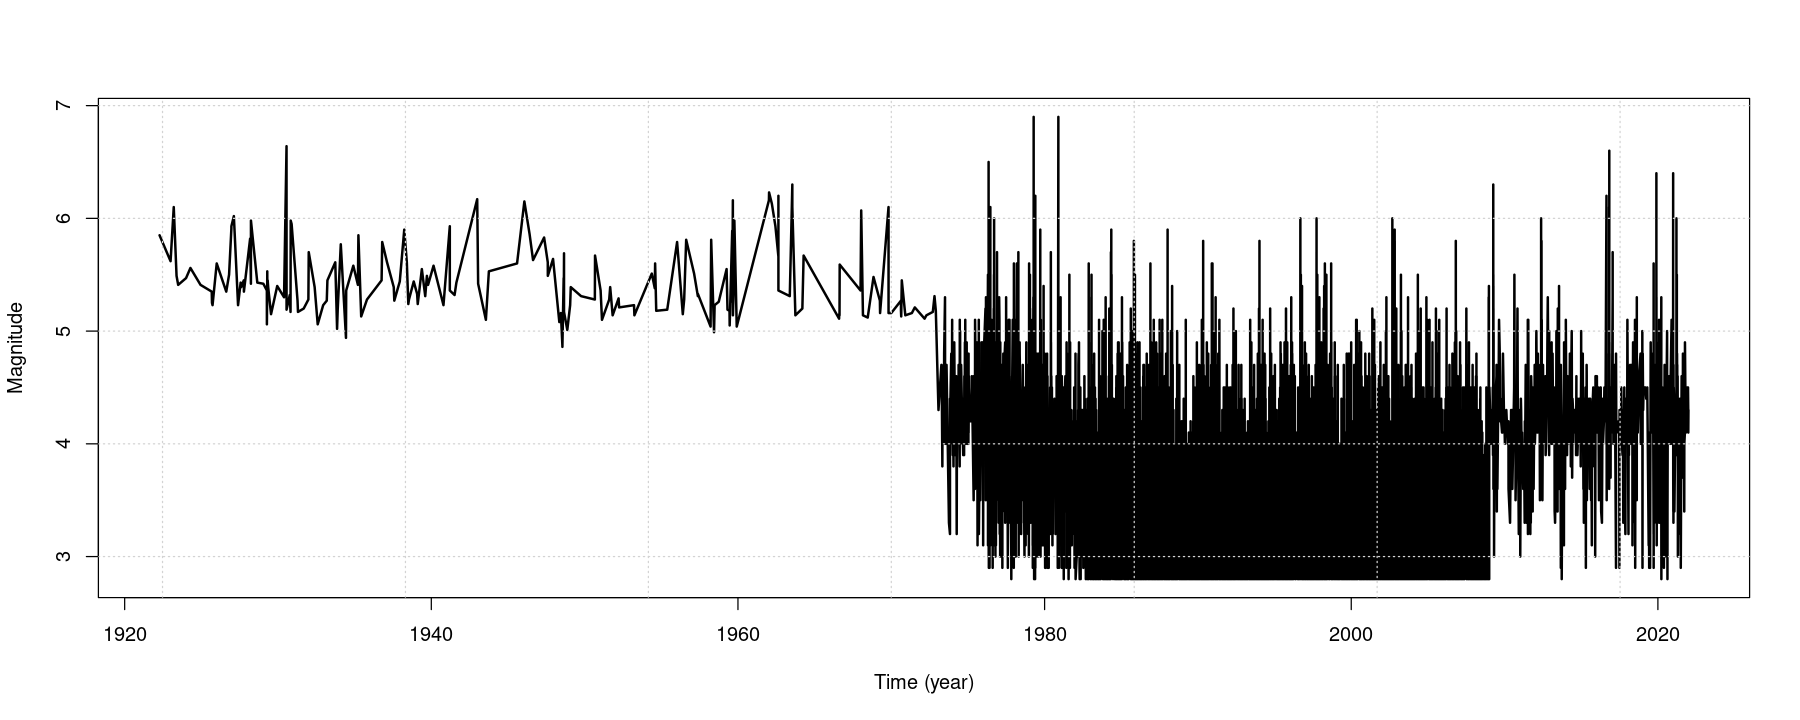

In [47]:
options(repr.plot.width = 15, repr.plot.height = 6)

plot(df_extended$time_posix, df_extended$mag, type = "l", xlab = "Time (year)", ylab = "Magnitude", lwd = 2)
grid()

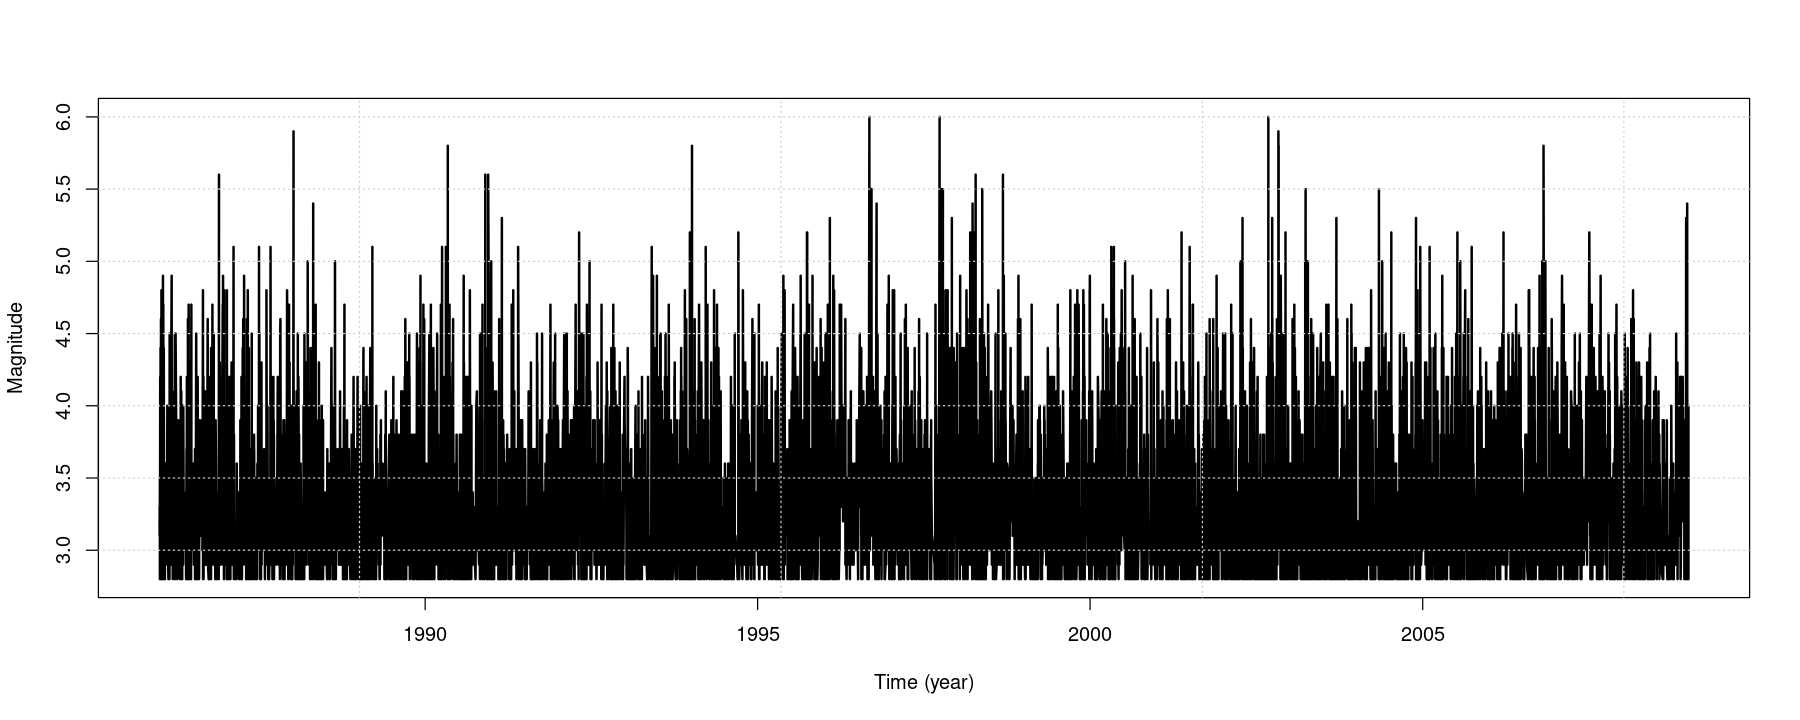

In [48]:
options(repr.plot.width = 15, repr.plot.height = 6)
df_extended <- df_extended[df_extended$year > 1985 & df_extended$year < 2009, ]

plot(df_extended$time_posix, df_extended$mag, type = "l", xlab = "Time (year)", ylab = "Magnitude", lwd = 2)
grid()

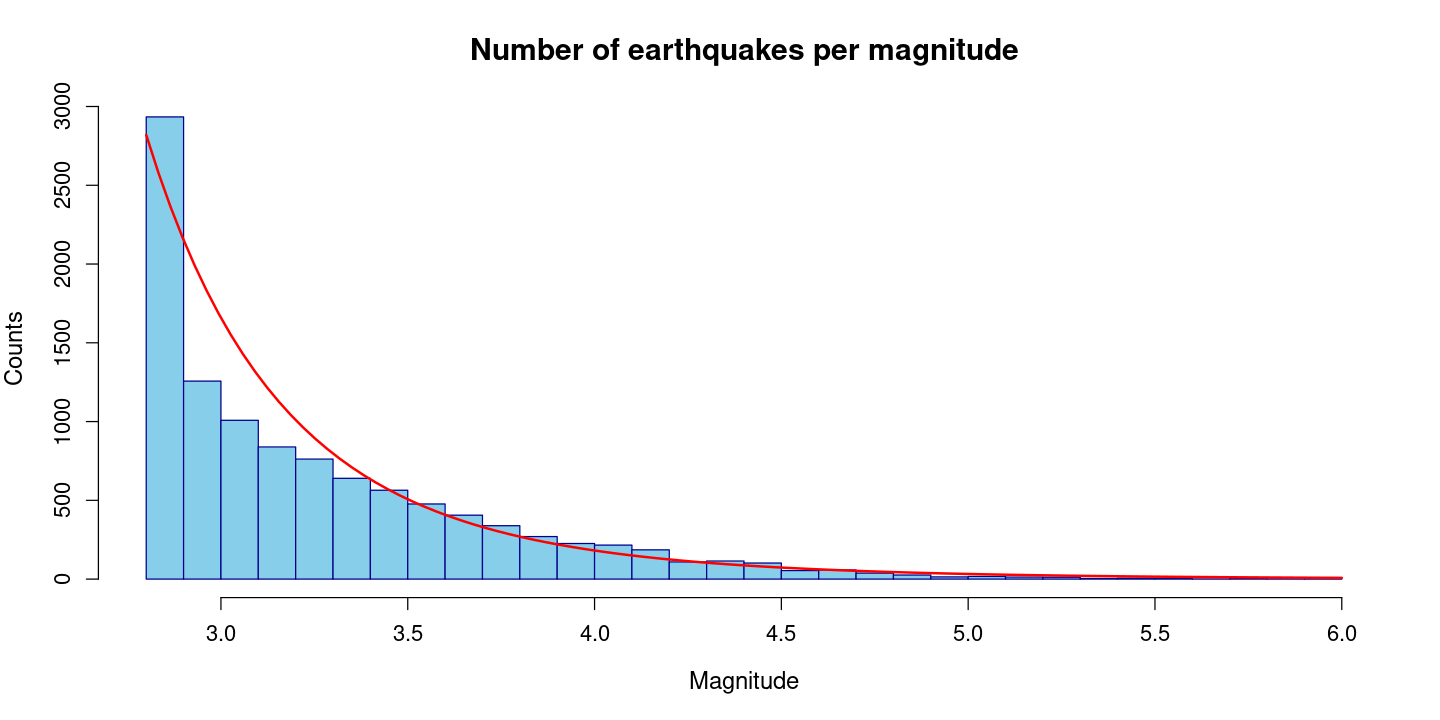

In [49]:
options(repr.plot.width = 12, repr.plot.height = 6)

# Assuming df$mag contains your earthquake magnitudes
data <- df_extended$mag

# Create an empirical power-law object for continuous data
pl_model <- conpl$new(data)

# Estimate xmin and alpha using maximum likelihood estimation (MLE)
est <- estimate_xmin(pl_model)
pl_model$setXmin(est)

# Now we can retrieve the estimated parameters (e.g., alpha)
alpha <- pl_model$pars

# Plot the histogram
hist(df_extended$mag, breaks = 40, col = 'skyblue', border = 'darkblue', xlab = 'Magnitude', 
     ylab = 'Counts', main = 'Number of earthquakes per magnitude', 
     cex.main = 1.5, cex.lab = 1.2, cex.axis = 1.1)

# Overlay the power law fit
x_vals <- seq(min(data), max(data), length.out = 100)
y_vals <- 1100*(x_vals / est$xmin)^(-alpha)
lines(x_vals, y_vals * max(hist(data, plot = FALSE)$density), col = "red", lwd = 2)


Jan      Feb      Mar      Apr      May      Jun      Jul      Aug     
1  3.437805 3.215385 3.439286 3.271429 3.282500 3.390000 3.237500 3.422222
2  3.331250 3.336842 3.188462 3.434211 3.224490 3.215385 3.393103 3.250000
3  3.393548 3.209091 3.487500 3.300000 3.236364 3.104082 3.056000 3.329032
4  3.172000 3.106667 3.248387 3.221212 3.295652 3.037931 3.262963 3.141026
5  3.255172 3.336111 3.214286 3.454839 3.460526 3.193333 3.164516 3.291489
6  3.254286 3.211765 3.189189 3.347222 3.283784 3.232000 3.131579 3.121875
7  3.234483 3.348276 3.222222 3.530000 3.310714 3.313158 3.272727 3.336667
8  3.247826 3.050000 3.293617 3.293333 3.158824 3.409375 3.251389 3.374194
9  3.275610 3.376000 3.313793 3.303704 3.309375 3.170588 3.113889 3.250000
10 3.373077 3.360870 3.288889 3.251515 3.445833 3.245000 3.397500 3.415385
11 3.306818 3.492683 3.383333 3.681250 3.360000 3.306667 3.509091 3.396429
12 3.312000 3.316667 3.315385 3.277778 3.307143 3.257692 3.424324 3.221053
13 3.478571 3.470968 3.384615 3.406944 3.331343 3.522222 3.233333 3.266667
14 3.287500 3.233333 3.273077 3.250000 3.274359 3.263636 3.250000 3.121053
15 3.256250 3.258333 3.467742 3.464407 3.476042 3.650000 3.266667 3.225455
16 3.271429 3.386364 3.222222 3.272727 3.266667 3.146667 3.286047 3.140000
17 3.234483 3.210000 3.037838 3.309375 3.122727 3.160606 3.045614 3.160656
18 3.218310 3.212245 3.294944 3.374752 3.216092 3.251899 3.186441 3.215068
19 3.122222 3.260417 3.244000 3.106452 3.266071 3.223077 3.128571 3.180769
20 3.388000 3.306897 3.312821 3.270213 3.226190 3.234091 3.324324 3.311111
21 3.210526 3.213889 3.572500 3.448485 3.316176 3.225926 3.185185 3.468235
22 3.308333 3.507143 3.192857 3.278571 3.392857 3.293333 3.430303 3.352778
23 3.244828 3.327027 3.310169 3.319355 3.407692 3.211905 3.261538 3.200000
   Sep      Oct      Nov      Dec     
1  3.218519 3.426471 3.438710 3.385294
2  3.385185 3.322727 3.336000 3.510000
3  3.278947 3.295833 3.122222 3.233333
4  3.297059 3.242857 3.233333 3.300000
5  3.312500 3.259091 3.401961 3.489744
6  3.311111 3.212121 3.211364 3.300000
7  3.270370 3.287500 3.196154 3.215152
8  3.245455 3.260976 3.379545 3.283333
9  3.204000 3.256522 3.275000 3.363158
10 3.420000 3.331818 3.203333 3.480952
11 3.843590 3.417391 3.360714 3.448148
12 3.475524 3.561826 3.528358 3.415789
13 3.448718 3.316667 3.384211 3.313793
14 3.288000 3.360000 3.314286 3.508333
15 3.239394 3.289189 3.331579 3.166667
16 3.196774 3.246154 3.317647 3.386957
17 3.160452 3.471831 3.509859 3.249020
18 3.187838 3.186154 3.086047 3.343137
19 3.116327 3.215556 3.310204 3.337143
20 3.265957 3.242857 3.275758 3.337037
21 3.372222 3.373077 3.295000 3.250000
22 3.320000 3.400000 3.208000 3.292500
23 3.088889 3.244444 3.537500 3.236667

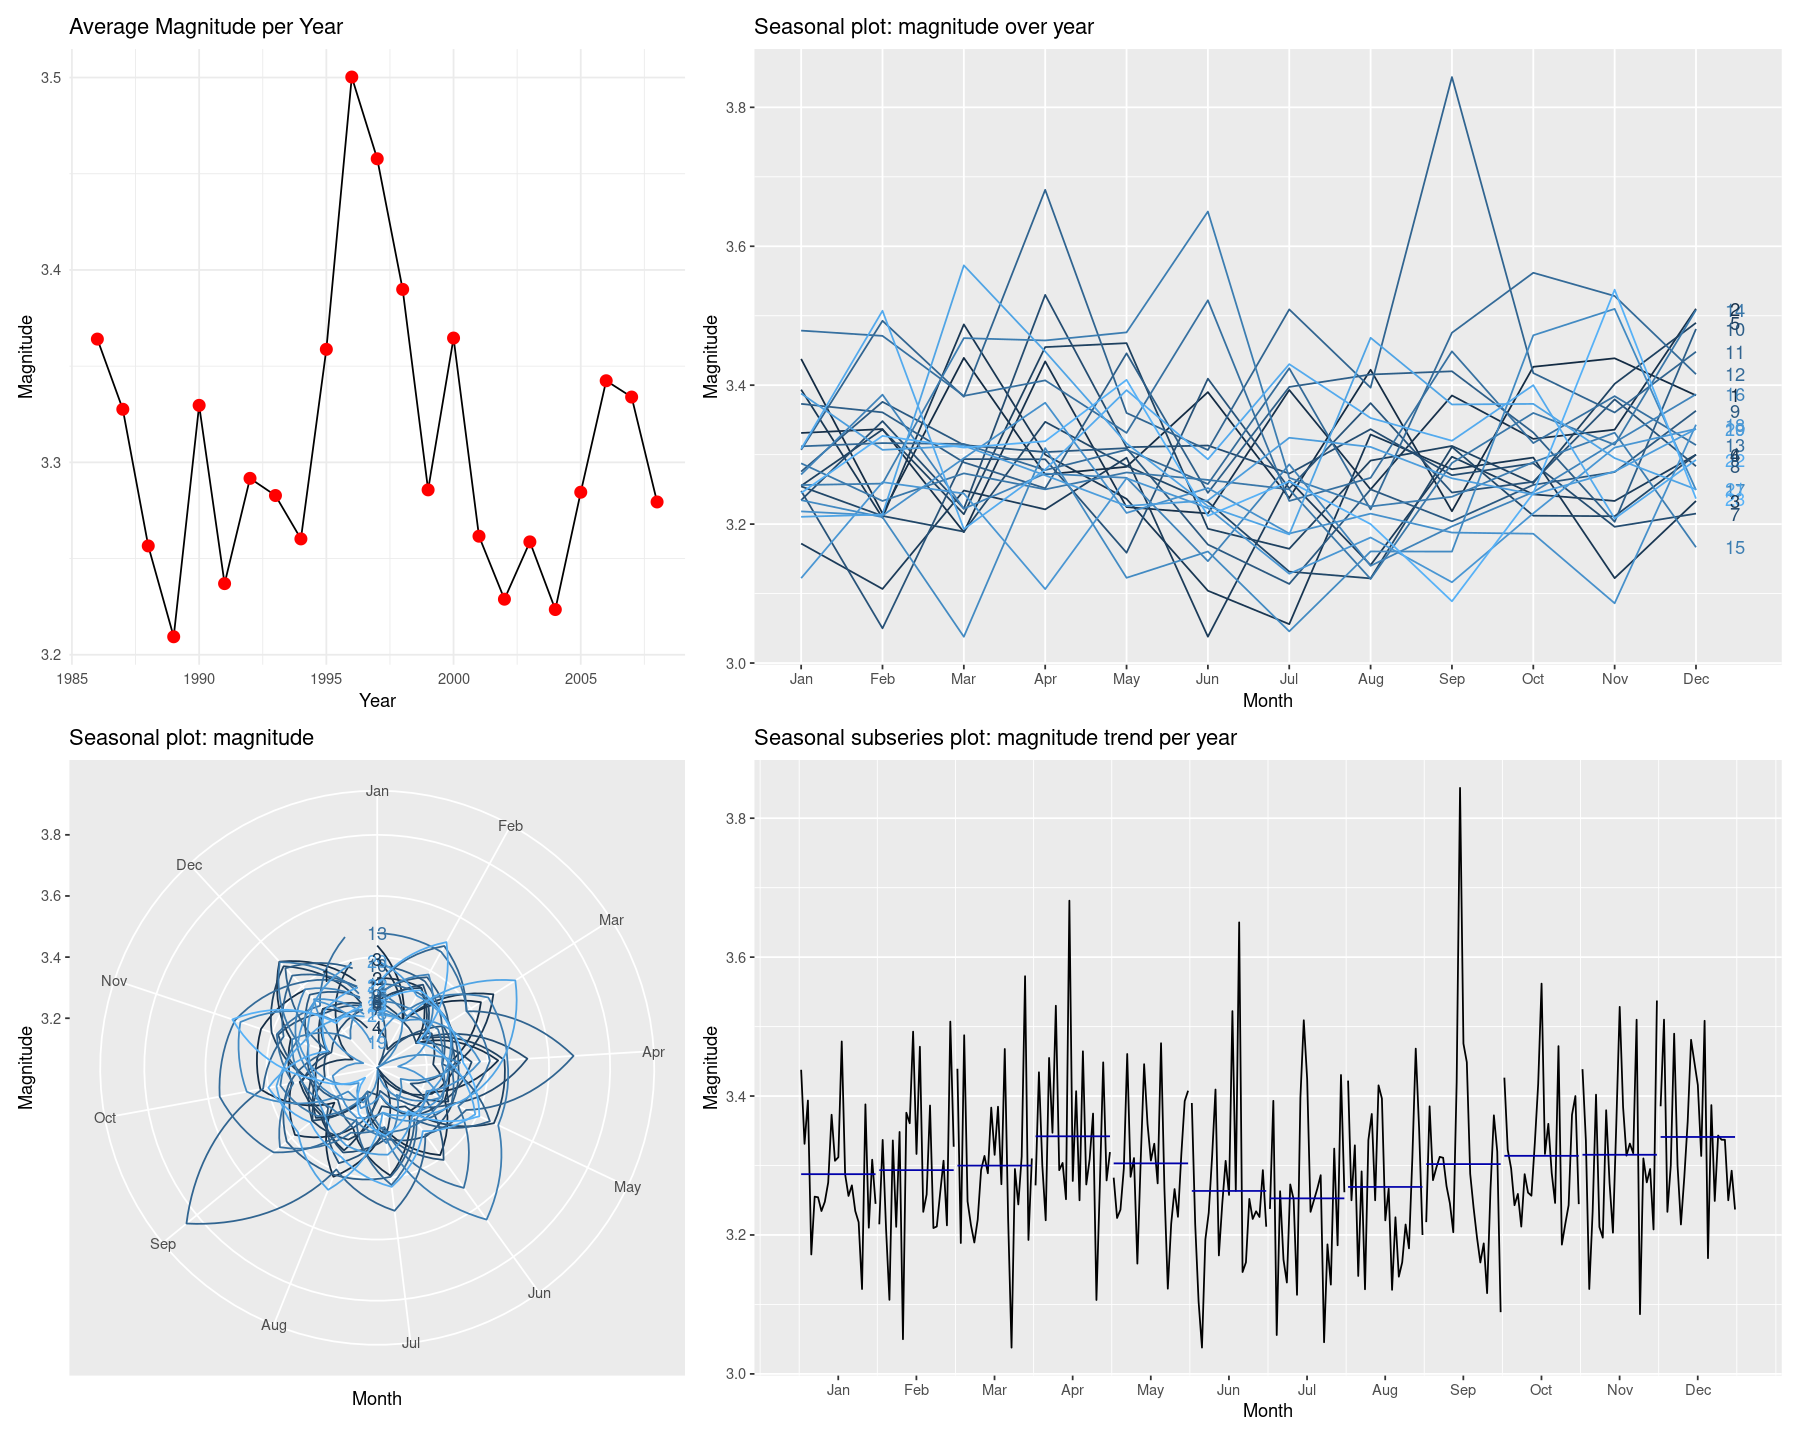

In [50]:
options(repr.plot.width = 15, repr.plot.height = 12, warn = -1)

mean_mag_by_year <- aggregate(mag ~ year, data = df_extended, FUN = mean, na.rm = FALSE)

# Ensure that the decades are in the correct order
mean_mag_by_year <- mean_mag_by_year[order(mean_mag_by_year$year), ]

avg_mag_year <- ggplot(mean_mag_by_year, aes(x = year, y = mag)) +
  geom_line(color = "black") +
  geom_point(size = 3, color = "red") +
  ggtitle("Average Magnitude per Year") +
  xlab("Year") +
  ylab("Magnitude") +
  theme_minimal()

# Aggregate the magnitude by year
mean_mag_by_month <- aggregate(mag ~ year + month, data = df_extended, FUN = mean, na.rm = FALSE)
mean_mag_by_month <- pivot_wider(mean_mag_by_month, 
                       names_from = month, 
                       values_from = mag, 
                       id_cols = year)
mean_mag_by_month <- t(mean_mag_by_month[order(mean_mag_by_month[, 1]), ])

colnames(mean_mag_by_month) <- mean_mag_by_month[1, ]
mean_mag_by_month <- mean_mag_by_month[-1, ]
#mean_mag_by_month
magn1 <- ts(as.vector(as.matrix(mean_mag_by_month)), frequency = 12, start = c(1, 1))
magn1

mag_dec_sea <- ggseasonplot(magn1, year.labels=TRUE, continuous = TRUE) +
  ylab("Magnitude") +
  ggtitle("Seasonal plot: magnitude over year")

mag_sea <- ggseasonplot(magn1,  year.labels=TRUE, polar = TRUE, continuous = TRUE) +
  ylab("Magnitude") +
  ggtitle("Seasonal plot: magnitude")

mag_sea_sub <- ggsubseriesplot(magn1) +
  ylab("Magnitude") +
  ggtitle("Seasonal subseries plot: magnitude trend per year")

entire_plot <- avg_mag_year + mag_dec_sea + mag_sea + mag_sea_sub

entire_plot

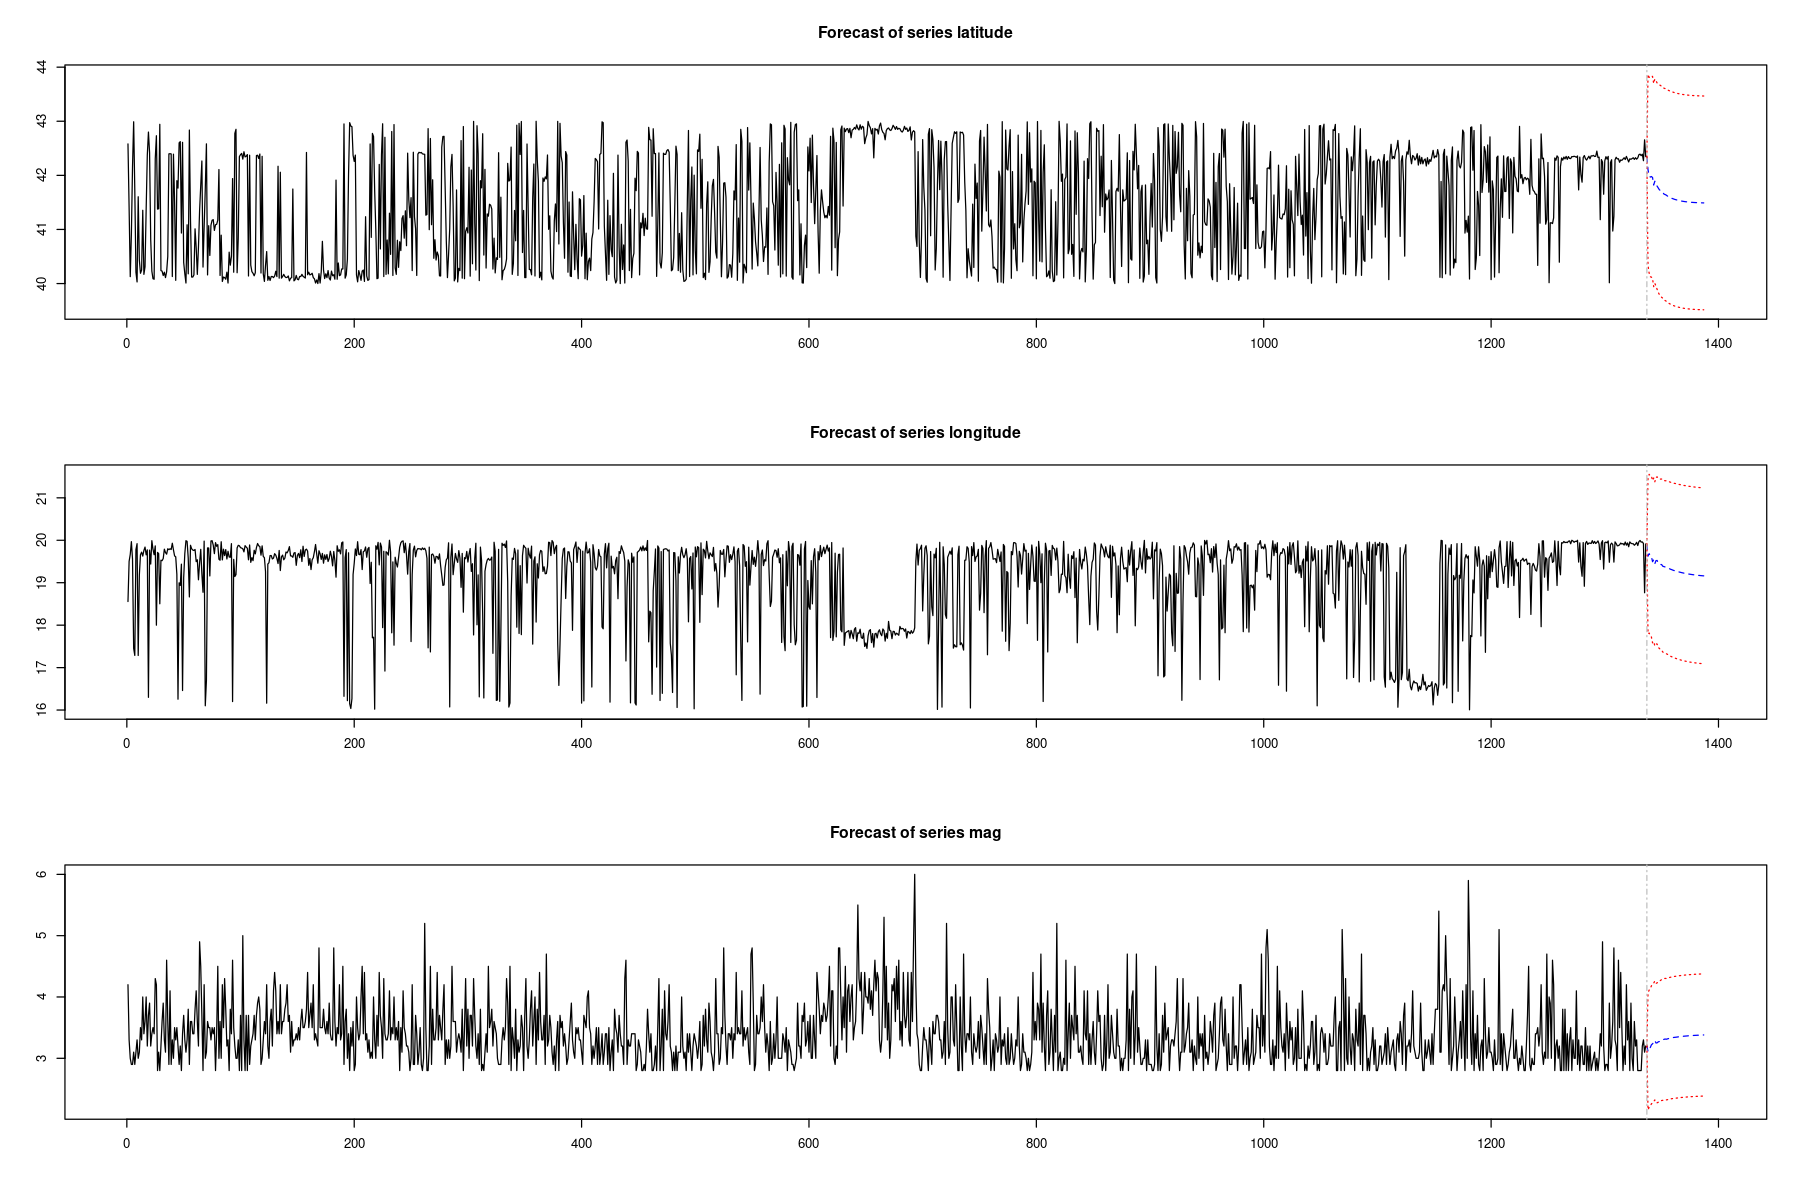

In [51]:
df_dal_ext <- df_extended[df_extended$longitude >= 16 &
                  df_extended$latitude >= 40 & df_extended$latitude <= 43, ]

time_series_dal <- ts(df_dal_ext[, c("latitude", "longitude", "mag")])

# Determina il numero ottimale di lag per il modello
lag_select <- VARselect(time_series_dal, lag.max = 70, type = "const")

# Costruisci il modello VAR con il numero di lag selezionato
var_model <- VAR(time_series_dal, p = lag_select$selection[1], type = "const")

# Previsione per i prossimi n periodi
forecast_values <- predict(var_model, n.ahead = 50)
predicted_values <- forecast_values$fcst

options(repr.plot.width = 15, repr.plot.height = 10)
plot(forecast_values)

In [52]:
predicted_latitude <- predicted_values$latitude[, "fcst"]
predicted_longitude <- predicted_values$longitude[, "fcst"]
predicted_mag <- predicted_values$mag[, "fcst"]
#predicted_depth <- predicted_values$depth[, "fcst"]
predicted_depth <- rep(0, 10)

# Creare un dataframe con i valori predetti
depth_forecasting <- data.frame(
  latitude = predicted_latitude,
  longitude = predicted_longitude,
  depth = predicted_depth,
  mag = predicted_mag
)

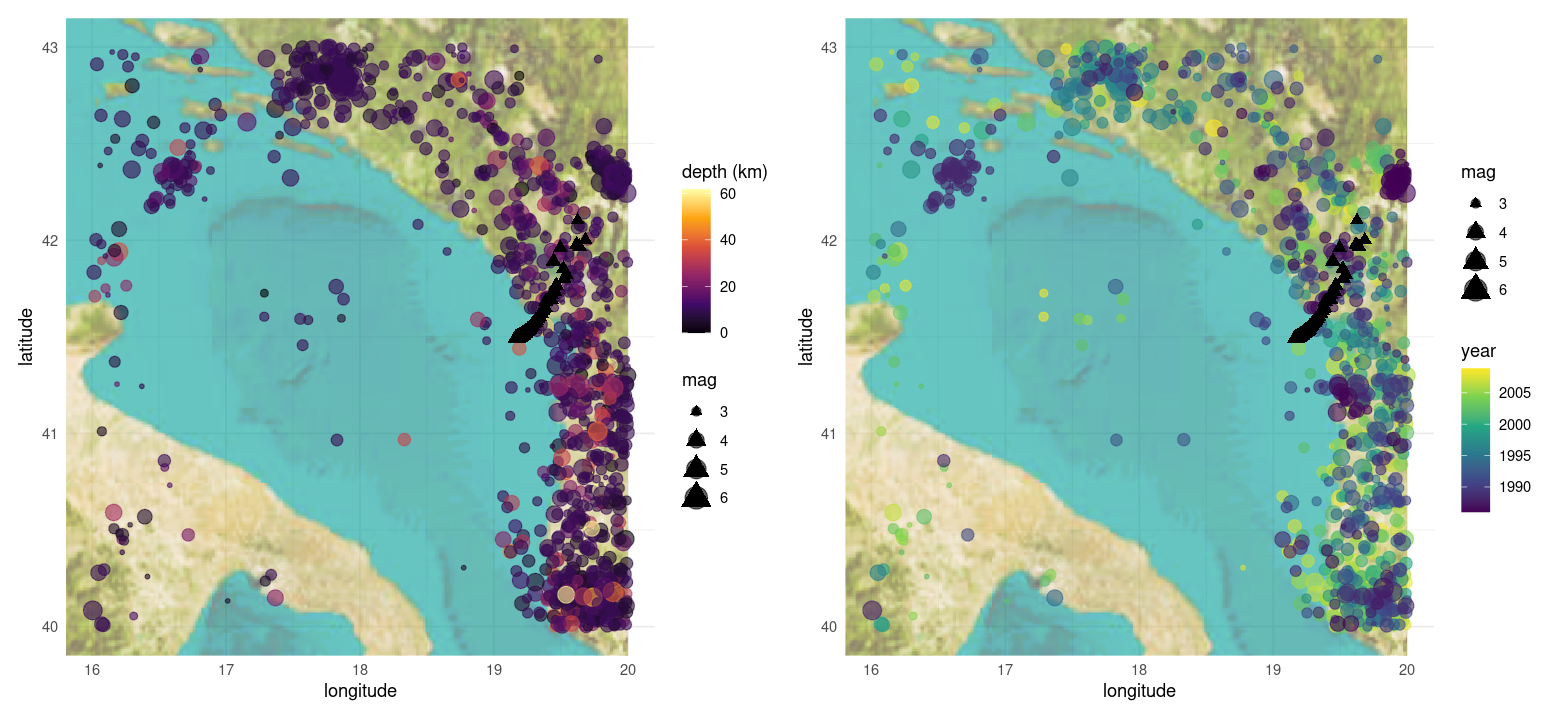

In [64]:
plot_height <- 6
plot_width <- 13
options(repr.plot.width = plot_width, repr.plot.height = plot_height)

# Load the PNG image
bg_image <- readPNG("background.png")

# Get dimensions of the PNG image
img_width <- dim(bg_image)[2]  # Width in pixels
img_height <- dim(bg_image)[1]  # Height in pixels

# Calculate plot limits
x_range <- c(5, 20)
y_range <- c(36, 48)

# Adjust opacity (set alpha channel)
alpha_value <- 0.6  # Adjust as needed (0 = fully transparent, 1 = fully opaque)
bg_image_alpha <- bg_image
bg_image_alpha[,,4] <- bg_image[,,4] * alpha_value  # Modify alpha channel


plot_depth <- ggplot(df_dal_ext, aes(x = longitude, y = latitude, color = depth, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "inferno") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "depth (km)")

# Add the PNG background with adjusted opacity (alpha)
plot_depth2 <- plot_depth +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

plot_time <- ggplot(df_dal_ext, aes(x = longitude, y = latitude, color = days_index/365.25 + 1921, size = mag)) +
  geom_point(alpha = 0) +
  scale_color_viridis_c(option = "viridis") +
  theme_minimal() +
  labs(x = "longitude", y = "latitude", color = "year")

plot_time2 <- plot_time +
  annotation_raster(bg_image_alpha, xmin = min(x_range), xmax = max(x_range),
                    ymin = min(y_range), ymax = max(y_range)) +
  geom_point(alpha = 0.6) +
  theme(plot.background = element_rect(fill = "transparent", color = NA))

# Modify the existing plots by adding points from the depth_forecasting dataframe
plot_depth_forecast <- plot_depth2 +
  geom_point(data = depth_forecasting, aes(x = longitude, y = latitude, size = mag),
             shape = 17, color = "black", alpha = 1)  # Star markers with black color

plot_time_forecast <- plot_time2 +
  geom_point(data = depth_forecasting, aes(x = longitude, y = latitude, size = mag),
             shape = 17, color = "black", alpha = 1)  # Star markers with black color

# Combine the updated plots
plots_2D_forecast <- plot_depth_forecast + plot_time_forecast

# Save the updated plots
#ggsave("Figures/plots_2D_forecast.png", plot = plots_2D_forecast, width = plot_width, height = plot_height, units = 'in')
plots_2D_forecast

## References

[1](https://jtr13.github.io/cc19/time-series-modeling-with-arima-in-r.html): Time Series Modeling with ARIMA in R

[2](https://otexts.com/fpp2/): "Forecasting: Principles and Practice (2nd ed)" by Rob J Hyndman and George Athanasopoulos

[3](https://towardsdatascience.com/a-deep-dive-on-vector-autoregression-in-r-58767ebb3f06): "A Deep Dive on Vector Autoregression in R", by Justin Eloriaga, published in Towards Data Science (Jun 18, 2020)